# Lending Club Case Study

## Introduction

This case study analyzes Lending Club's loan dataset to help a financial company identify potential defaulters and minimize lending risks. Using historical loan data, we aim to understand patterns that lead to loan defaults.

**Key Objectives:**
1. Analyze borrower characteristics and loan features
2. Identify patterns leading to defaults
3. Help lenders make better loan approval decisions
4. Reduce financial risk through data-driven insights

The analysis includes borrower income, credit history, loan purpose, and other relevant factors. By understanding these patterns, the company can improve its lending decisions, reduce default rates, and enhance profitability while maintaining a healthy loan portfolio. 

## Problem Statement

### Understanding the Loan Default Problem

This project helps a consumer finance company figure out who's likely to not pay back their loans (called "defaulters").  This is a big problem because it costs the company money.

### The Problem:  Losing Money on Loans

The company wants to avoid giving loans to people who won't pay them back.  There are two main risks:

1. **Missing Out on Good Borrowers:**  If the company says "no" to someone who *would* have paid back the loan, they lose a chance to make money.

2. **Losing Money on Bad Borrowers:** If the company says "yes" to someone who *won't* pay back the loan, they lose the money they lent.

### The Goal:  Spotting Risky Borrowers

The company has data on past loan applications—who got loans, how much they borrowed, and whether they paid back the loan.  The goal is to use this data to find patterns that show which people are more likely to default.


### Types of Loan Outcomes

* **Loan Approved:**
    * **Fully Paid:** Borrower paid everything back.
    * **Current:** Borrower is still paying, not yet finished.
    * **Charged Off:** Borrower stopped paying and owes money (a default).
* **Loan Rejected:** The company didn't give the loan.  We don't have data on these(In the data set).

### What We'll Do

We'll use the data to find out what things about a borrower (like their income, credit score, etc.) are linked to a higher chance of them defaulting on a loan. This will help the company make better decisions about who to give loans to and reduce the amount of money they lose.
 

## Data Understanding

### Dataset Overview

#### Key Attribute: Loan Status

The "loan_status" column is crucial for our analysis, as it provides insights into how borrowers have managed their loans. It contains three main categories:

- **Fully Paid:** Borrowers who have successfully repaid their loans in full.
- **Charged Off:** Borrowers who have defaulted on their loans and failed to make timely payments.
- **Current:** Borrowers who are still paying off their loans and have not defaulted yet. For our analysis, we will exclude these entries since they do not provide information about loan defaults.


**Key Consumer Finance Attributes for Loan Risk Assessment**

**Applicant Demographics & Financial History**  
1. **Earliest Credit Line (earliest_cr_line):**  
   Indicates the borrower’s credit history length; a longer history may suggest better financial management.  

2. **Public Record Bankruptcies (pub_rec_bankruptcies):**  
   Records of bankruptcies; a higher count reflects poor creditworthiness.  

3. **Income Verification Status (verification_status):**  
   Verifies if the borrower’s income is authenticated; verified income can reduce risk.  

4. **Revolving Balance (revol_bal):**  
   Represents the amount owed on revolving credit lines; higher balances may indicate financial strain.  

5. **Revolving Line Utilization Rate (revol_util):**  
   Percentage of revolving credit being used; lower utilization rates are favorable.  

6. **Total Number of Credit Accounts (total_acc):**  
   Total number of credit accounts; too few accounts may reflect limited credit history, while too many can indicate overextension.  

7. **Annual Income (annual_inc):**  
   Higher incomes improve loan approval chances and reflect greater repayment capacity.  

8. **Home Ownership (home_ownership):**  
   Owning a home can serve as collateral, making the borrower more attractive to lenders.  

9. **Employment Length (emp_length):**  
   Longer employment duration suggests financial stability and reliability.  

10. **Debt-to-Income Ratio (dti):**  
   A lower DTI ratio indicates better ability to manage existing debt and afford new loans.  

11. **State of Residence (addr_state):**  
   Geographical data may highlight regional trends or risks in loan performance.  

**Loan Characteristics**  
1. **Loan Amount (loan_amnt):**  
   Larger loan amounts may indicate higher risk as repayment capacity is tested more rigorously.  

2. **Funded Amount (funded_amnt):**  
   The actual amount funded by the lender, providing insight into lender confidence in the borrower.  

3. **Monthly Installment Payment (installment):**  
   Represents the borrower's monthly obligation; higher amounts can strain finances.  

4. **Loan Grade (grade):**  
   A creditworthiness rating provided by the lender; higher grades indicate lower risk.  

5. **Loan Term (term):**  
   The duration of the loan in months; longer terms often come with increased risk of default.  

6. **Interest Rate (int_rate):**  
   Higher interest rates are generally associated with higher-risk borrowers.  

7. **Purpose of Loan (purpose):**  
   The stated reason for borrowing; certain purposes, such as debt consolidation, may carry higher risk.  


#### Exclusions from Analysis
1. **Customer Behavior Columns:**
Data reflecting post-loan behaviors, such as payment patterns or delinquency data, will not be included as they are irrelevant to the initial loan approval process.

2. **Granular Data:**
Overly detailed columns, like sub_grade, will be excluded in favor of broader metrics, such as grade, which provide more general and actionable insights.

#### Conclusion

Through this analysis, we aim to identify key factors that influence loan defaults. Understanding these variables will allow the company to make informed lending decisions, mitigate risks, and ultimately increase profitability while supporting responsible lending practices.

## Dataset Analysis: Detailed Preprocessing and Feature Engineering

### Data Cleaning and Preprocessing

#### Row and Columns

**Row Analysis:**

- No header, footer, extra, or summary rows detected.
- Rows with "loan_status" = "Current" were removed. These represent ongoing loans, irrelevant to default prediction.
- Duplicate rows were identified and removed.

**Column Analysis:**

**Columns Removed:**

- A total of 54 columns were removed because they contained only NA (Not Available) values.

- 9 columns with only one unique value (zero variance): 

`pymnt_plan`, `initial_list_status`, `collections_12_mths_ex_med`, `policy_code`, `application_type`, `acc_now_delinq`, `chargeoff_within_12_mths`, `delinq_amnt`, `tax_liens`. 

These do not provide predictive power.

- Columns with >30% missing values: 

`mths_since_last_delinq`, `mths_since_last_record`, `desc`

(Reason: too much missing data for reliable analysis).

- `id`, `member_id`: Unique identifiers, irrelevant for the analysis.

- `emp_title`, `title`, `url`, `zip_code`, `desc`: Textual data (descriptive nouns) not directly used in this analysis.

- `total_pymnt_inv`, `delinq_2yrs`, `collection_recovery_fee`, `total_rec_late_fee`, `recoveries`, `out_prncp_inv`, `out_prncp`, `last_pymnt_d`, `pub_rec`, 
`last_credit_pull_d`, `total_rec_prncp`, `sub_grade` :

Post-loan behavior, dynamic data, redundancy, or irrelevant details.

Additionally, records were dropped from `pub_rec_bankruptcies` due to missing values.


#### Data Type Conversions

- `loan_amnt`, `funded_amnt`, `int_rate`, `installment`, `dti`: Converted from object to nuumeric format.

- `term`: "months" string removed, converted to integer and column name chaged to `term_months` for better understanding.

- `int_rate` and `revol_util`: "%" sign removed, converted to float.

- `issue_d` and `earliest_cr_line`: Converted to datetime format (YYYY-MM-DD).

#### Value Standardization

- `home_ownership` values ("NONE", "OTHER") standardized to "OTHER".

- `verification_status` values ("Source Verified", "Verified") standardized to "Verified".

- `emp_length` converted to numerical representation (0 for "< 1 year", 1 for "1 year", etc., 10 for "10+ years").

#### New Columns Added

- **From `issue_d`:** `issue_y` (year), `issue_m` (month), `issue_q` (Quarter: categorized into Q1, Q2, Q3, Q4).

- **From `earliest_cr_line`:** `early_cr_line_month`, `early_cr_line_year`.

- **From `loan_status`:** `loan_paid` (mapping: 'Charged Off' to 'No', 'Fully Paid' to 'Yes').


#### Bucketed Columns 

- `loan_amount_bucket` 

- `funded_amount_bucket` 

- `annual_income_bucket` 

- `dti_bucket` 

- `total_account_bucket`

- `revol_util_bucket`

- `int_rate_bucket`

- `loan_dti_bucket`

- `debt_burden_bucket`

- `credit_history_years_bucket`

#### Derived Columns

1. **Combined Debt Burden Score**:  
   - **Description**: This score summarizes financial stress into a single metric, combining total debt and debt-to-income ratio.  
   - **Relevance**:  
     - Allows easier comparison between borrowers' financial situations.  
     - Highlights borrowers who are more likely to face financial strain, which is a key risk indicator for default.  
     - Simplifies complex relationships into a manageable variable for modeling and analysis.

2. **Loan DTI Interaction**:  
   - **Description**: Captures the relationship between loan amount and debt-to-income ratio.  
   - **Relevance**:  
     - Reveals borrowers who take loans disproportionately high relative to their income and existing debt, increasing their default risk.  
     - Highlights risky behaviors that may not be apparent from individual metrics alone.  
     - Adds depth to the analysis by showing the interplay between loan size and financial burden.

3. **credit_history_years**
   - **Description:** This column calculates the number of years since the earliest credit line was opened until the loan issue date.
   - **Relevance:** Understanding the length of credit history helps assess the borrower's creditworthiness. A longer credit history may indicate a more responsible borrower, which can be a predictive factor for loan repayment.

4. **payment_to_income**
   - **Description:** This column represents the ratio of the monthly loan payment (installment) to the borrower's monthly income (annual income divided by 12).
   - **Relevance:** This ratio helps evaluate the borrower's financial burden. A higher ratio may indicate that the borrower is over-leveraged, increasing the risk of default. It is a crucial metric for assessing affordability.


These derived columns enhance the dataset by providing additional insights into borrower behavior and financial health, which are essential for predicting loan default and understand the factors contributing to loan repayment or default.

#### Handling Missing Data
Dropping Columns: Columns with a high percentage of missing values, specifically those exceeding 30%, will be removed.
Removing Rows: Rows with a high percentage of missing values, exceeding 65%, will be removed from the dataset.
Imputing Missing Values: Columns with a lower percentage of missing values will undergo imputation to fill in the missing data.

#### Outlier Handling

Outliers were removed from the following numerical columns (methodology needs to be stated; common methods include IQR or Z-score):

`loan_amnt`, `funded_amnt`, `int_rate`, `annual_inc`, `dti`, `revol_util`
 

## Analysing Data

### Load the data and analyze it 

Import all the libraries 

In [1]:
# Import required libraries

import pandas as pd
import random 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options for better readability

pd.set_option('display.max_columns', None) # # Display all columns in the DataFrame without truncation  
pd.set_option('display.width', None)  # Adjust the display width automatically based on content 
pd.set_option('display.float_format', lambda x: '%.2f' % x) # # Format floating-point numbers to two decimal places 


### Initial exploration of data

In [2]:
# Load the loan dataset into loan_data variable and print the shape of the data set

loan_data = pd.read_csv('loan.csv')
print("\nInitial Dataset Shape:", loan_data.shape)



Initial Dataset Shape: (39717, 111)


In [3]:
# Display basic info about dataset by using info function
print("\nBasic Dataset Information:")
loan_data.info()



Basic Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
# Show first few rows using head function
print("\nFirst few rows of data:")
loan_data.head(6)



First few rows of data:


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   
3  1076863    1277178      10000        10000         10000.00   36 months   
4  1075358    1311748       3000         3000          3000.00   60 months   
5  1075269    1311441       5000         5000          5000.00   36 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   
5    7.90%       156.46     A        A4      Veolia Transportaton    3 years   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT    24000.00            Verified  Dec-11   Fully Paid   
1           RENT    30000.00     Source Verified  Dec-11  Charged Off   
2           RENT    12252.00        Not Verified  Dec-11   Fully Paid   
3           RENT    49200.00     Source Verified  Dec-11   Fully Paid   
4           RENT    80000.00     Source Verified  Dec-11      Current   
5           RENT    36000.00     Source Verified  Dec-11   Fully Paid   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   
5          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   
5                                                NaN         wedding   

                                   title zip_code addr_state   dti  \
0                               Computer    860xx         AZ 27.65   
1                                   bike    309xx         GA  1.00   
2                   real estate business    606xx         IL  8.72   
3                               personel    917xx         CA 20.00   
4                               Personal    972xx         OR 17.94   
5  My wedding loan I promise to pay back    852xx         AZ 11.20   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            0           Jan-85               1                     NaN   
1            0           Apr-99               5                     NaN   
2            0           Nov-01               2                     NaN   
3            0           Feb-96               1                   35.00   
4            0           Jan-96               0                   38.00   
5            0           Nov-04               3                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%      

I loaded the CSV file and checked the number of rows and columns. I reviewed the dataset's information, including column data types and file size, and examined the top five rows with `head()` to assess data quality and structure, identifying any issues for further analysis.

## Data cleaning

### Handaling missing data

In [5]:
# check null values present in dataset
loan_data.isna().sum().sort_values(ascending=False)


num_il_tl                39717
num_bc_sats              39717
num_bc_tl                39717
num_actv_bc_tl           39717
num_accts_ever_120_pd    39717
                         ...  
installment                  0
policy_code                  0
application_type             0
acc_now_delinq               0
delinq_amnt                  0
Length: 111, dtype: int64

In [6]:
#Handle Missing Values and removing columns which contain more than 30% null values
# Calculate percentage of missing values
missing_percentages = (loan_data.isnull().sum() / len(loan_data)) * 100

# Remove columns with more than 30% missing values
columns_to_drop = missing_percentages[missing_percentages > 30].index
loan_data = loan_data.drop(columns=columns_to_drop)


In [7]:
# check which columns got dropped
print("\n List of columns which got dropped because of having greater than 30% missing values")
columns_to_drop



 List of columns which got dropped because of having greater than 30% missing values


Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
     

In [8]:
#check thhe latest shape thhe data set
loan_data.shape


(39717, 53)

**Reason**
 
I checked for null values in the dataset by using `isna()` function, converted them to percentages, and then dropped the columns with excessive missing values using `drop()` function. I printed the names of the dropped columns and checked the updated shape of the dataset.

### Remove Unnecessary and Redundant Columns


In [9]:
# Remove unnecessary columns
columns_to_remove = [
    'emp_title', 'title', 'url', 'zip_code', 'open_acc','funded_amnt_inv',
    'total_pymnt_inv','total_pymnt', 'delinq_2yrs','total_rec_int',
    'collection_recovery_fee', 'total_rec_late_fee', 'recoveries', 
    'out_prncp_inv', 'out_prncp', 'id', 'member_id','last_pymnt_d','pub_rec','last_credit_pull_d',
    'total_rec_prncp','sub_grade','inq_last_6mths','last_pymnt_amnt'
]
loan_data = loan_data.drop(columns=columns_to_remove, errors='ignore')


In [10]:
print("\n  Checking for Redundant Columns  :  ")  

# Check for columns with zero variance, Removing columns where there is not even 2 unique values, only one value is present
# Checking columns and storing it in zero_variance_cols, then printing the list of the columnns and droping them and updating our data set

zero_variance_cols = loan_data.columns[loan_data.nunique() == 1]  
if len(zero_variance_cols) > 0:  
    print("\n Columns with zero variance (will be removed) : ")  
    print(zero_variance_cols.tolist())  
    loan_data = loan_data.drop(columns=zero_variance_cols)



  Checking for Redundant Columns  :  

 Columns with zero variance (will be removed) : 
['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [11]:
#check the rows and columns after removing unnecessary and redundant columns
loan_data.shape


(39717, 20)

**Reason**

I removed unnecessary and redundant columns using `drop()` and `nunique()` to enhance the dataset's clarity and focus on relevant information. Unnecessary columns included those related to loan sanctions, unique identifiers, and descriptive data that didn’t contribute to analysis. Redundant columns were duplicates or variations of existing data that would only complicate interpretation. I retained key columns that are essential for analysis before and after loan approval, as they provide valuable insights necessary for calculations and decision-making in my analysis. This streamlining helps improve the accuracy and efficiency of my analysis.


### Standardizing Column Names and Removing Unnecessary Rows

In [12]:
# Standardize column names by using str and their functions to cover every situation
loan_data.columns = (loan_data.columns
        .str.lower()
        .str.replace(' ', '_')
        .str.replace(r'[^0-9a-zA-Z_]', '', regex=True)
        .str.strip('_')
)


In [13]:
# Check for duplicate rows  
duplicate_rows = loan_data.duplicated().sum()  
print(f"\nNumber of duplicate rows: {duplicate_rows}")  



Number of duplicate rows: 0


In [14]:
# Check the initial shape of the dataset  
print("Original shape:", loan_data.shape)  

# Calculate the percentage of missing values for each row  
missing_percentage = loan_data.isnull().mean(axis=1) * 100  

# Identify rows that exceed the threshold  
rows_to_drop = loan_data[missing_percentage > 30]  

# Print the rows that will be dropped  
print("Rows with more than 30% missing values:\n", rows_to_drop)  

# this will print the rows which you have to drop, if any


Original shape: (39717, 20)
Rows with more than 30% missing values:
 Empty DataFrame
Columns: [loan_amnt, funded_amnt, term, int_rate, installment, grade, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, addr_state, dti, earliest_cr_line, revol_bal, revol_util, total_acc, pub_rec_bankruptcies]
Index: []


In [15]:
# The code drops records where the loan status is "current," as these represent loans that are still in progress and do not contribute to identifying defaulters 
loan_data = loan_data[loan_data['loan_status'].str.lower() != 'current']


In [16]:
#check the rows remaining after removing rows where loan status is current
loan_data.shape


(38577, 20)

In [17]:
# check the name of tthe columns should be in one standard and not very from each other
loan_data.columns


Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti',
       'earliest_cr_line', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

**Reason**

This code standardizes column names in the `loan_data` DataFrame, checks for duplicates, and calculates the percentage of missing values per row. Rows with over 30% missing values are printed for review. Additionally, it removes records with a loan status of "current," focusing on completed loans to better analyze defaulters. The shape of the cleaned dataset is then displayed and checked columns name by using `.columns`.

### Data Conversion

In [18]:
# Remove '%' and convert to float 
#both columns (int_rate and revol_util) are transformed into numerical columns (floats), making them easier to work with in my analysis 

loan_data['int_rate'] = loan_data['int_rate'].str.rstrip('%').astype(float)
loan_data['revol_util'] = loan_data['revol_util'].str.rstrip('%').astype(float)


In [19]:
#Converting loan amount and funding amount into float to match with data using astype function
loan_data = loan_data.astype({
    'loan_amnt': 'float64', 
    'funded_amnt': 'float64'
 })


In [20]:
# Convert term column to int type and replace months with '' no space
loan_data['term_months'] = loan_data['term'].apply(lambda x: int(x.replace('months', '').strip()))
loan_data = loan_data.drop(columns= 'term')


In [21]:
# List of date columns to process
date_columns = ['issue_d','earliest_cr_line']

for col in date_columns:
        # Handle two-digit year format '%b-%y', force errors to NaT for invalid dates, if any
        loan_data[col] = pd.to_datetime(
            loan_data[col],
            format='%b-%y',  # Two-digit year with abbreviated month
            errors='coerce'  # Replace invalid dates with NaT
        )


In [22]:
# Display info about the data set and check the dtypes of the columns
loan_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  float64       
 1   funded_amnt           38577 non-null  float64       
 2   int_rate              38577 non-null  float64       
 3   installment           38577 non-null  float64       
 4   grade                 38577 non-null  object        
 5   emp_length            37544 non-null  object        
 6   home_ownership        38577 non-null  object        
 7   annual_inc            38577 non-null  float64       
 8   verification_status   38577 non-null  object        
 9   issue_d               38577 non-null  datetime64[ns]
 10  loan_status           38577 non-null  object        
 11  purpose               38577 non-null  object        
 12  addr_state            38577 non-null  object        
 13  dti                  

In [23]:
# display the data set and check if the changes are done positively or not
loan_data


loan_amnt  funded_amnt  int_rate  installment grade emp_length  \
0        5000.00      5000.00     10.65       162.87     B  10+ years   
1        2500.00      2500.00     15.27        59.83     C   < 1 year   
2        2400.00      2400.00     15.96        84.33     C  10+ years   
3       10000.00     10000.00     13.49       339.31     C  10+ years   
5        5000.00      5000.00      7.90       156.46     A    3 years   
...          ...          ...       ...          ...   ...        ...   
39712    2500.00      2500.00      8.07        78.42     A    4 years   
39713    8500.00      8500.00     10.28       275.38     C    3 years   
39714    5000.00      5000.00      8.07       156.84     A   < 1 year   
39715    5000.00      5000.00      7.43       155.38     A   < 1 year   
39716    7500.00      7500.00     13.75       255.43     E   < 1 year   

      home_ownership  annual_inc verification_status    issue_d  loan_status  \
0               RENT    24000.00            Verified 2011-12-01   Fully Paid   
1               RENT    30000.00     Source Verified 2011-12-01  Charged Off   
2               RENT    12252.00        Not Verified 2011-12-01   Fully Paid   
3               RENT    49200.00     Source Verified 2011-12-01   Fully Paid   
5               RENT    36000.00     Source Verified 2011-12-01   Fully Paid   
...              ...         ...                 ...        ...          ...   
39712       MORTGAGE   110000.00        Not Verified 2007-07-01   Fully Paid   
39713           RENT    18000.00        Not Verified 2007-07-01   Fully Paid   
39714       MORTGAGE   100000.00        Not Verified 2007-07-01   Fully Paid   
39715       MORTGAGE   200000.00        Not Verified 2007-07-01   Fully Paid   
39716            OWN    22000.00        Not Verified 2007-06-01   Fully Paid   

                  purpose addr_state   dti earliest_cr_line  revol_bal  \
0             credit_card         AZ 27.65       1985-01-01      13648   
1                     car         GA  1.00       1999-04-01       1687   
2          small_business         IL  8.72       2001-11-01       2956   
3                   other         CA 20.00       1996-02-01       5598   
5                 wedding         AZ 11.20       2004-11-01       7963   
...                   ...        ...   ...              ...        ...   
39712    home_improvement         CO 11.33       1990-11-01       7274   
39713         credit_card         NC  6.40       1986-12-01       8847   
39714  debt_consolidation         MA  2.30       1998-10-01       9698   
39715               other         MD  3.72       1988-11-01      85607   
39716  debt_consolidation         MA 14.29       2003-10-01       4175   

       revol_util  total_acc  pub_rec_bankruptcies  term_months  
0           83.70          9                  0.00           36  
1            9.40          4                  0.00           60  
2           98.50         10                  0.00           36  
3           21.00         37                  0.00           36  
5           28.30         12                  0.00           36  
...           ...        ...                   ...          ...  
39712       13.10         40                   NaN           36  
39713       26.90          9                   NaN           36  
39714       19.40         20                   NaN           36  
39715        0.70         26                   NaN           36  
39716       51.50          8                   NaN           36  

[38577 rows x 20 columns]

**Reason**

The data conversion process in the loan_data DataFrame involves several key steps to ensure the data is in a usable format for analysis. First, the interest rate (`int_rate`) and revolving utilization (`revol_util`) columns have their '%' symbols removed. This allows for more straightforward numerical analysis.

Convert the data into the float so it can match the table dtype for numerical variables.

Next, the term column, which contains loan durations as strings (e.g., "36 months"), is converted to an integer representing the number of months, and the original column is dropped and new column `term_months` is created. used lambda method and `apply()` function to convert it.

For date columns (`issue_d` and `earliest_cr_line`), the code converts string representations to datetime objects, handling two-digit year formats and coercing any invalid dates to NaT (Not a Time).

Finally, the `info()` and `head()` method is called to display the DataFrame's structure and data types, confirming that the conversions were successful and the data is ready for further analysis.

### Imputing values in Columns

In [24]:
#check tthe dataset which columns having the null values
loan_data.isna().sum()


loan_amnt                  0
funded_amnt                0
int_rate                   0
installment                0
grade                      0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
earliest_cr_line           0
revol_bal                  0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
term_months                0
dtype: int64

In [25]:
# Check the null values present in the dataset emp_length column
loan_data.emp_length.isna().sum()


np.int64(1033)

In [26]:
# Fill categorical missing values with mode(with most frequent value)
#For categorical data, the mode (most frequent value) is often a good choice for imputation. 
#It preserves the overall distribution of the data without introducing outliers or biases.

loan_data['emp_length'] = loan_data['emp_length'].fillna(loan_data['emp_length'].mode()[0])


In [27]:
#Check the emp_length null values it should be zero now
loan_data.emp_length.isna().sum()


np.int64(0)

In [28]:
# Define the mapping dictionary
# Convert employment length to numeric for compatibility and maintain order consistency.

emp_length_mapping = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
    '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
    '8 years': 8, '9 years': 9, '10+ years': 10
}

# Use apply with a lambda function to map the values
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: emp_length_mapping.get(x, None)).astype(int)


In [29]:
# check the data type of emp_length by using dtype
loan_data['emp_length'].dtype


dtype('int64')

In [30]:
# Re-indexing after removing columns and sorting columns alphabetically for easier analysis
loan_data = loan_data.reindex(sorted(loan_data.columns),axis=1)
loan_data


addr_state  annual_inc   dti earliest_cr_line  emp_length  funded_amnt  \
0             AZ    24000.00 27.65       1985-01-01          10      5000.00   
1             GA    30000.00  1.00       1999-04-01           0      2500.00   
2             IL    12252.00  8.72       2001-11-01          10      2400.00   
3             CA    49200.00 20.00       1996-02-01          10     10000.00   
5             AZ    36000.00 11.20       2004-11-01           3      5000.00   
...          ...         ...   ...              ...         ...          ...   
39712         CO   110000.00 11.33       1990-11-01           4      2500.00   
39713         NC    18000.00  6.40       1986-12-01           3      8500.00   
39714         MA   100000.00  2.30       1998-10-01           0      5000.00   
39715         MD   200000.00  3.72       1988-11-01           0      5000.00   
39716         MA    22000.00 14.29       2003-10-01           0      7500.00   

      grade home_ownership  installment  int_rate    issue_d  loan_amnt  \
0         B           RENT       162.87     10.65 2011-12-01    5000.00   
1         C           RENT        59.83     15.27 2011-12-01    2500.00   
2         C           RENT        84.33     15.96 2011-12-01    2400.00   
3         C           RENT       339.31     13.49 2011-12-01   10000.00   
5         A           RENT       156.46      7.90 2011-12-01    5000.00   
...     ...            ...          ...       ...        ...        ...   
39712     A       MORTGAGE        78.42      8.07 2007-07-01    2500.00   
39713     C           RENT       275.38     10.28 2007-07-01    8500.00   
39714     A       MORTGAGE       156.84      8.07 2007-07-01    5000.00   
39715     A       MORTGAGE       155.38      7.43 2007-07-01    5000.00   
39716     E            OWN       255.43     13.75 2007-06-01    7500.00   

       loan_status  pub_rec_bankruptcies             purpose  revol_bal  \
0       Fully Paid                  0.00         credit_card      13648   
1      Charged Off                  0.00                 car       1687   
2       Fully Paid                  0.00      small_business       2956   
3       Fully Paid                  0.00               other       5598   
5       Fully Paid                  0.00             wedding       7963   
...            ...                   ...                 ...        ...   
39712   Fully Paid                   NaN    home_improvement       7274   
39713   Fully Paid                   NaN         credit_card       8847   
39714   Fully Paid                   NaN  debt_consolidation       9698   
39715   Fully Paid                   NaN               other      85607   
39716   Fully Paid                   NaN  debt_consolidation       4175   

       revol_util  term_months  total_acc verification_status  
0           83.70           36          9            Verified  
1            9.40           60          4     Source Verified  
2           98.50           36         10        Not Verified  
3           21.00           36         37     Source Verified  
5           28.30           36         12     Source Verified  
...           ...          ...        ...                 ...  
39712       13.10           36         40        Not Verified  
39713       26.90           36          9        Not Verified  
39714       19.40           36         20        Not Verified  
39715        0.70           36         26        Not Verified  
39716       51.50           36          8        Not Verified  

[38577 rows x 20 columns]

In [31]:
#Check the value of home ownership, it has two values verified and source verified which both mean the same so we can impute the values and sttandarlize. 
loan_data.home_ownership.value_counts()


home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

In [32]:
#imputing home ownership
loan_data['home_ownership'].replace('NONE', 'OTHER', inplace = True)


In [33]:
#checking after imputing
loan_data.home_ownership.value_counts()


home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER         101
Name: count, dtype: int64

In [34]:
# Check the 'home_ownership' values; "verified" and "source verified" mean the same, so standardize.

loan_data.verification_status.value_counts()


verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64

In [35]:
#impute verification status
loan_data['verification_status'].replace('Source Verified', 'Verified', inplace = True)


In [36]:
#check after imputation
loan_data.verification_status.value_counts()


verification_status
Verified        21883
Not Verified    16694
Name: count, dtype: int64

In [37]:
#Check the null values in pub_rec_bankruptcies
loan_data.pub_rec_bankruptcies.isna().sum()


np.int64(697)

In [38]:
#Check the table which is having null values
loan_data[loan_data.pub_rec_bankruptcies.isna()]


addr_state  annual_inc   dti earliest_cr_line  emp_length  funded_amnt  \
35006         NY   110000.00  7.07       1991-11-01           0     15000.00   
35058         TX    80800.00 14.97       1998-07-01           3      3000.00   
35362         MI    60000.00 11.08       1995-08-01           0      4000.00   
38443         NJ    37152.00  2.26       1997-12-01          10      2300.00   
38717         OH    75000.00 16.08       1994-12-01           0      6000.00   
...          ...         ...   ...              ...         ...          ...   
39712         CO   110000.00 11.33       1990-11-01           4      2500.00   
39713         NC    18000.00  6.40       1986-12-01           3      8500.00   
39714         MA   100000.00  2.30       1998-10-01           0      5000.00   
39715         MD   200000.00  3.72       1988-11-01           0      5000.00   
39716         MA    22000.00 14.29       2003-10-01           0      7500.00   

      grade home_ownership  installment  int_rate    issue_d  loan_amnt  \
35006     A       MORTGAGE       476.58      8.94 2009-09-01   15000.00   
35058     C       MORTGAGE       102.92     14.26 2009-09-01    3000.00   
35362     B       MORTGAGE       131.22     11.14 2009-08-01    4000.00   
38443     D           RENT        77.69     13.17 2008-08-01    2300.00   
38717     A       MORTGAGE       188.02      8.00 2008-05-01    6000.00   
...     ...            ...          ...       ...        ...        ...   
39712     A       MORTGAGE        78.42      8.07 2007-07-01    2500.00   
39713     C           RENT       275.38     10.28 2007-07-01    8500.00   
39714     A       MORTGAGE       156.84      8.07 2007-07-01    5000.00   
39715     A       MORTGAGE       155.38      7.43 2007-07-01    5000.00   
39716     E            OWN       255.43     13.75 2007-06-01    7500.00   

       loan_status  pub_rec_bankruptcies             purpose  revol_bal  \
35006   Fully Paid                   NaN         credit_card       7586   
35058   Fully Paid                   NaN         credit_card       4740   
35362  Charged Off                   NaN                 car      24220   
38443   Fully Paid                   NaN              moving       2211   
38717   Fully Paid                   NaN               other      29797   
...            ...                   ...                 ...        ...   
39712   Fully Paid                   NaN    home_improvement       7274   
39713   Fully Paid                   NaN         credit_card       8847   
39714   Fully Paid                   NaN  debt_consolidation       9698   
39715   Fully Paid                   NaN               other      85607   
39716   Fully Paid                   NaN  debt_consolidation       4175   

       revol_util  term_months  total_acc verification_status  
35006       52.70           36         19        Not Verified  
35058       39.50           36         23        Not Verified  
35362       68.60           36         33        Not Verified  
38443       88.40           36         13            Verified  
38717       23.20           36         39        Not Verified  
...           ...          ...        ...                 ...  
39712       13.10           36         40        Not Verified  
39713       26.90           36          9        Not Verified  
39714       19.40           36         20        Not Verified  
39715        0.70           36         26        Not Verified  
39716       51.50           36          8        Not Verified  

[697 rows x 20 columns]

In [39]:
#There are null values for pub_rec_bankruptcies. Dropping those rows as they cannot be imputed.
loan_data = loan_data[loan_data.pub_rec_bankruptcies.notna()]


In [40]:
# Verify if the dataset has no longer null values, except revol util because that will be handled in outliers 
loan_data.isna().sum()


addr_state               0
annual_inc               0
dti                      0
earliest_cr_line         0
emp_length               0
funded_amnt              0
grade                    0
home_ownership           0
installment              0
int_rate                 0
issue_d                  0
loan_amnt                0
loan_status              0
pub_rec_bankruptcies     0
purpose                  0
revol_bal                0
revol_util              50
term_months              0
total_acc                0
verification_status      0
dtype: int64

In [41]:
#Check the latest shape of the data set
loan_data.shape


(37880, 20)

**Reason**

We checked for missing values in `emp_length`, which had 1,033 null values. We handled them by replacing with the mode value, as it's the most frequent and reasonable replacement for categorical data. Afterward, we created a mapping to convert the `emp_length` values into integers for compatibility and consistency, then verified the data type. We re-indexed the dataset after removing columns and sorted it alphabetically for easier analysis. For `home_ownership` and `verification_status`, we imputed the values, but we'll remove rows with null `pub_rec_bankruptcies`, as they cannot be meaningfully imputed. Finally, we check the latest dataset.

### Common Functions


Q: Why should we use common functions ?

A: Using functions in our analysis improves efficiency by eliminating repetitive code. Instead of rewriting the same logic multiple times, we encapsulate it into reusable functions. This reduces redundancy, makes the code more maintainable, and ensures consistency. Functions also make it easier to update or debug the analysis, improving the overall organization and flexibility of the code. We’ll create functions that will help us streamline our EDA as we move forward.

In [42]:
def handle_outliers(data, columns, x_limits=None):
    """
    Identify and handle outliers in the dataset using IQR.

    Args:
        data (DataFrame): The dataset to process.
        columns (list): List of column names to visualize and handle outliers.
        x_limits (dict): Optional limits for x-axis for specific columns 
                         (e.g., {"annual_inc": (20000, 150000)}).
        
    Returns:
        DataFrame: Cleaned dataset with outliers removed.
    """
    for col in columns:
        if col in data.columns:  # Ensure the column exists in the dataset
            # Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1  # Interquartile range
            lower_bound = Q1 - 1.5 * IQR  # Lower threshold for outliers
            upper_bound = Q3 + 1.5 * IQR  # Upper threshold for outliers

            # Visualize the column data with a boxplot
            plt.figure(figsize=(10, 6))  # Set the figure size
            sns.boxplot(x=data[col], palette = sns.color_palette('nipy_spectral',2))  # Create the boxplot
            plt.title(f'Boxplot of {col}')  # Add title to the plot
            plt.xlabel(col)  # Label the x-axis
            plt.ylabel('Values')  # Label the y-axis

            # Apply x-axis limits if specified in the x_limits dictionary
            if x_limits and col in x_limits:
                plt.xlim(*x_limits[col])

            # Annotate Q1 and Q3 values on the plot for better clarity
            plt.text(Q1, 0.8, f'Q1: {Q1:.2f}', color='blue',
                     horizontalalignment='right', verticalalignment='top')  # Annotate Q1
            plt.text(Q3, 0.8, f'Q3: {Q3:.2f}', color='orange',
                     horizontalalignment='left', verticalalignment='top')  # Annotate Q3

            plt.show()  # Display the boxplot

            # Remove rows where column values fall outside the IQR bounds
            data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data  # Return the cleaned dataset


In [43]:
def plot_bar_graph(dataframe, x_column, y_column=None, hue_column=None, title=None, xlabel=None, ylabel=None, figsize=(10, 6), x_tick_rotation=90, freq_rotation=0, filter_column=None, filter_value=None):
    """
    Create a Seaborn bar plot with optional frequency labels and hue-based color differentiation.
    """
    
      # List of random color palettes to choose from
    palettes = [
        sns.color_palette("pastel", 5),
        sns.color_palette("viridis", 5),
        sns.color_palette("coolwarm", 5),
        sns.color_palette("inferno", 5),
        sns.color_palette("ocean", 5)
    ]
    
    # Select a random color palette
    random_palette = random.choice(palettes)
    
    # Apply the filter if specified (Filter the dataframe based on a column's value)
    if filter_column and filter_value is not None:
        dataframe = dataframe[dataframe[filter_column] == filter_value]  # Keep rows where filter_column equals filter_value

    # Set the Seaborn style for the plot (white grid background)
    sns.set(style='darkgrid')

    # Create the figure and the plot
    plt.figure(figsize=figsize)
    
    # Plot the bar chart
    if y_column:
        # Plot with frequency counts of values in the y_column (used for categorical data)
        ax = sns.barplot(x=dataframe[y_column].value_counts().index, 
                    y=dataframe[y_column].value_counts().values, 
                    hue=hue_column, palette=random_palette)
    else:
        # Plot using the x_column for categories and the hue_column for color differentiation
        ax = sns.barplot(data=dataframe, x=x_column, hue=hue_column)

    # Loop through all containers (groups of bars) in the plot
    for container in ax.containers:  
        # Iterate over each bar in the container
        for bar in container:
            # Get the height of the current bar (value represented by the bar)
            height = bar.get_height()  
            
            # Check if the height is greater than 0 (only annotate bars with a non-zero height)
            if height > 0:  
                # Add an annotation on top of the bar
                ax.annotate(
                    f'{int(height)}',  # Convert the height to an integer and use it as the annotation text
                    (bar.get_x() + bar.get_width() / 2, height),  # Position the annotation at the center of the bar's top
                    ha='center',  # Horizontally align the annotation to the center of the bar
                    va='bottom',  # Vertically align the annotation slightly above the top of the bar
                    rotation=freq_rotation  # Rotate the annotation if a rotation is specified
                )



    # Set plot title and labels
    if title: plt.title(title, fontsize=14)  # Set the title of the plot
    if xlabel: plt.xlabel(xlabel, fontsize=12)  # Set the x-axis label
    if ylabel: plt.ylabel(ylabel, fontsize=12)  # Set the y-axis label

    # Rotate x-axis labels for better visibility if needed
    plt.xticks(rotation=x_tick_rotation)

    # Display the plot
    plt.show()


In [44]:
def generate_countplot(data_frame, column_name, hue_column=None,  
                       order_list=None, palette_list=None, 
                       x_axis_label=None, y_axis_label=None, 
                       plot_title=None, rotation=None, figure_size=(10, 6), 
                       show_annotations=True):
    """
    Generates a countplot visualization using Seaborn.

    Args:
        data_frame (pd.DataFrame): The input DataFrame containing the data.
        column_name (str): The name of the column to plot on the x-axis.
        hue_column (str, optional): The column name to use for hue differentiation. Defaults to None.
        order_list (list, optional): Order of categories on the x-axis. Defaults to None.
        palette_list (list, optional): List of colors for the bars. Defaults to None.
        x_axis_label (str, optional): Label for the x-axis. Defaults to None.
        y_axis_label (str, optional): Label for the y-axis. Defaults to None.
        plot_title (str, optional): Title for the plot. Defaults to None.
        rotation (int, optional): Rotation angle for x-axis labels. Defaults to None.
        figure_size (tuple, optional): Size of the figure in inches. Defaults to (10, 6).
        show_annotations (bool, optional): Whether to show annotations on bars. Defaults to True.
    """

    # Create the figure and axes
    fig, axes = plt.subplots(figsize=figure_size, dpi=100)
    
    # Create the countplot
    plot = sns.countplot(
        x=column_name, data=data_frame, hue=hue_column, 
        order=order_list, palette=palette_list
    )
    
    # Set axis labels and title
    axes.set(
        xlabel=x_axis_label, ylabel=y_axis_label, title=plot_title
    )

    # Add annotations for bar counts
    if show_annotations:
        for container in plot.containers:
            for bar in container:
                height = bar.get_height()
                if height > 0:  # Only annotate bars with a height > 0
                    plot.annotate(
                        f'{int(height)}',  # Text to display
                        (
                            bar.get_x() + bar.get_width() / 2,  # Center annotation horizontally
                            height + 5  # Place annotation slightly above the bar
                        ),
                        ha='center',  # Center-align the text horizontally
                        va='bottom',  # Align text to the bottom vertically
                        fontsize=12,  # Font size for annotations
                        color='black'  # Text color
                    )

    # Rotate x-axis labels if specified
    if rotation:
        plt.xticks(rotation=rotation)

    # Display the plot
    plt.show()


In [45]:
# Histogram Plot Function
def plot_histogram(data, column, bins=10, title=None, x_label=None, y_label=None, figsize=(8, 6), filter_column=None, filter_value=None):
    """
    Creates a histogram to visualize the distribution of a numerical column.

    Parameters:
        data (pd.DataFrame): Data to plot.
        column (str): Column for the histogram.
        bins (int, optional): Number of bins for the histogram. Default is 10.
        title (str, optional): Plot title. Default is None.
        x_label (str, optional): Label for x-axis. Default is None.
        y_label (str, optional): Label for y-axis. Default is None.
        figsize (tuple, optional): Figure size. Default is (8, 6).
    """
    
    # Apply the filter if specified (Filter the dataframe based on a column's value)
    if filter_column and filter_value is not None:
        data = data[data[filter_column] == filter_value]  # Keep rows where filter_column equals filter_value
        

    plt.figure(figsize=figsize)
    sns.histplot(data[column], bins=bins, kde=True)
    if title:
        plt.title(title)
    plt.xlabel(x_label or column)
    plt.ylabel(y_label or "Frequency")
    plt.show()


In [46]:
# Bucket Numeric Data
def bucket_data(value, thresholds, labels):
    """
    Assigns a numeric value to a specific bucket based on predefined thresholds.

    Parameters:
        value (float): Numeric value to bucket.
                      The value to be categorized into a specific bucket.
        thresholds (list): Thresholds for bucket assignments.
                           A list of numeric thresholds defining bucket boundaries.
        labels (list): Labels for the buckets.
                       A list of labels corresponding to each bucket.

    Returns:
        str: The label for the corresponding bucket.
             If the value is below a threshold, it gets the corresponding label.
             If the value exceeds all thresholds, the last label is assigned.
    """
    for i, threshold in enumerate(thresholds):  # Loop through thresholds
        if value < threshold:  # Check if value is less than the current threshold
            return labels[i]  # Return the label for this threshold
    return labels[-1]  # Assign the last label if value exceeds all thresholds


In [47]:
# Calculate Charged Off Percentage
def calculate_charged_off_percentage(data, column, status_column="loan_status", target_status="Charged Off"):
    """
    Calculates the percentage of "Charged Off" loans for each category in a specified column. 
    This analysis helps identify loan default patterns across different categories.

    Parameters:
        data (pd.DataFrame): The dataset to analyze.
                             Should include the grouping column and the loan status column.
        column (str): Column to group by (e.g., "grade", "purpose").
                      Categories in this column will be analyzed for default rates.
        status_column (str): Column indicating loan status. Default is "loan_status".
                             Contains statuses like "Charged Off", "Fully Paid", etc.
        target_status (str): Specific loan status to calculate percentage for. Default is "Charged Off".
                             Focuses on loans with this status to analyze default patterns.

    Returns:
        pd.DataFrame: A DataFrame with the percentage of "Charged Off" loans for each category in the grouping column.
                      Includes the calculated percentages and raw counts.
    """
    # Group data by the specified column and count occurrences of each loan status
    grouped = data.groupby(column)[status_column].value_counts().unstack().fillna(0)
    
    # Calculate the percentage of "Charged Off" loans for each category
    grouped["Charged Off %"] = (grouped[target_status] / grouped.sum(axis=1)) * 100
    
    # Return the resulting DataFrame
    return grouped



In [48]:
def plot_multicariate_chart(data, x_column, hue_column, target='loan_status', figsize=(16, 6)):
    """
    Create a combined dual-axis plot to analyze charged-off percentages and loan counts.

    Args:
        data: DataFrame containing the loan data.
              Must include the x_column, hue_column, and target column.
        x_column: Categorical variable to be plotted on the x-axis (e.g., "grade", "purpose").
        hue_column: Categorical variable to group and differentiate loan counts (e.g., `loan_status`).
        target: Target variable to calculate percentages for, typically "Charged Off".
        figsize: Tuple specifying the figure dimensions (default: (16, 6)).
    
    Returns:
        None. Displays a dual-axis plot for visual analysis.
    """
    # Group data by x_column and hue_column, and calculate counts for each group
    grouped = data.groupby([x_column, hue_column]).size().unstack(fill_value=0)
    
    # Calculate the total number of loans across all statuses for each x_column category
    grouped['All'] = grouped.sum(axis=1)
    
    # Calculate the percentage of loans that are charged off
    grouped['Charged Off %'] = (grouped.get('Charged Off', 0) / grouped['All'] * 100)

    # Initialize the figure and create a dual-axis plot
    fig, ax1 = plt.subplots(figsize=figsize)

    # Plot bar charts for the loan counts, grouped by hue_column
    grouped[[col for col in grouped.columns if col != 'Charged Off %']].plot(
        kind='bar', stacked=False, ax=ax1, width=0.8, alpha=0.8,
    )
    ax1.set_ylabel('Number of Loans (Right Axis)', fontsize=12)  # Label for the first y-axis
    ax1.set_xlabel(x_column, fontsize=12)  # Label for the x-axis
    ax1.set_title(f'{x_column.capitalize()} vs Charged Off %', fontsize=14)  # Title of the plot

    # Create a second y-axis to plot the charged-off percentage
    ax2 = ax1.twinx()
    ax2.plot(
        grouped.index, 
        grouped['Charged Off %'], 
        color='red', 
        marker='o', 
        label='Charged Off %'  # Line for the Charged Off %
    )
    ax2.set_ylabel('Charged Off %', fontsize=12)  # Label for the second y-axis
    ax2.legend(loc='upper center')  # Legend for the second y-axis

    # Format the x-axis for better readability
    plt.xticks(rotation=45, fontsize=10)

    # Add a legend for the bar plots (loan counts)
    ax1.legend(title=hue_column, loc='upper left')

    # Add a grid to the y-axis of the bar plot for better readability
    ax1.grid(visible=False, which='major', linestyle='--', axis='y', alpha=0.5)

    # Adjust layout to ensure labels and elements fit within the plot
    plt.tight_layout()

    # Display the combined plot
    plt.show()


**Reason**

The functions we've created will help streamline the analysis of key columns like `loan_amnt`, `int_rate`, `annual_inc`, `dti`, and `funded_amnt`. For instance, `plot_bar_graph` and `plot_histogram` visualize distributions, `calculate_charged_off_percentage` calculates the proportion of charged-off loans etc.. By automating these tasks, we eliminate repetitive code, increase efficiency, and ensure consistent results. This allows for deeper insights into loan risk factors, which aids in better predicting and identifying loan defaults.

### Handling Outliers

In [49]:
#Create a list of important columns on which you want to handle outliers
important_columns = [  
    'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'funded_amnt','revol_util']

# Define x-axis limits for specific columns
x_limits = {'annual_inc': (20000, 150000)}


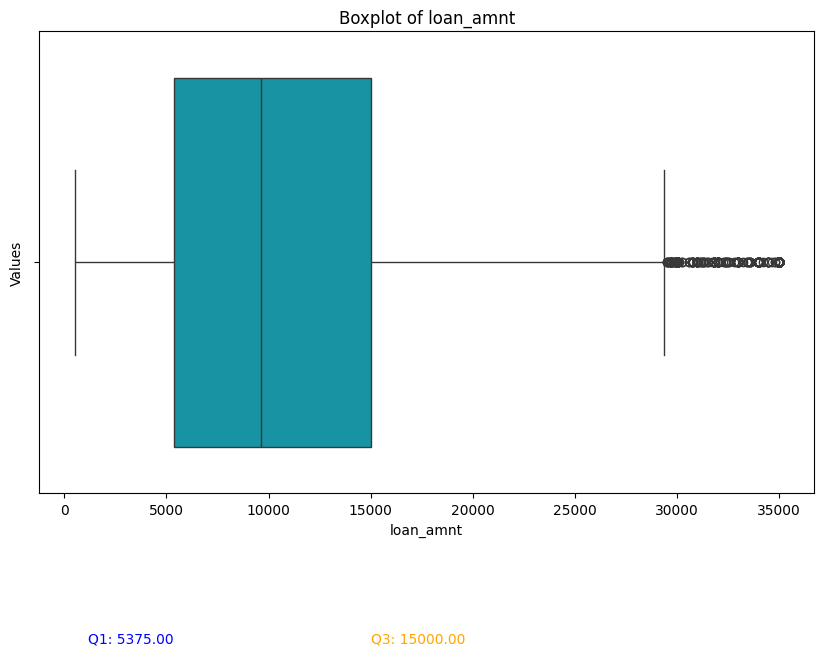

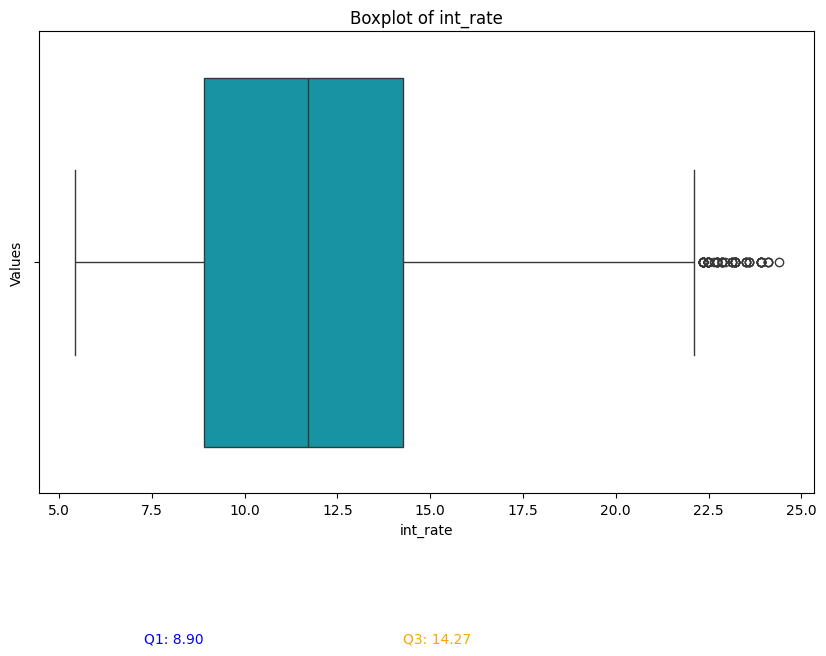

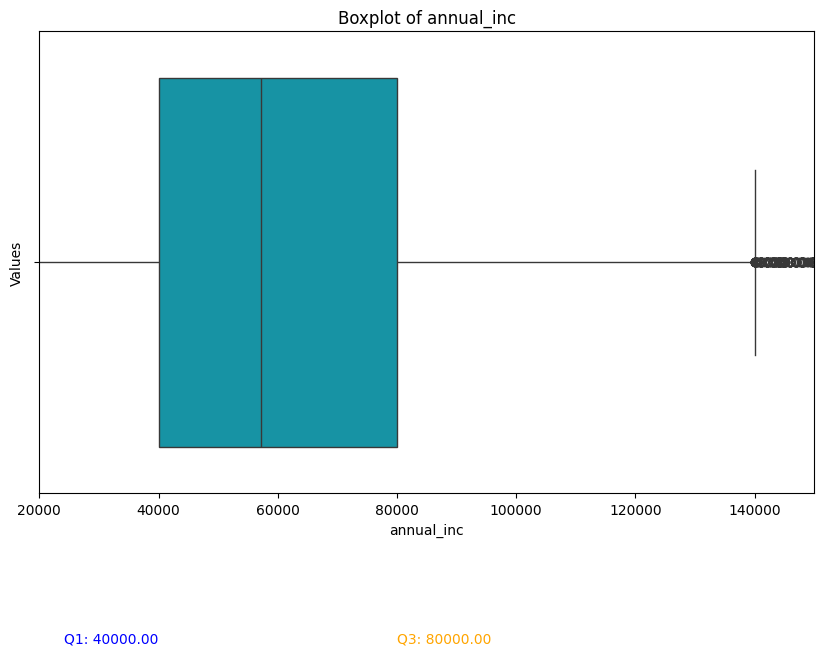

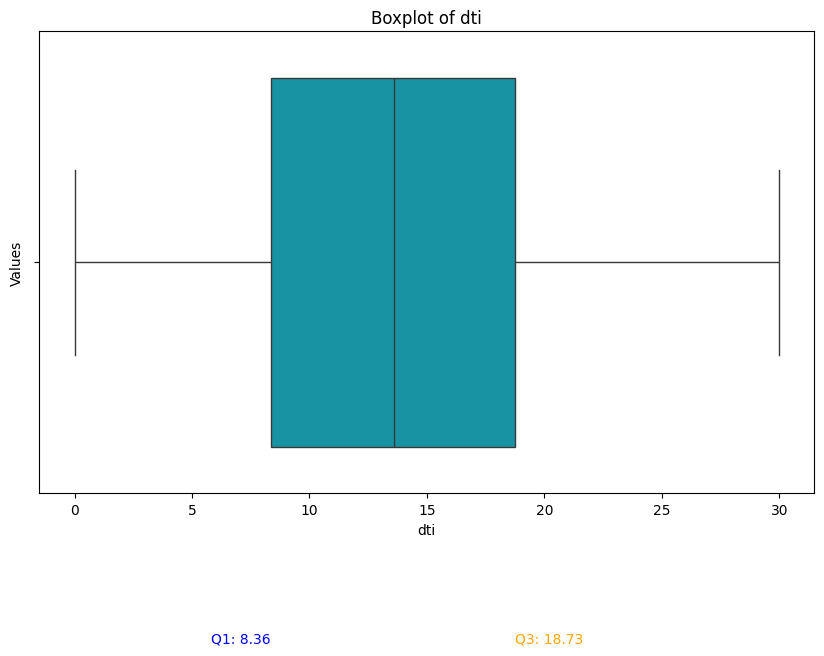

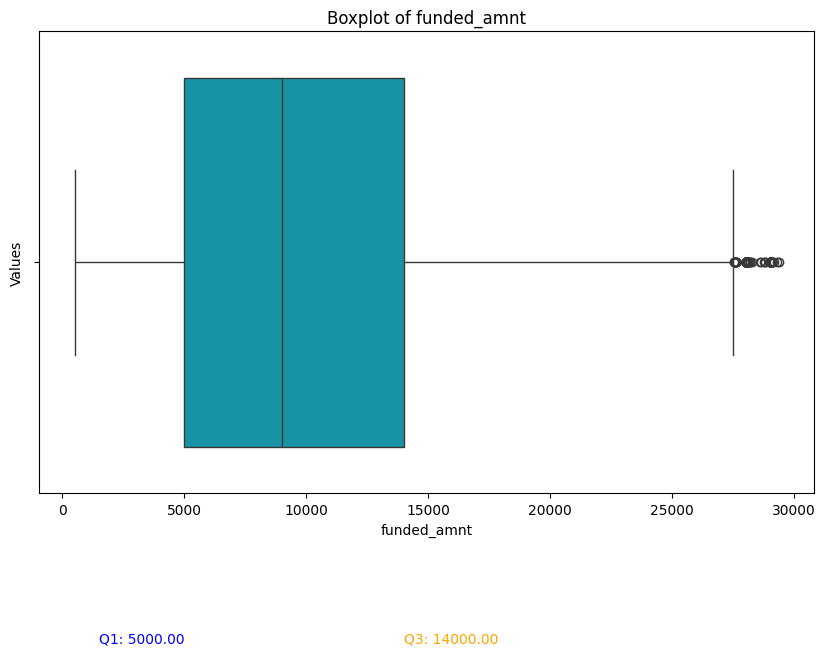

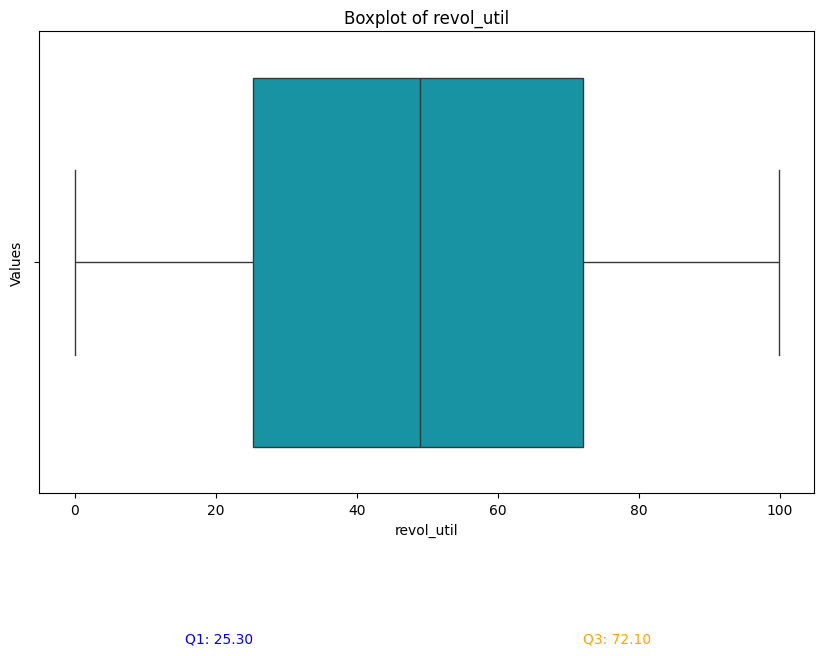

Shape of the cleaned dataset after removing outliers: (34927, 20)


In [50]:
# Apply the function to handle outliers
loan_data = handle_outliers(loan_data, important_columns, x_limits)

# Check the shape of the cleaned dataset
print("Shape of the cleaned dataset after removing outliers:", loan_data.shape)


In [51]:
# Verify if the dataset has no longer null values
loan_data.isna().sum()


addr_state              0
annual_inc              0
dti                     0
earliest_cr_line        0
emp_length              0
funded_amnt             0
grade                   0
home_ownership          0
installment             0
int_rate                0
issue_d                 0
loan_amnt               0
loan_status             0
pub_rec_bankruptcies    0
purpose                 0
revol_bal               0
revol_util              0
term_months             0
total_acc               0
verification_status     0
dtype: int64

**Reason & Insights**

- The loan amount of most of the loan applicants is between 5, 300 - 15, 000
- The interest rate on the loan is between 9% - 14%
- The annual income of most of the loan applicants is between 40, 000 - 80, 000 USD
- The debt to income ratio is between 8% - 19%
- The funded amount of most of the loan applicants is between 5, 000 - 14, 000 USD
- The revolving line utilization rate (revol_util) of most loan applicants is between 25% and 75%.

These insights can help us identify potential loan defaulters by analyzing applicants who deviate from these typical ranges. For example: Applicants borrowing higher loan amounts than the average, with higher interest rates or a higher DTI, may present a higher risk of default, Applicants with annual incomes significantly lower than the average or with a higher DTI ratio should be monitored for repayment difficulties. Applicants with loan amounts or funded amounts that fall outside the usual ranges, especially if combined with high debt-to-income ratios, might also present higher default risks.

### Derived Columns


In [52]:
# Extract date components for issue_d  
loan_data['issue_month'] = loan_data['issue_d'].dt.month  
loan_data['issue_year'] = loan_data['issue_d'].dt.year  
loan_data['issue_quarter'] = loan_data['issue_d'].dt.quarter  

# Extract date components for earliest_cr_line  - The month the borrower's earliest reported credit line was opened
loan_data['early_cr_line_month'] = loan_data['earliest_cr_line'].dt.month  
loan_data['early_cr_line_year'] = loan_data['earliest_cr_line'].dt.year


In [53]:
# Categorising Months into quaterly buckets
threshold_months = [4, 7, 9]
quarter_labels = ['Q1', 'Q2', 'Q3', 'Q4']
loan_data['issue_quarter'] = loan_data['issue_month'].apply(bucket_data, args=(threshold_months, quarter_labels))


In [54]:
#Loan Status Mapping  
loan_data['loan_paid'] = loan_data['loan_status'].map({  
    'Charged Off': 'No',  
    'Fully Paid': 'Yes'  
})  


In [55]:
# Creating Buckets  

# Categorising Loan Amount
loan_amount_thresholds = [0, 5000, 10000, 15000]
loan_amount_labels = ['0 - 5K', '5K - 10K', '10K - 15K', '15K - above']
loan_data['loan_amount_bucket'] = loan_data['loan_amnt'].apply(bucket_data, args=(loan_amount_thresholds, loan_amount_labels))

# Bucketting Funded Amount
funded_amnt_thresholds = [0, 5000, 10000, 15000]
funded_amnt_labels = ['0 - 5k', '5k - 10k', '10k - 15k', '15k - above']
loan_data['funded_amount_bucket'] = loan_data['funded_amnt'].apply(bucket_data, args=(funded_amnt_thresholds, funded_amnt_labels))


# Annual Income Buckets  
# Bucketting Annual Income
annual_inc_thresholds = [40000, 50000, 60000, 70000, 80000]
annual_inc_labels = ['0 - 40k', '40k - 50k', '50k - 60k', '60k - 70k', '70k - 80k', '80k - above']
loan_data['annual_income_bucket'] = loan_data['annual_inc'].apply(bucket_data, args=(annual_inc_thresholds, annual_inc_labels))

# DTI (Debt-to-Income) Buckets  - A lower DTI indicates better financial health and lower risk for lenders
# Bucketting DTI
dti_thresholds = [8, 12, 16, 20]
dti_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
loan_data['dti_bucket'] = loan_data['dti'].apply(bucket_data, args=(dti_thresholds, dti_labels))

#create total account bucket - the higher the buckets the higher the risk of going default
# Bucketing Total Accounts
total_acc_thresholds = [0, 5, 10, 15, 20]  
total_acc_labels = ['0 - 5', '5 - 10', '10 - 15', '15 - 20', '20+']  
loan_data['total_account_bucket'] = loan_data['total_acc'].apply(bucket_data, args=(total_acc_thresholds, total_acc_labels))


# Creating bins based on the provided summary statistics
# Bucketing Revolving Utilization
revol_util_thresholds = [0, 25, 50, 75, 100]  
revol_util_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']  
loan_data['revol_util_bucket'] = loan_data['revol_util'].apply(bucket_data, args=(revol_util_thresholds, revol_util_labels))


# Interest Rate Buckets  
int_rate_bins = [5, 9, 13, 17, 21]
int_rate_labels = ['0-5%', '5-9%','9-13%','13-17%','17-21%','21-25%']
loan_data['int_rate_bucket'] = loan_data['int_rate'].apply(bucket_data, args=((int_rate_bins, int_rate_labels)))




In [56]:
# Calculate credit history length in years  - shows how long the borrower had a credit history before the loan was issued
#Understanding the length of credit history helps assess the borrower's creditworthiness.
loan_data['credit_history_years'] = (  
    (loan_data['issue_d'] - loan_data['earliest_cr_line']).dt.days / 365.25  
).round(1)


# Bucketing Credit_history foor better understanding 
credit_history_thresholds = [5, 10, 15, 20]  
credit_history_labels = ['0 - 5', '6 - 10', '11 - 15', '16+']  
loan_data['credit_history_years_bucket'] = loan_data['credit_history_years'].apply(bucket_data, args=(credit_history_thresholds, credit_history_labels))


In [57]:
#Financial Calculations  

#This ratio helps evaluate the borrower's financial burden.
# Monthly payment to income ratio  - Calculates what percentage of monthly income goes to loan payment
loan_data['payment_to_income'] = (  
    loan_data['installment'] / (loan_data['annual_inc'] / 12)  
).round(2)  

 
# Total Debt: Calculates the borrower's overall debt by summing funded loan amounts and revolving balances.
# Provides a complete picture of a borrower's debt obligations.

total_debt = loan_data['funded_amnt'] + loan_data['revol_bal']

# Debt-to-Income Ratio: Measures how much of a borrower's income is used to cover debt obligations.
# Higher ratios indicate financial strain, making this a strong predictor of default.

debt_to_income = (total_debt / loan_data['annual_inc']).round(4)


In [58]:
#Combined Debt Burden Score: This score summarizes financial stress into a single metric, combining total debt and debt-to-income ratio.  
# Allows easier comparison between borrowers financial situations.  
# Highlights borrowers who are more likely to face financial strain, which is a key risk indicator for default.  
loan_data['debt_burden_score'] = (
    0.5 *  total_debt + 
    0.5 * debt_to_income

)


In [59]:
#Loan DTI Interaction : Captures the relationship between loan amount and debt-to-income ratio.  
#Reveals borrowers who take loans disproportionately high relative to their income and existing debt, increasing their default risk.  
#Highlights risky behaviors that may not be apparent from individual metrics alone.  
loan_data['loan_dti_interaction'] = loan_data['loan_amnt'] * debt_to_income


In [60]:

# Create buckets for Loan-DTI Interaction
# Loan-DTI Interaction captures the combined effect of loan amount and debt-to-income ratio.
# High values indicate borrowers with large loans relative to their income and existing obligations.
# Buckets help categorize borrowers into meaningful segments for understanding default risks.

loan_dti_int_bins = [0, 1200, 3000, 6500, 12000]
loan_dti_int_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
loan_data['loan_dti_bucket'] = loan_data['loan_dti_interaction'].apply(bucket_data, args= ((loan_dti_int_bins,loan_dti_int_labels)))


# Create buckets for Debt Burden Score
# Debt Burden Score combines total debt and debt-to-income ratio into a single measure of financial stress.
# High values indicate over-leveraged borrowers who may struggle with repayment.
# Buckets help identify borrower groups with varying levels of financial risk.

debt_to_income_bins = [0, 5000, 9000, 14000, 20000]
debt_to_income_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
loan_data['debt_burden_bucket'] = loan_data['debt_burden_score'].apply(bucket_data, args= ((debt_to_income_bins,debt_to_income_labels)))
  


In [61]:
loan_data


addr_state  annual_inc   dti earliest_cr_line  emp_length  funded_amnt  \
0             AZ    24000.00 27.65       1985-01-01          10      5000.00   
1             GA    30000.00  1.00       1999-04-01           0      2500.00   
2             IL    12252.00  8.72       2001-11-01          10      2400.00   
3             CA    49200.00 20.00       1996-02-01          10     10000.00   
5             AZ    36000.00 11.20       2004-11-01           3      5000.00   
...          ...         ...   ...              ...         ...          ...   
39562         VA    35000.00  7.51       2000-03-01           1      4800.00   
39573         AZ    63500.00  8.50       1989-02-01           3      7000.00   
39623         MD    39000.00  5.08       1997-08-01           8      9000.00   
39666         VA    40000.00 13.50       1992-11-01           2     15450.00   
39680         IN    36153.00  7.47       2000-07-01           2      3000.00   

      grade home_ownership  installment  int_rate    issue_d  loan_amnt  \
0         B           RENT       162.87     10.65 2011-12-01    5000.00   
1         C           RENT        59.83     15.27 2011-12-01    2500.00   
2         C           RENT        84.33     15.96 2011-12-01    2400.00   
3         C           RENT       339.31     13.49 2011-12-01   10000.00   
5         A           RENT       156.46      7.90 2011-12-01    5000.00   
...     ...            ...          ...       ...        ...        ...   
39562     C           RENT       155.52     10.28 2007-11-01    4800.00   
39573     C       MORTGAGE       227.82     10.59 2007-11-01    7000.00   
39623     D       MORTGAGE       301.04     12.49 2007-10-01    9000.00   
39666     C       MORTGAGE       507.46     11.22 2007-08-01   15450.00   
39680     D       MORTGAGE        99.44     11.86 2007-08-01    3000.00   

       loan_status  pub_rec_bankruptcies             purpose  revol_bal  \
0       Fully Paid                  0.00         credit_card      13648   
1      Charged Off                  0.00                 car       1687   
2       Fully Paid                  0.00      small_business       2956   
3       Fully Paid                  0.00               other       5598   
5       Fully Paid                  0.00             wedding       7963   
...            ...                   ...                 ...        ...   
39562   Fully Paid                  1.00  debt_consolidation       5836   
39573   Fully Paid                  1.00  debt_consolidation      14930   
39623  Charged Off                  1.00  debt_consolidation      26233   
39666  Charged Off                  1.00  debt_consolidation       6513   
39680   Fully Paid                  1.00  debt_consolidation       1064   

       revol_util  term_months  total_acc verification_status  issue_month  \
0           83.70           36          9            Verified           12   
1            9.40           60          4            Verified           12   
2           98.50           36         10        Not Verified           12   
3           21.00           36         37            Verified           12   
5           28.30           36         12            Verified           12   
...           ...          ...        ...                 ...          ...   
39562       68.70           36         12        Not Verified           11   
39573       79.00           36         21        Not Verified           11   
39623       62.90           36         37        Not Verified           10   
39666       34.30           36         29        Not Verified            8   
39680       70.90           36          6        Not Verified            8   

       issue_year issue_quarter  early_cr_line_month  early_cr_line_year  \
0            2011            Q4                    1                1985   
1            2011            Q4                    4                1999   
2            2011            Q4                   11                2001   
3 

In [62]:
loan_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 34927 entries, 0 to 39680
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   addr_state                   34927 non-null  object        
 1   annual_inc                   34927 non-null  float64       
 2   dti                          34927 non-null  float64       
 3   earliest_cr_line             34927 non-null  datetime64[ns]
 4   emp_length                   34927 non-null  int64         
 5   funded_amnt                  34927 non-null  float64       
 6   grade                        34927 non-null  object        
 7   home_ownership               34927 non-null  object        
 8   installment                  34927 non-null  float64       
 9   int_rate                     34927 non-null  float64       
 10  issue_d                      34927 non-null  datetime64[ns]
 11  loan_amnt                    34927 non-null  f

In [63]:

loan_data.shape


(34927, 40)

## EDA Analysis

**About**

Univariate analysis looks at one variable at a time to understand its behavior. It helps us see patterns, like the most common values or the range of data, using charts like histograms,boxplots and bar charts. This is useful to understand distributions, and get a basic idea about the data.

### Univariate Analysis  

#### A. Categorical Variables  

**1. Ordered Categorical Data**  
These variables have a natural order or hierarchy:  
1. `grade` (A, B, C, etc.)  
2. `emp_length`  
3. `term_months` (36/60 months)  
4. `issue_year` (2011, etc.)  
5. `issue_month` (1-12)  
6. `issue_quarter` (Q1, Q2, Q3, Q4)  
7. `early_cr_line_month`  
8. `early_cr_line_year`  

**2. Unordered Categorical Data**  
These variables don't have a natural order:  
1. `addr_state` (AZ, GA, IL, etc.)  
2. `home_ownership` (RENT, OWN, etc.)  
3. `loan_status` (Fully Paid, Charged Off, etc.)  
4. `purpose` (credit_card, car, small_business, etc.)  
5. `verification_status` (Verified, Not Verified, etc.)  
6. `loan_paid` (Yes, No)  
8. `loan_amount_bucket` ('0-5K', '5K-10K', '10K-15K', etc.)  
9. `int_rate_bucket` ('0-5%', '5-9%','9-13%', etc.)  
10. `annual_income_bucket` ('0 - 40k', '40k - 50k', '50k - 60k', etc.)  
11. `dti_bucket` ('Very Low', 'Low', 'Medium', etc.)  
12. `funded_amnt_bucket` ('0 - 5k', '5k - 10k', '10k - 15k', '15k - above')  
13. `loan_dti_bucket` ('Very Low', 'Low', 'Medium', 'High', 'Very High')
14. `debt_burden_bucket`('Very Low', 'Low', 'Medium', 'High', 'Very High')

#### B. Quantitative Variables  
These are numerical variables that can be measured:  

**Continuous Variables:**  
2. `installment`  
3. `payment_to_income`   
4. `revol_util`

##### Graphs of Ordered Categorical Data

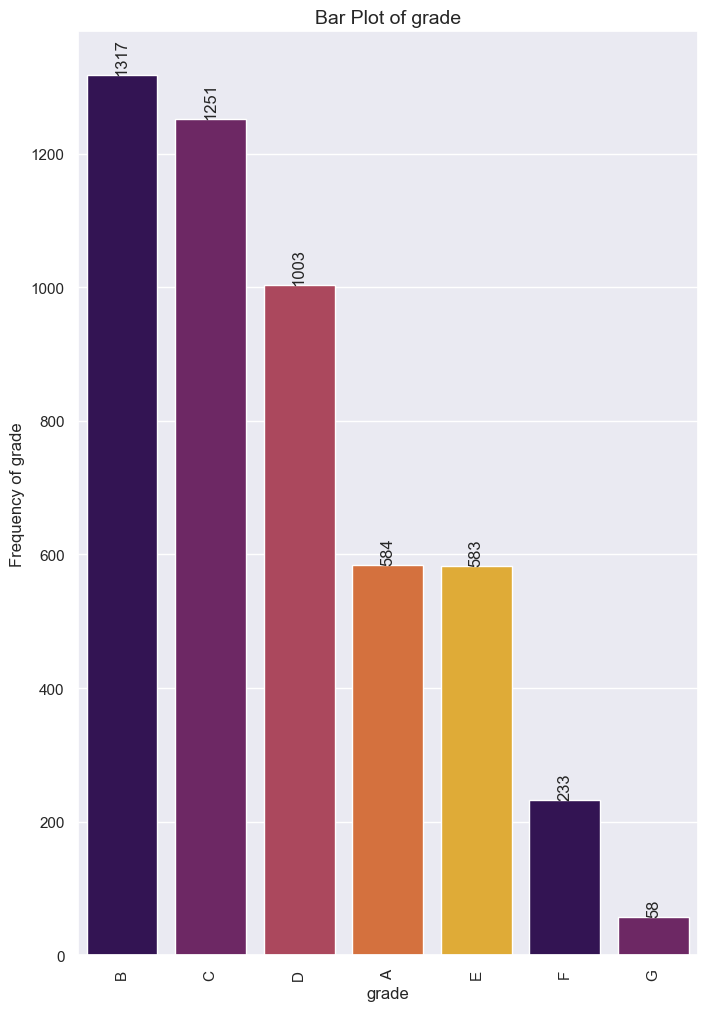

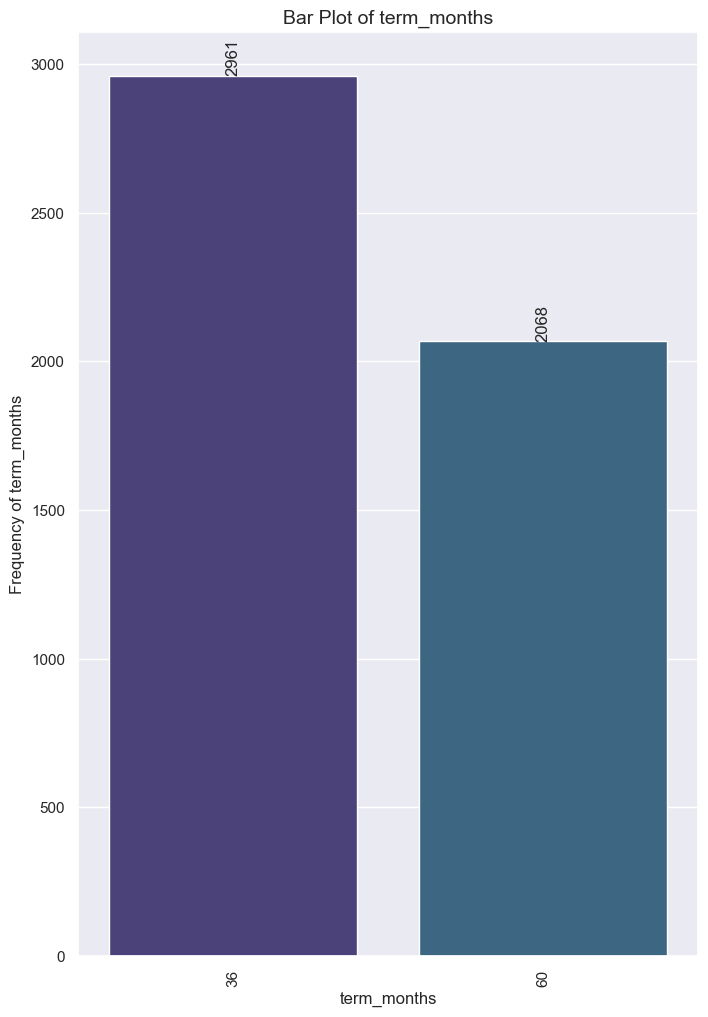

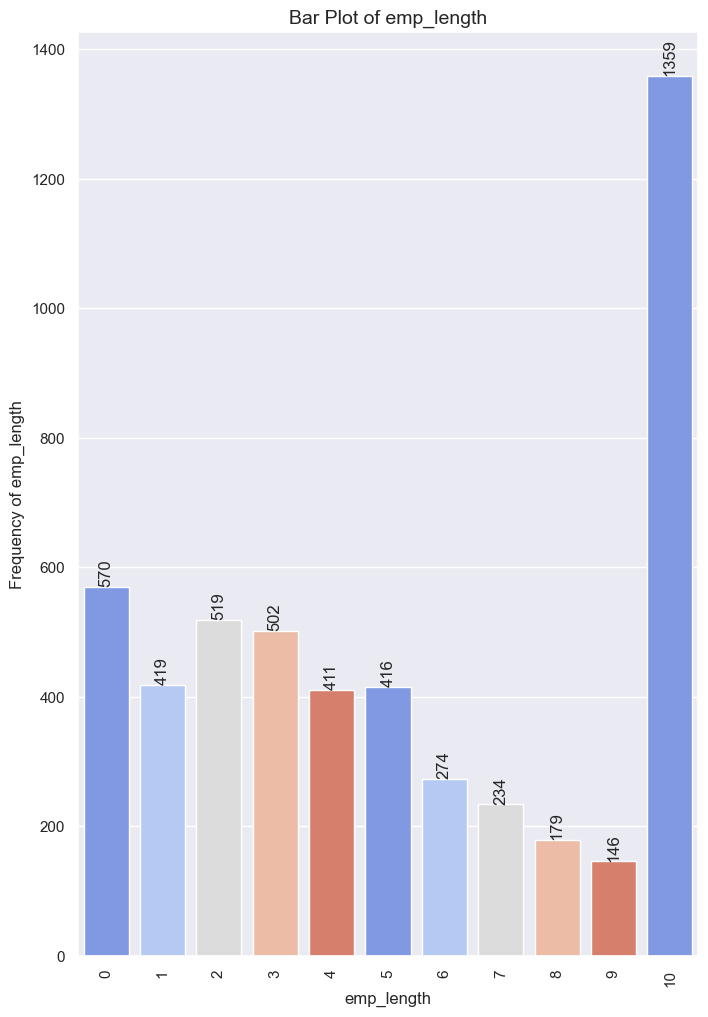

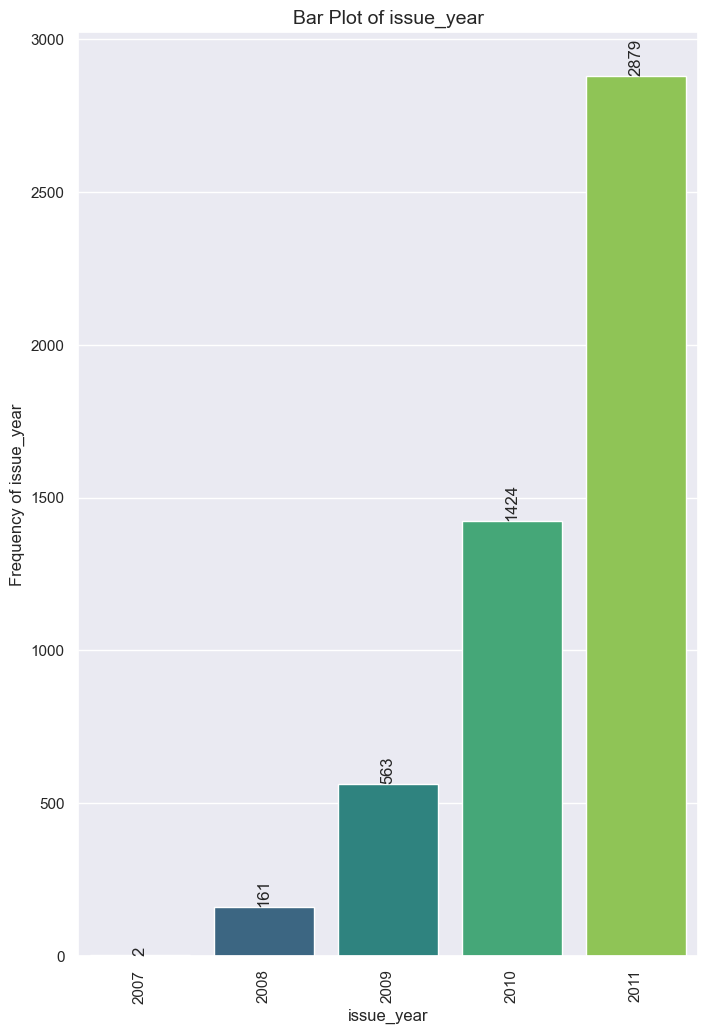

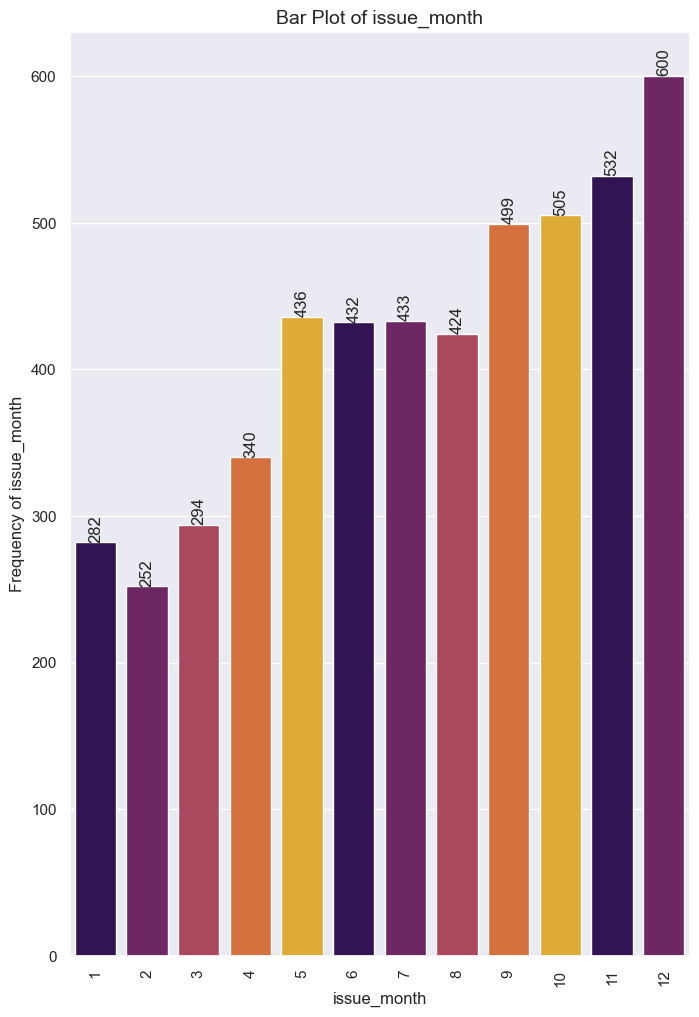

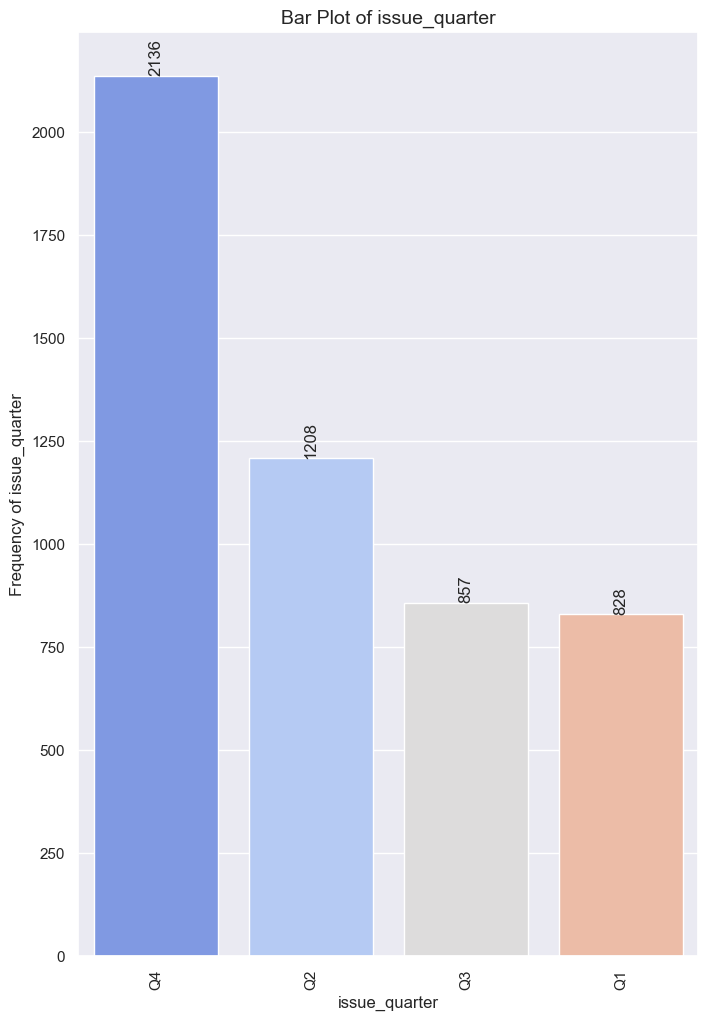

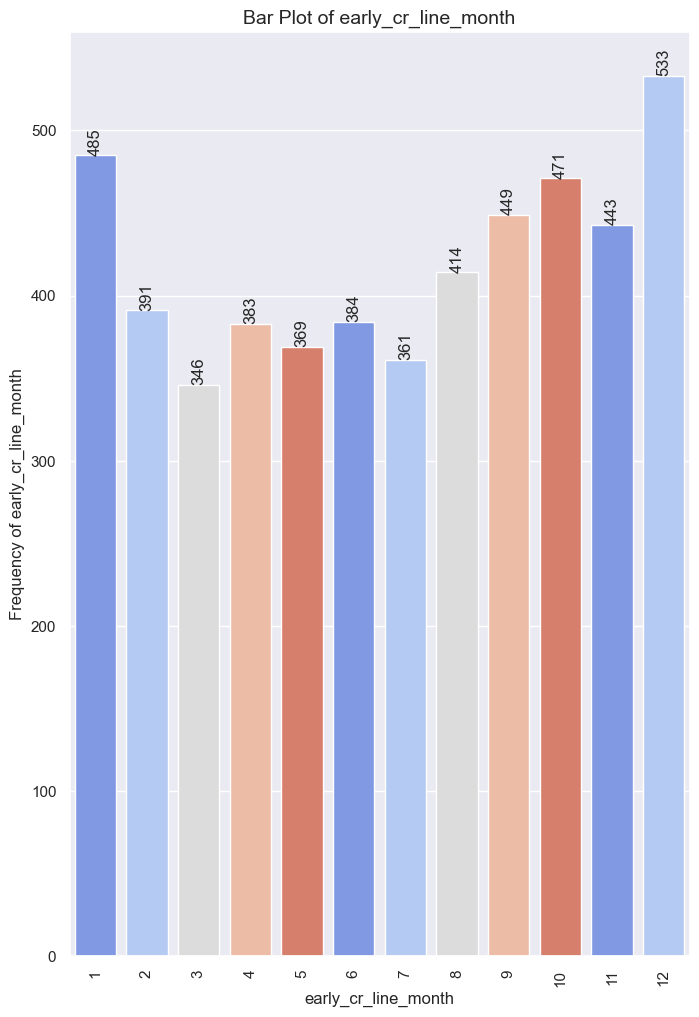

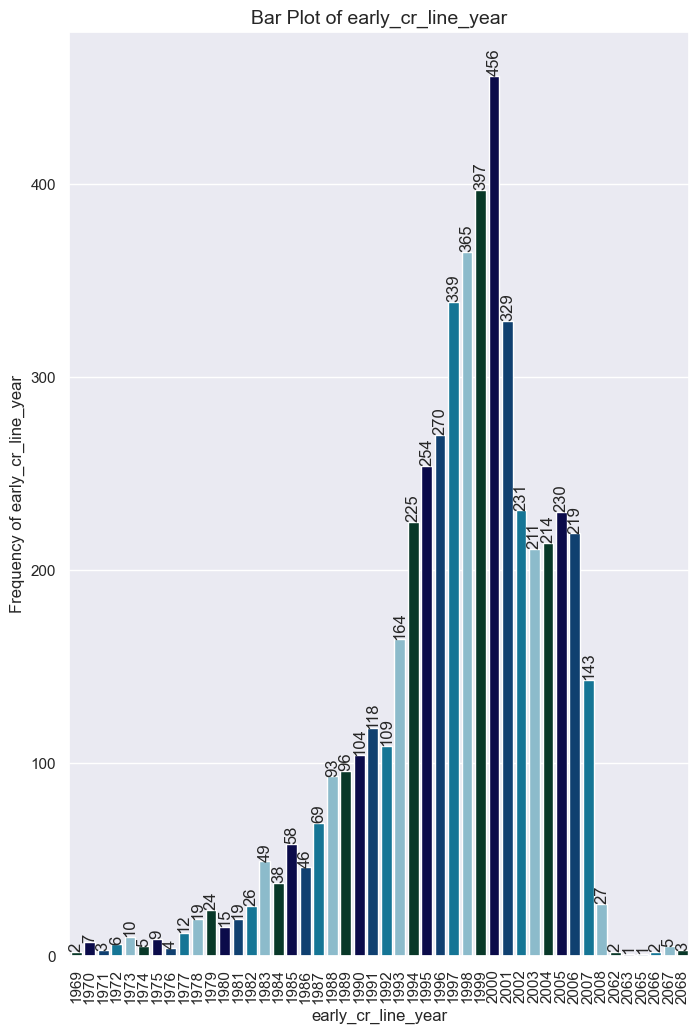

In [64]:
for cat_var in ['grade', 'term_months', 'emp_length', 'issue_year', 'issue_month', 'issue_quarter','early_cr_line_month','early_cr_line_year']:
    plot_bar_graph(
        loan_data,
        x_column = cat_var,
        y_column = cat_var,  # To get the count of occurrences in each category
        title = f'Bar Plot of {cat_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {cat_var}',
        figsize=(8, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )


#### Graphs of Unordered Categorical Data

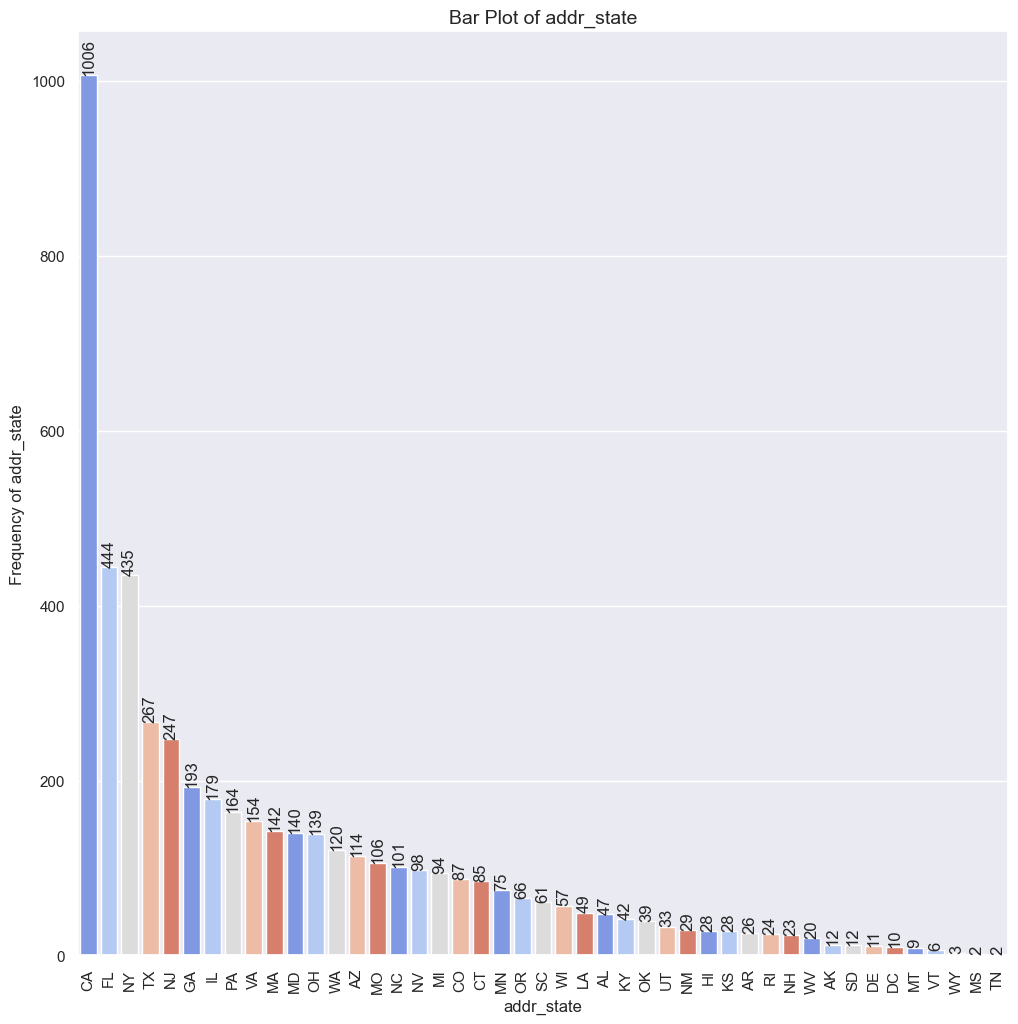

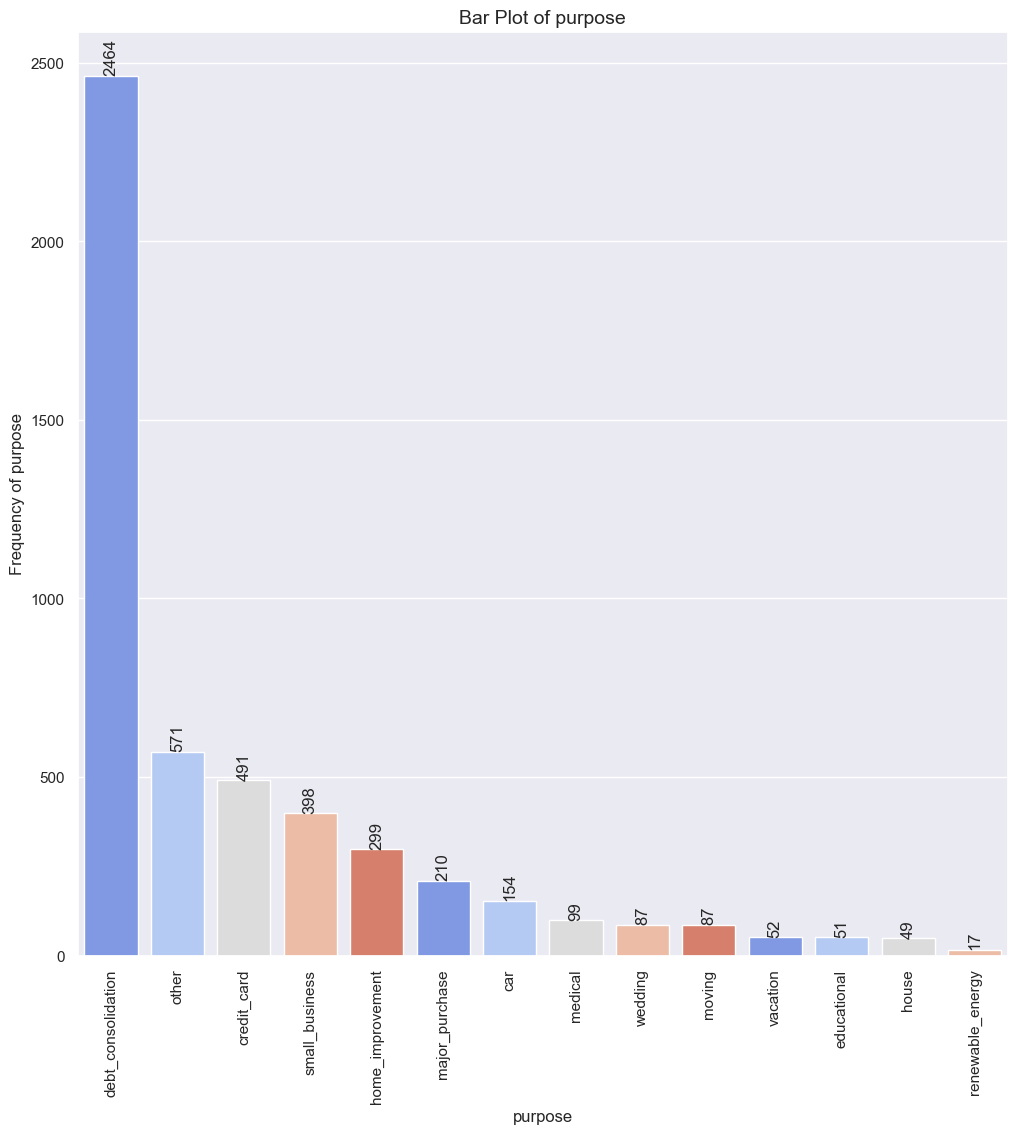

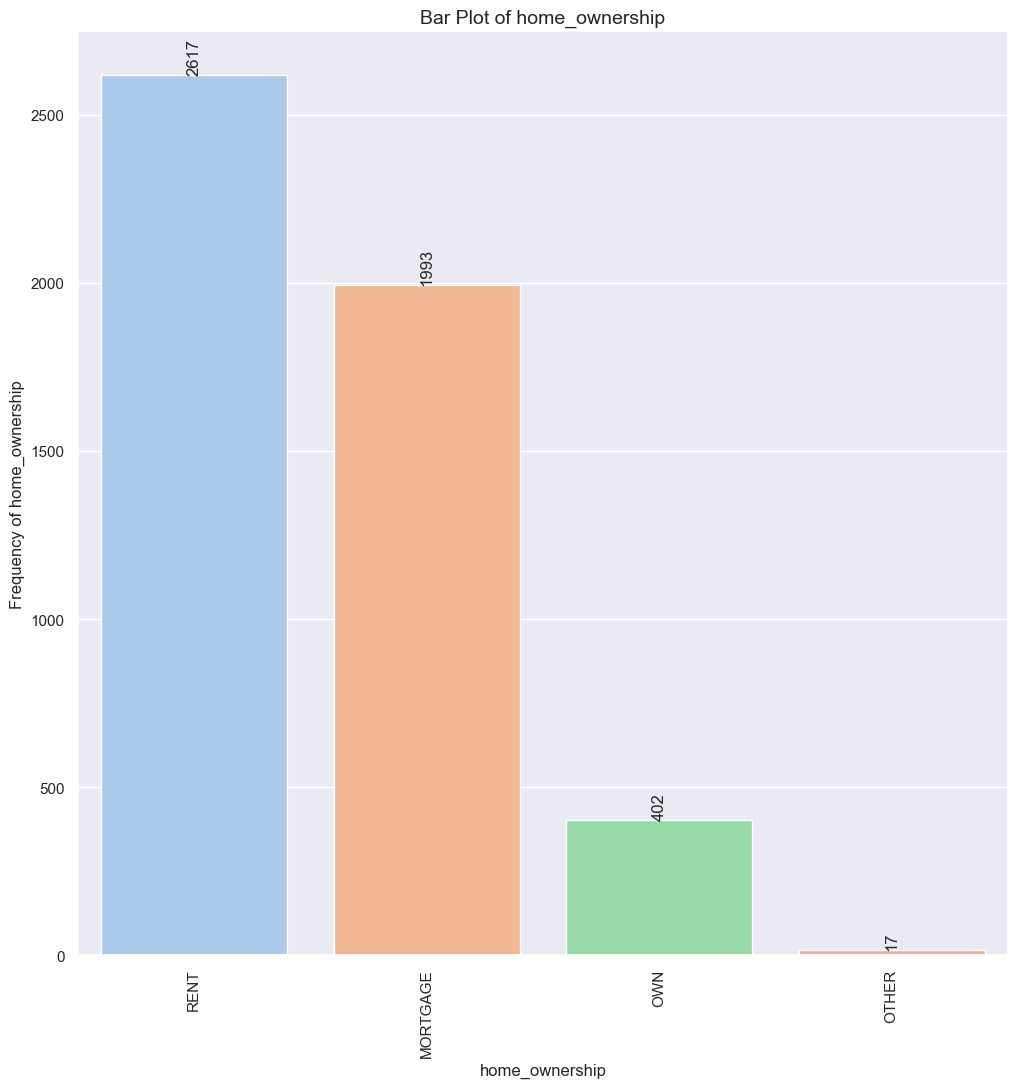

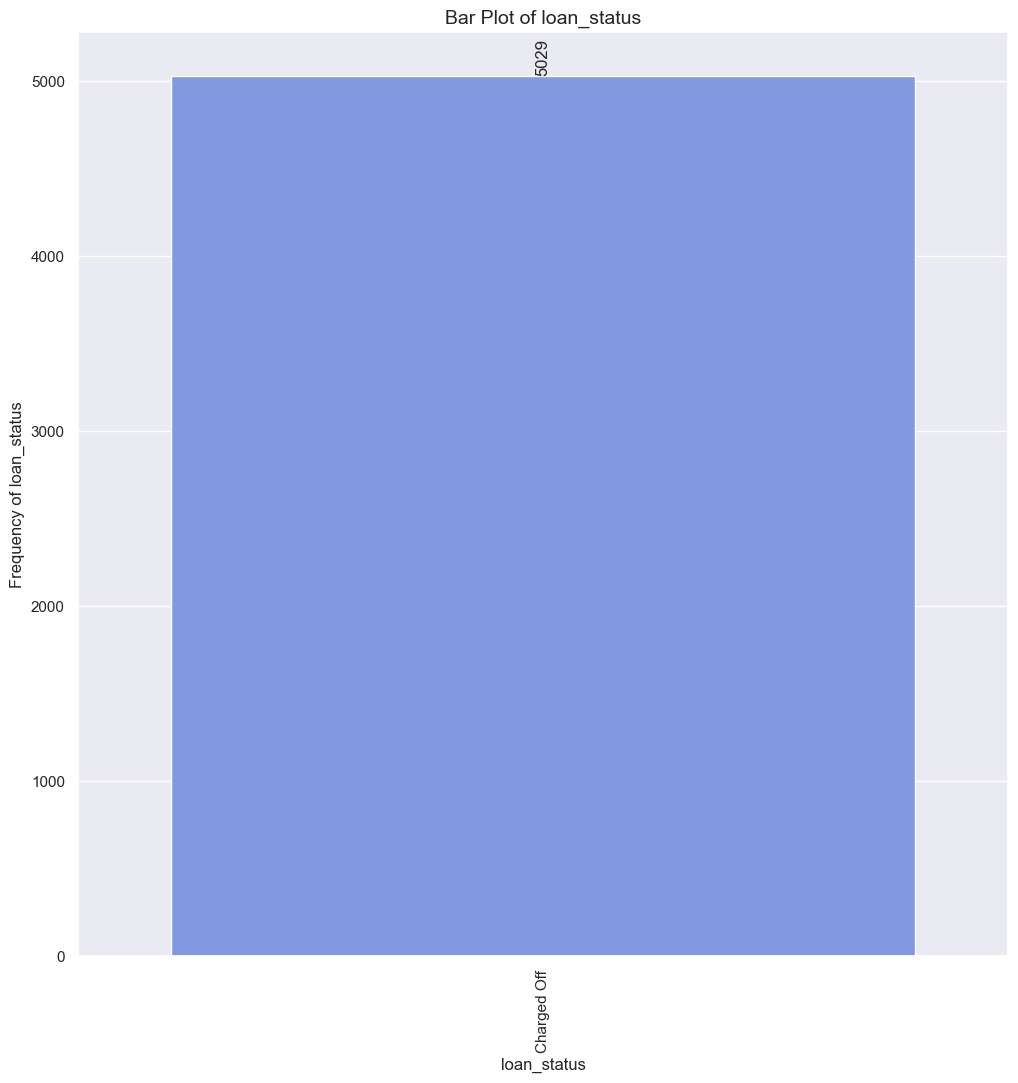

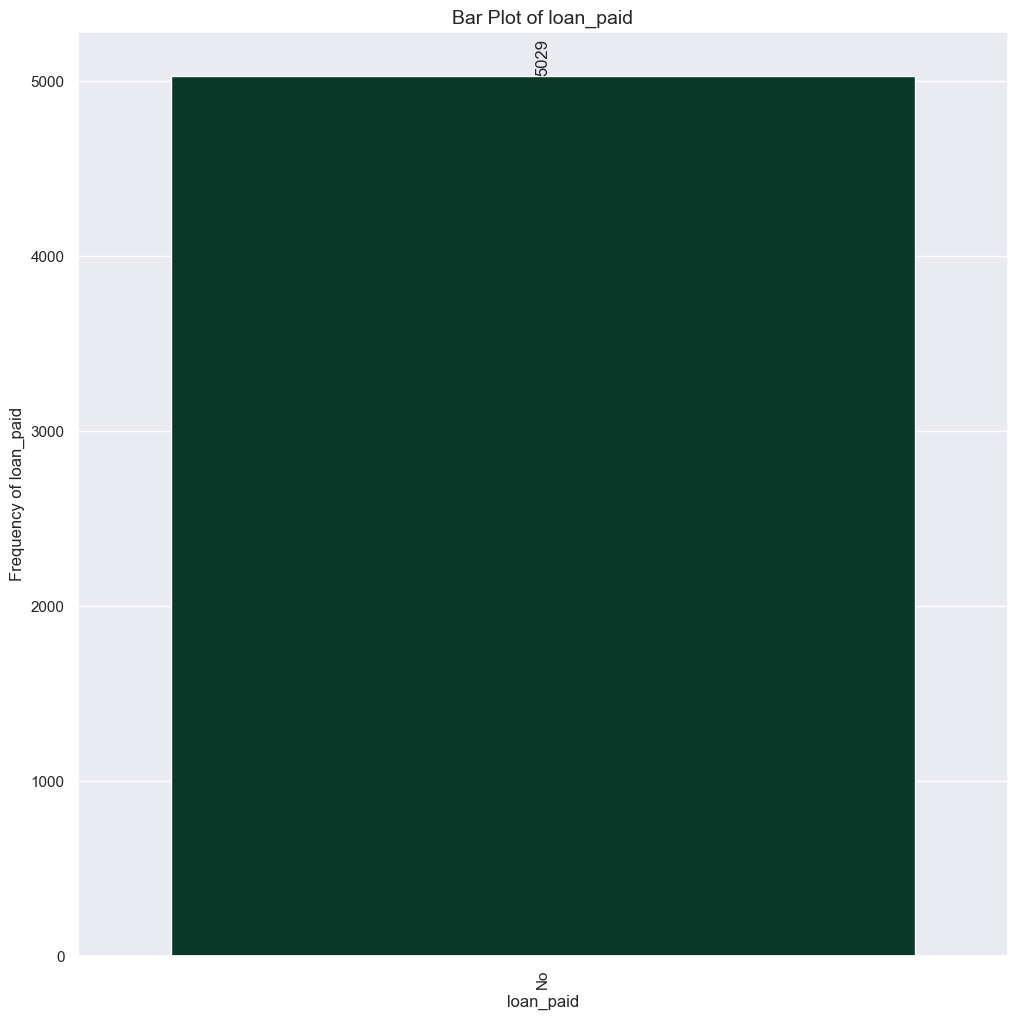

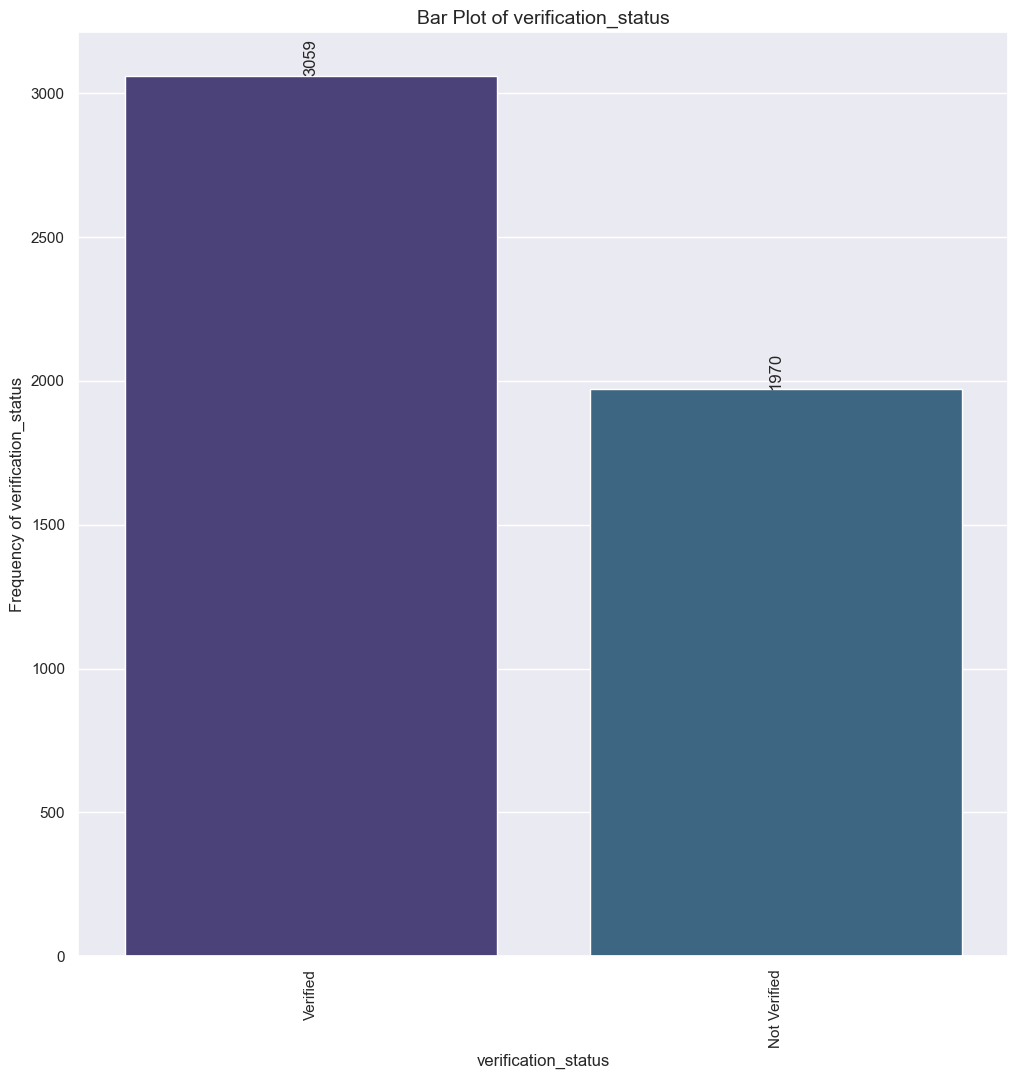

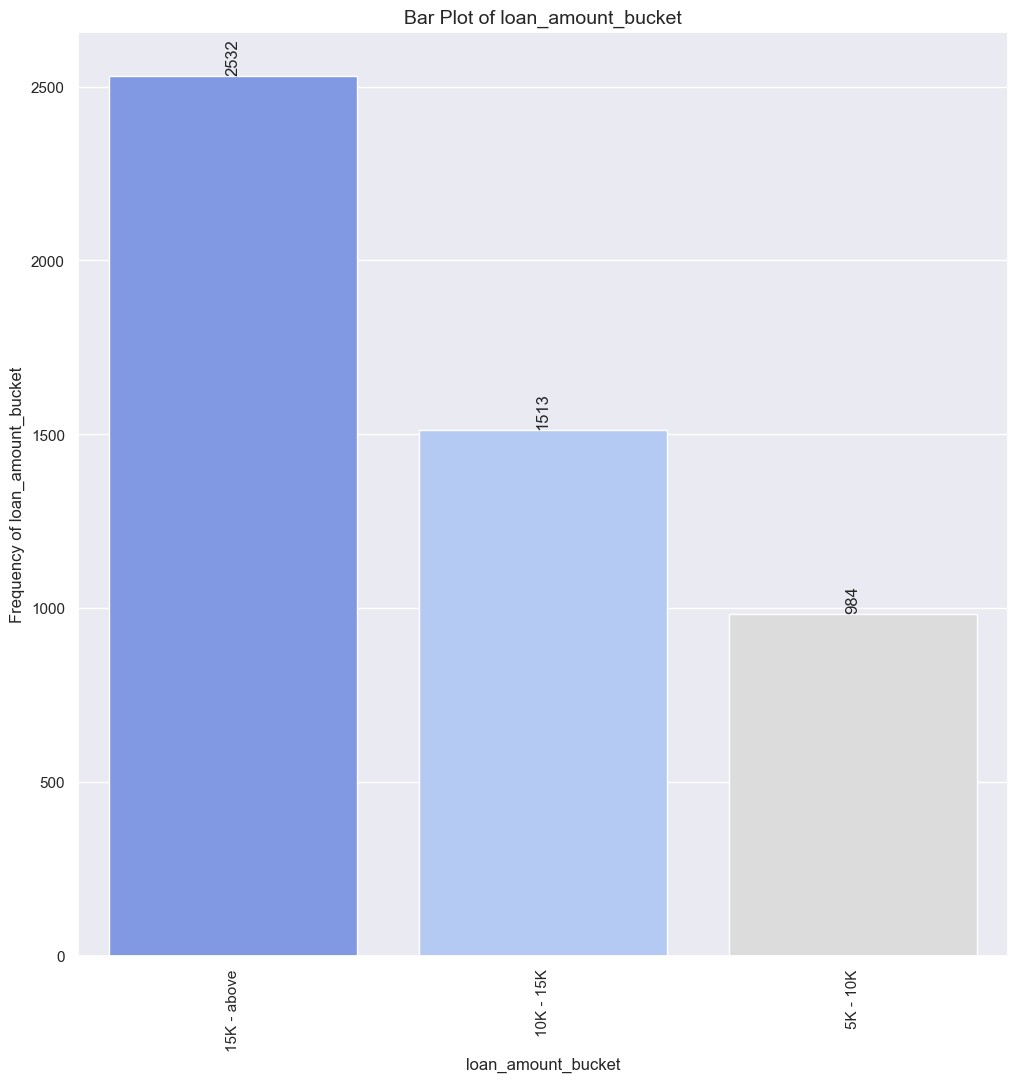

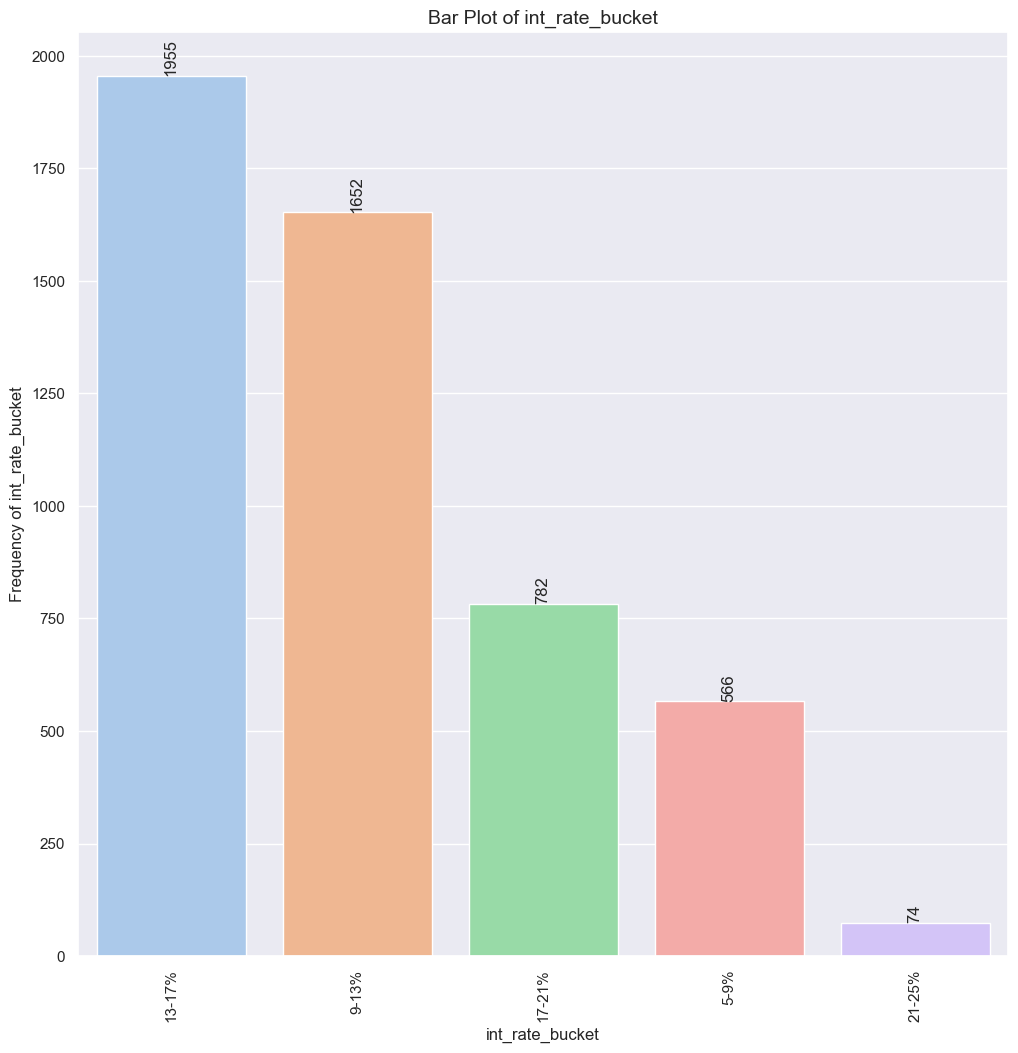

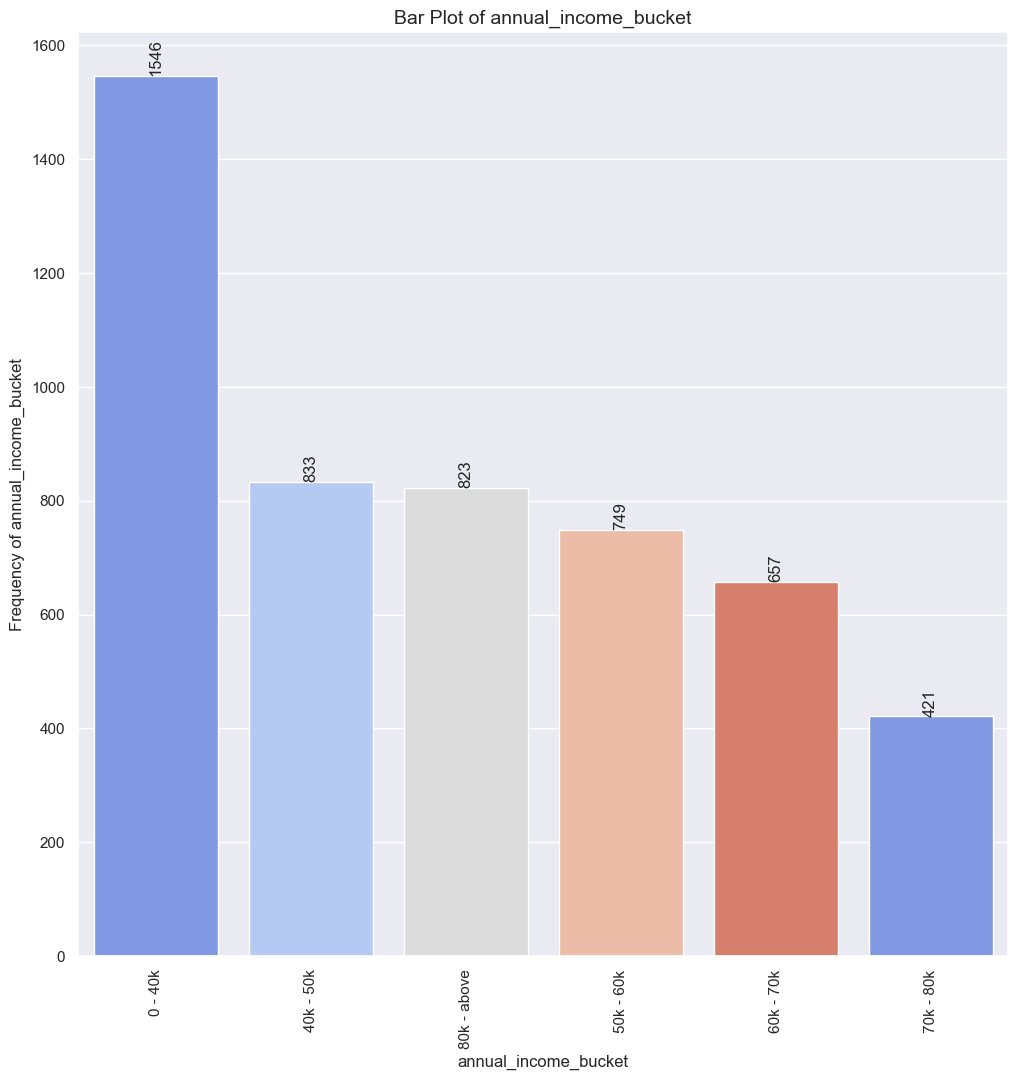

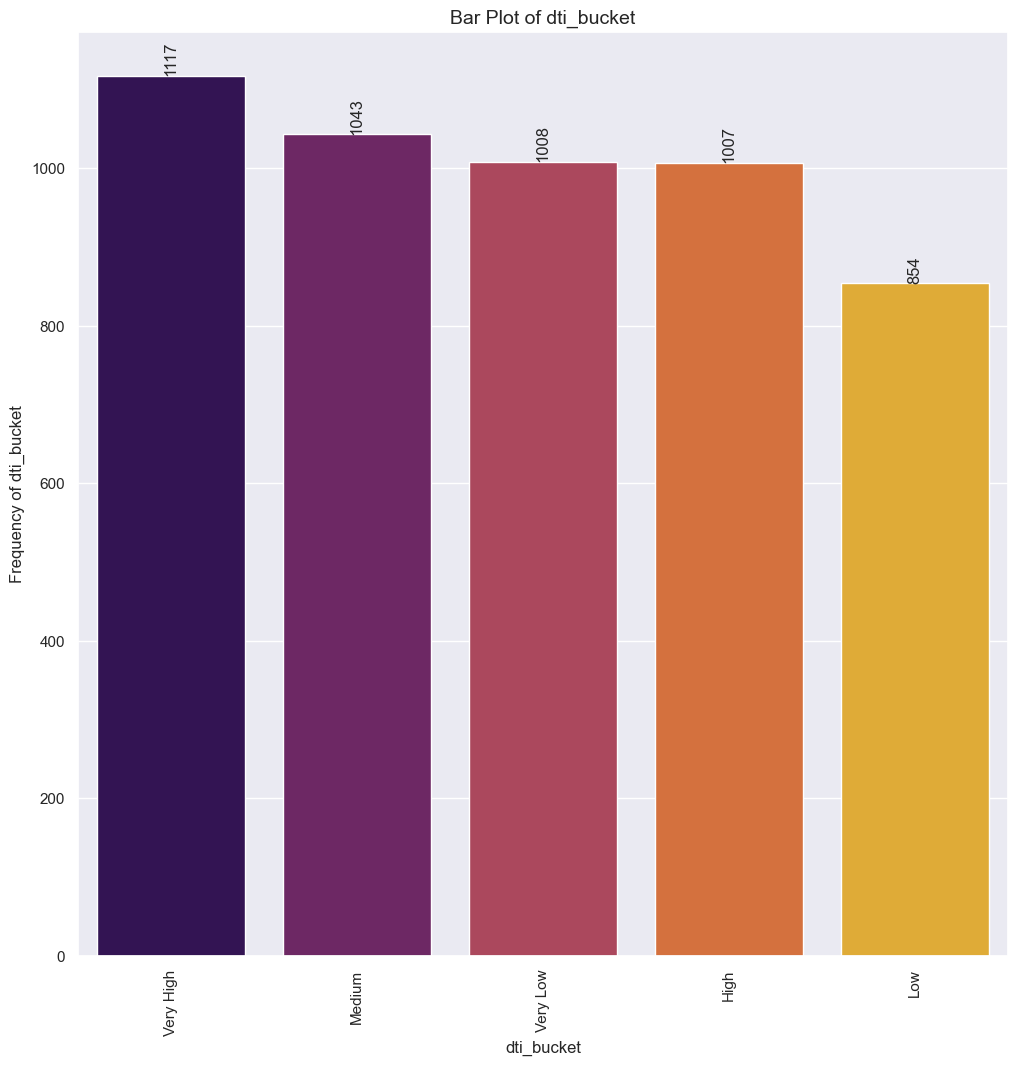

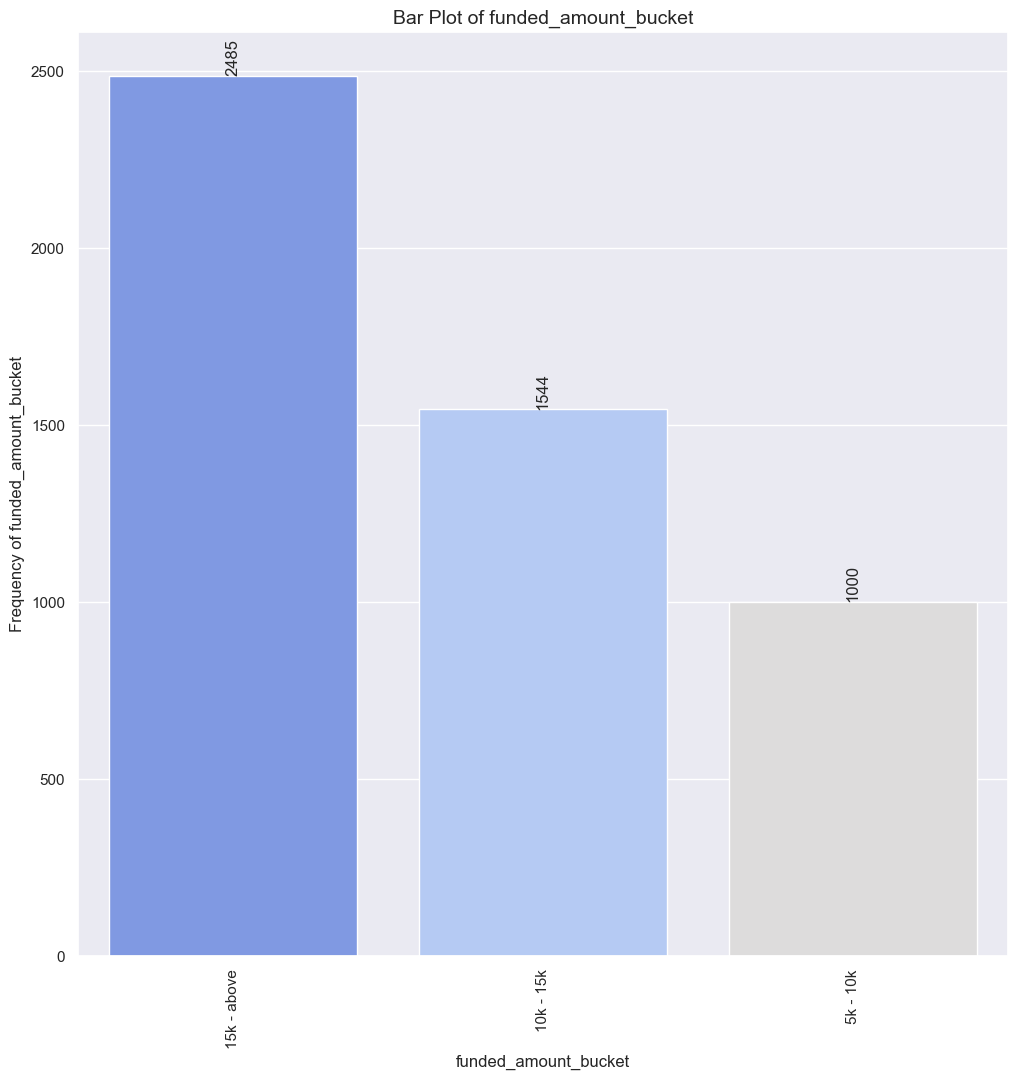

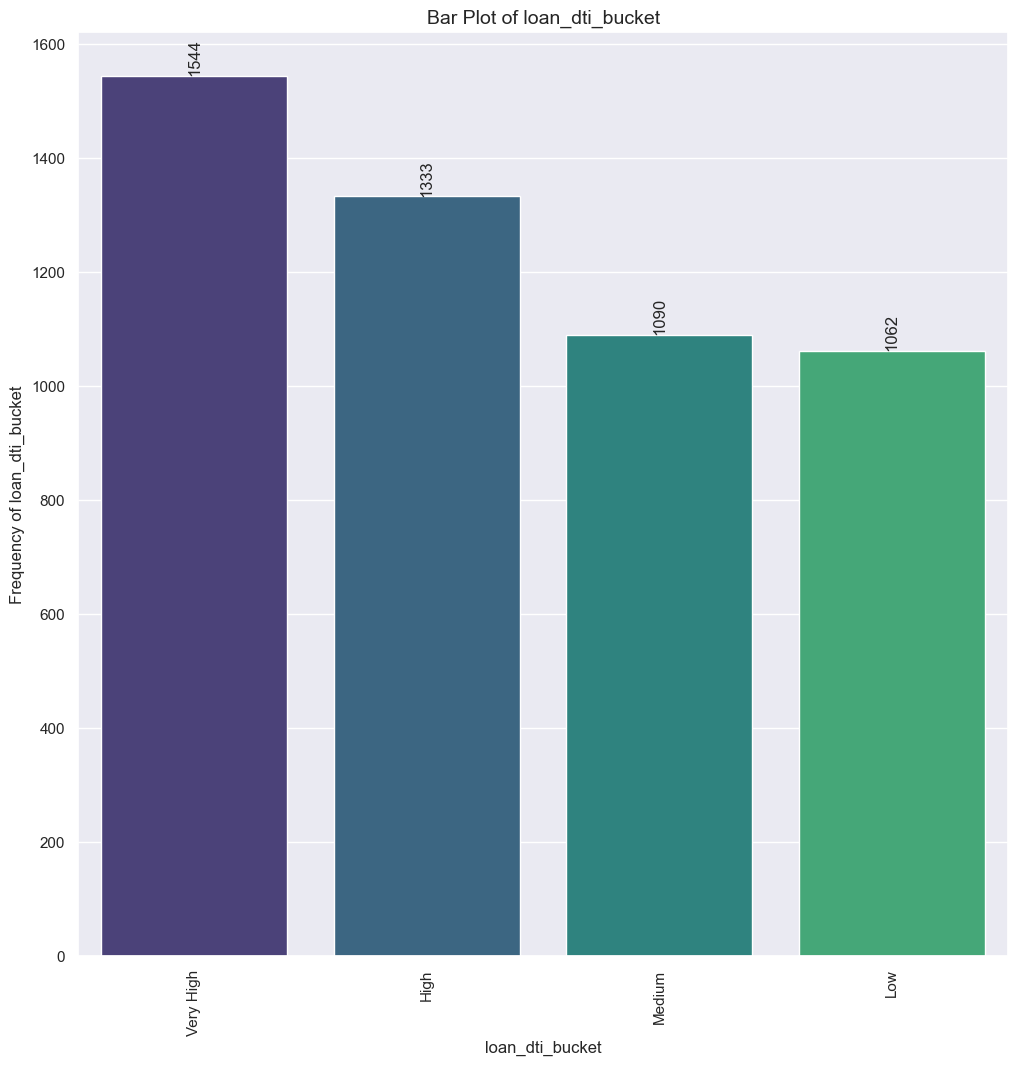

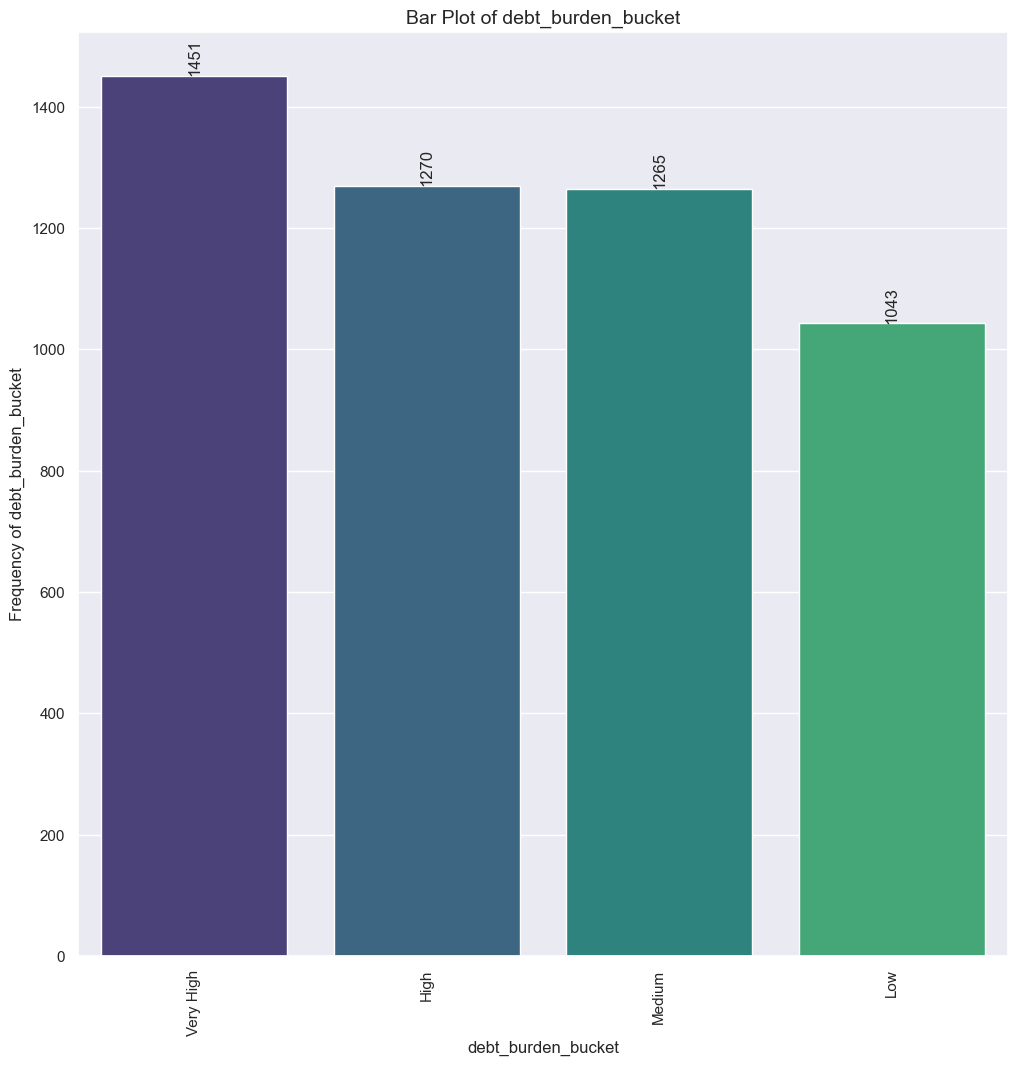

In [65]:
for un_cat_var in [
    'addr_state', 'purpose', 'home_ownership', 'loan_status', 'loan_paid','verification_status'
    ,'loan_amount_bucket','int_rate_bucket','annual_income_bucket','dti_bucket',
    'funded_amount_bucket','loan_dti_bucket','debt_burden_bucket'
]:
    plot_bar_graph(
        loan_data,
        x_column = un_cat_var,
        y_column = un_cat_var,
        title = f'Bar Plot of {un_cat_var}',
        xlabel = un_cat_var,
        ylabel=f'Frequency of {un_cat_var}',
        figsize=(12, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )


#### Graphs of Quantitative Variables - Continuous variables

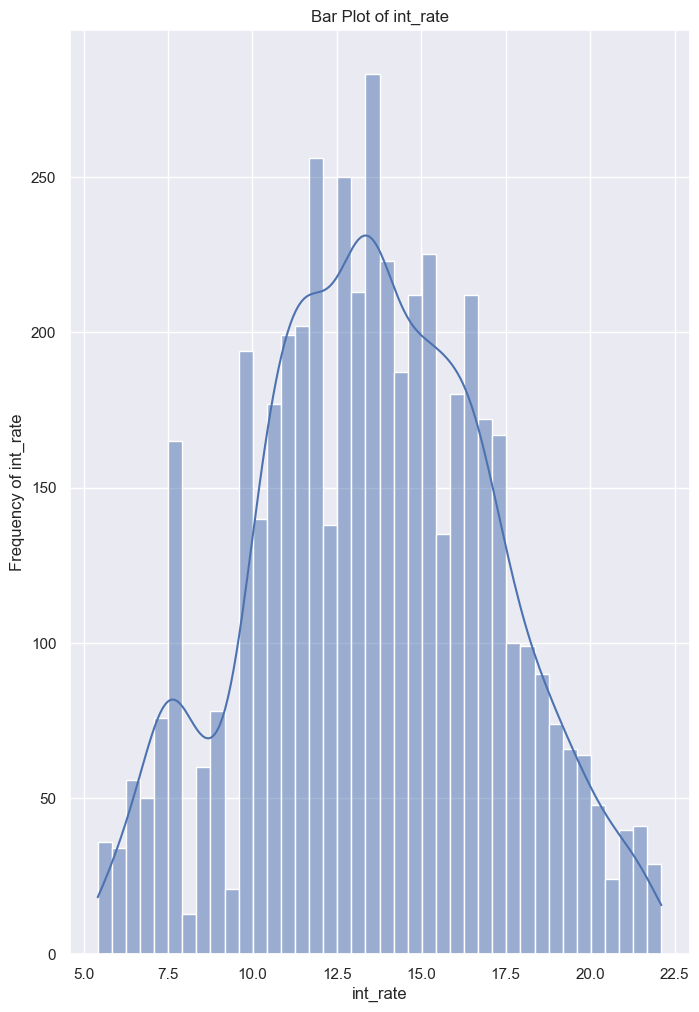

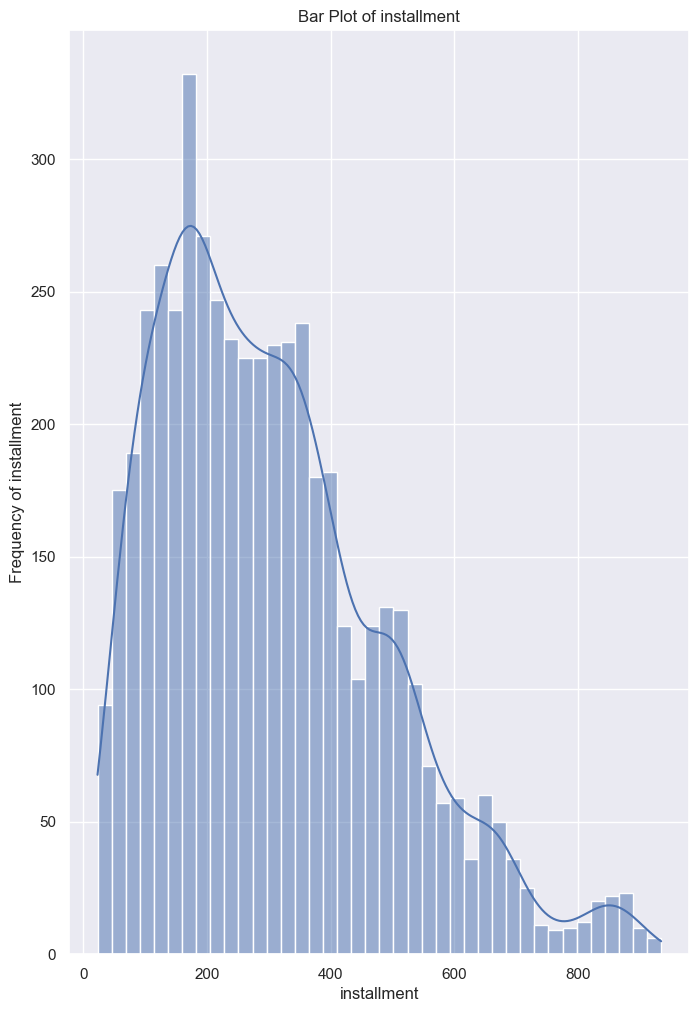

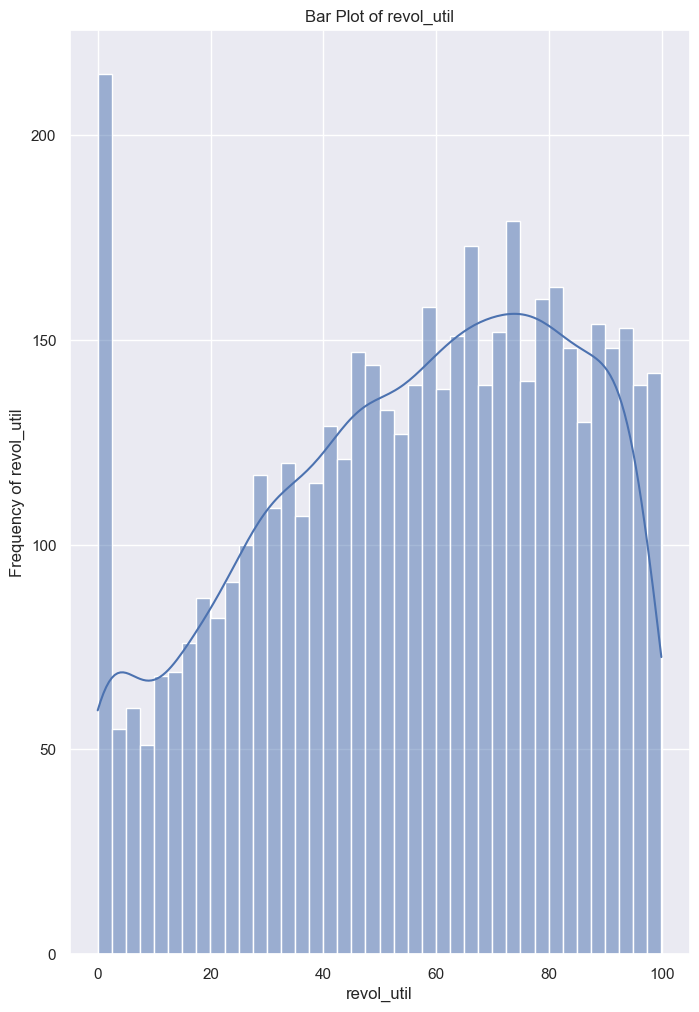

In [66]:
columns = ['int_rate', 'installment', 'revol_util']

for column in columns:
    plot_histogram(
            loan_data,
            column, 
            bins = 40,
            title = f'Bar Plot of {column}',
            x_label = column,
            y_label=f'Frequency of {column}',
            figsize=(8, 12),
            filter_column='loan_paid',
            filter_value='No'
        )


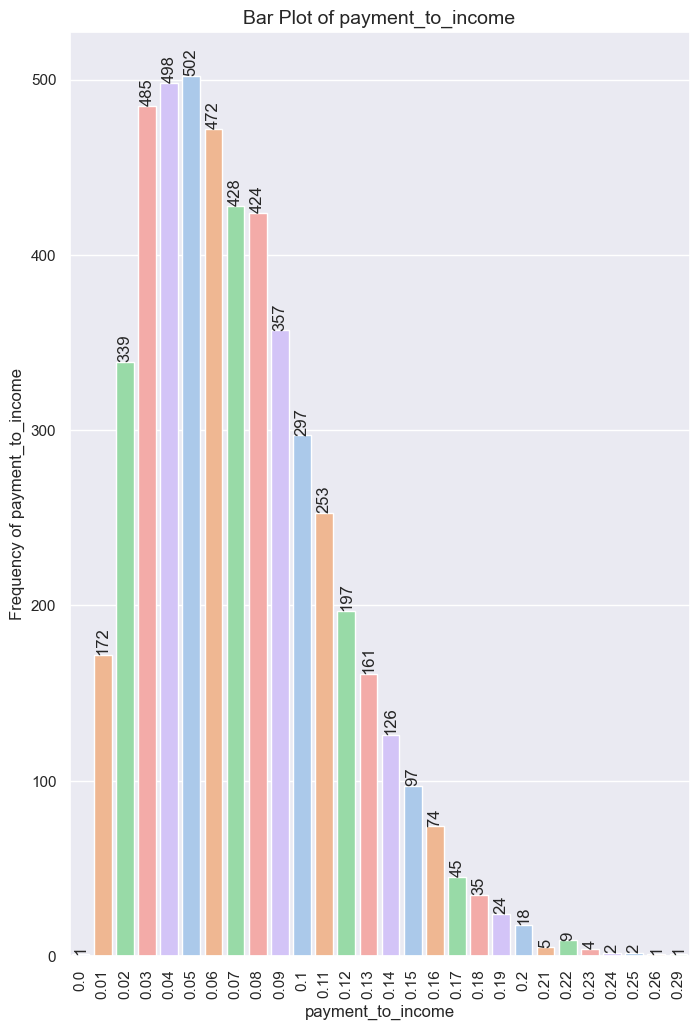

In [67]:
plot_bar_graph(
        loan_data,
        x_column = 'payment_to_income',
        y_column = 'payment_to_income',  # To get the count of occurrences in each category
        title = f'Bar Plot of {'payment_to_income'}',
        xlabel = 'payment_to_income',
        ylabel=f'Frequency of {'payment_to_income'}',
        figsize=(8, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )


#### Key Insights On Univariate Analysis

##### A. Categorical Variables

**Grade (LC Assigned Loan Grade)**  
- **Finding:** Grade 'B' had the most defaults (1,317), followed by 'C' (1,251) and 'D' (1,003).  
- **Reason:** Mid-tier grades (B) show higher default vulnerability.

**Employment Length (emp_length)**  
- **Finding:** 10 years was the most common employment length among defaulters (1,359).  
- **Reason:** Long employment does not guarantee loan repayment ability; other factors (e.g., low income or high debt) may contribute to defaults.

**Loan Term (term_months)**  
- **Finding:** Most defaulters had 36-month loans (2,961).  
- **Reason:** Shorter terms can result in higher monthly payments, causing financial strain.

**Issue Year (issue_year)**  
- **Finding:** 2011 saw the highest defaults (2,879).  
- **Reason:** Economic downturns, such as the post-2008 financial crisis, led to increased defaults.

**Issue Month (issue_month)**  
- **Finding:** December had the highest defaults (600).  
- **Reason:** The holiday season often leads to financial strain, increasing debt and default risk.

**Credit Line Opening Month (cr_line_month)**  
- **Finding:** Most defaults were from borrowers who opened their first credit line in the past 12 months (533).  
- **Reason:** New borrowers, lacking credit history, are more prone to defaults.

**Credit Line Opening Year (cr_line_year)**  
- **Finding:** The year 2000 had the highest defaults (456).  
- **Reason:** Early credit history borrowers may have accumulated significant debt or struggled with financial management.

##### 2. Unordered Categorical Data

**State (addr_state)**  
- **Finding:** California had the highest defaults (1,006).  
- **Reason:** Regional factors, including high living costs, influence default rates.

**Home Ownership (home_ownership)**  
- **Finding:** Renters had the highest defaults (2,617).  
- **Reason:** Renters may face more financial instability than homeowners, increasing default risk.

**Loan Purpose (purpose)**  
- **Finding:** Debt consolidation loans had the highest defaults (2,464).  
- **Reason:** These borrowers often face financial distress, making them higher-risk applicants.

**Verification Status (verification_status)**  
- **Finding:** Most defaulters had verified statuses (3,059).  
- **Reason:** Verification alone doesn’t ensure repayment capacity.

**Loan paid & Loan status** 
A significant number of loan participants, specifically 5,317 individuals, were loan defaulters, unable to clear their loans. The lending company should enhance risk assessment practices, including stricter credit checks and lower loan-to-value ratios, for applicants with a history of loan defaults. They should offer financial education and support services to help borrowers manage their finances and improve loan repayment outcomes.


##### B. Quantitative Variables

**Interest Rate (int_rate)**  
- **Finding:** Defaults were highest for rates between 9-17%.  
- **Reason:** Higher rates increase borrowing costs, leading to repayment challenges.

**Installment**  
- **Finding:** Most defaulters had monthly installments between 150-450 USD.  
- **Reason:** Higher payments strain borrowers, especially those with low incomes or high debt.

**Payment-to-Income Ratio (payment_to_income)**  
- **Finding:** Borrowers with a ratio of 5% had higher defaults (502).  
- **Reason:** A high ratio indicates financial stress, increasing the likelihood of default.

**Revolving Utilization (revol_util)**  
- **Finding:** Defaults were highest among borrowers with 60-90% utilization (533).  
- **Reason:** High credit utilization signals financial distress, leading to higher default risk.


##### Key Insights and Recommendations:

- **Grade and Credit Risk:** Lower credit grades correlate with higher defaults. Stricter assessments for these applicants are needed.
- **Loan Amount and Repayment Capacity:** Larger loan amounts and higher interest rates increase default risk. A thorough evaluation of repayment capacity is essential.
- **Income and Financial Stability:** Lower-income borrowers are more likely to default. Stricter income assessments can reduce risk.
- **Debt-to-Income and Credit Utilization:** High DTI and revolving utilization predict defaults. These metrics should be prioritized in assessments.

### Bivariate Analysis  
#### A. Categorical Variables  
**1. Ordered Categorical Data**  
Explore relationships between ordered variables:  
1. `grade` vs. `loan_status`  
2. `term_months` vs. `loan_status`  
3. `issue_year` vs. `loan_status`  
4. `issue_quarter` vs. `loan_status` 
5. `emp_length` vs `loan_status` 

**2. Unordered Categorical Data**  
Explore relationships between unordered variables:  
1. `home_ownership` vs. `loan_status`  
2. `purpose` vs. `loan_status`  
3. `addr_state` vs. `loan_status`  
4. `verification_status` vs. `loan_status`  


#### B. Quantitative Variables  
Analyze how numerical variables relate to default rates:  
1. `payment_to_income` vs. `loan_status`  

#### Graph of Ordered Categorical Data

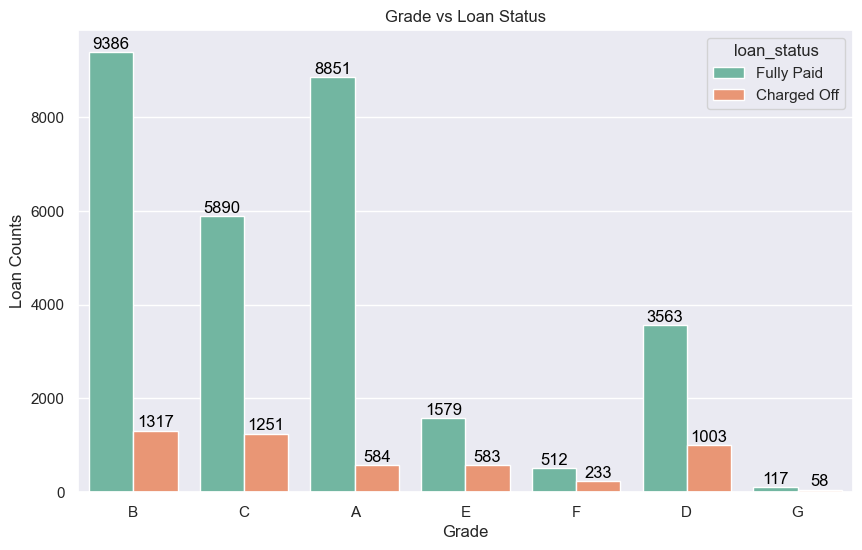

In [68]:
#Genrate graph of bivariate analysis using genrate_countplot function for grade column
generate_countplot(loan_data, 'grade', x_axis_label = 'Grade', palette_list = sns.color_palette("Set2"), hue_column= 'loan_status', y_axis_label = 'Loan Counts' , plot_title='Grade vs Loan Status', rotation=0)


In [69]:
#Calculate charged of percentage for grade column
charged_off_perc = calculate_charged_off_percentage(loan_data, 'grade')
print("\ncharged percentage of grade are \n")
print(charged_off_perc)



charged percentage of grade are 

loan_status  Charged Off  Fully Paid  Charged Off %
grade                                              
A                    584        8851           6.19
B                   1317        9386          12.30
C                   1251        5890          17.52
D                   1003        3563          21.97
E                    583        1579          26.97
F                    233         512          31.28
G                     58         117          33.14


**charged off % Insights**

loans with grades G, F, E, and D have the highest likelihood of default. The "Charged Off %" for these grades are 33.14%, 31.28%, 26.97%, and 21.97% respectively. These percentages are substantially higher than those for grades A, B, and C, indicating a much greater propensity for default within these lower grade categories. This is likely because lower grades typically reflect higher risk borrowers, as assessed by lenders during the loan application process.

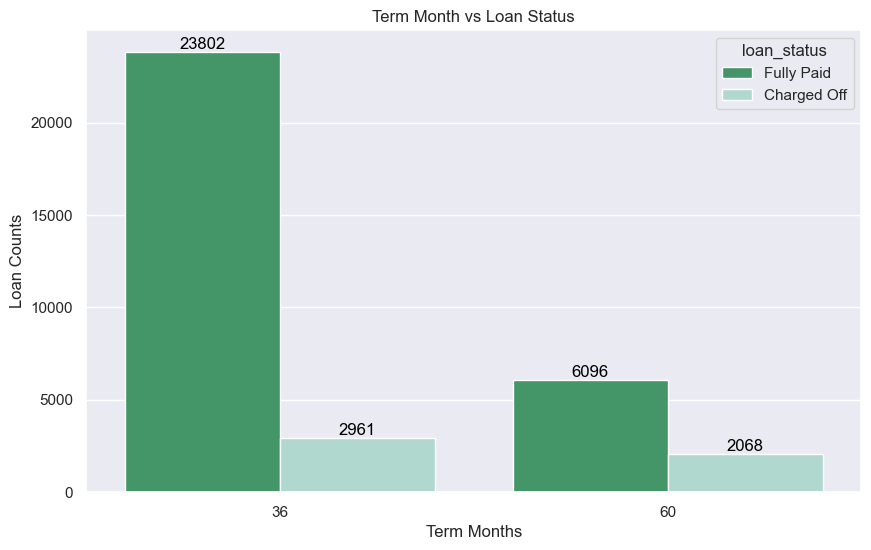

In [70]:
#Genrate graph of bivariate analysis using genrate_countplot function for term_months column
generate_countplot(loan_data, 'term_months', x_axis_label = 'Term Months', palette_list = sns.color_palette("BuGn_r", 2), hue_column= 'loan_status', y_axis_label = 'Loan Counts' , plot_title='Term Month vs Loan Status', rotation=0)


In [71]:
#Calculate charged of percentage for term_months column
charged_off_perc = calculate_charged_off_percentage(loan_data, 'term_months')
print("\ncharged percentage of Term Months are \n")
print(charged_off_perc)



charged percentage of Term Months are 

loan_status  Charged Off  Fully Paid  Charged Off %
term_months                                        
36                  2961       23802          11.06
60                  2068        6096          25.33


**charged off % Insights**

loans with a 60-month term are more likely to default.  The "Charged Off %" for 60-month loans is 25.33%, significantly higher than the 11.06% for 36-month loans. This indicates that a substantially larger proportion of 60-month loans end in default compared to 36-month loans.  The higher default rate for 60-month loans likely reflects increased risk associated with longer repayment periods.  Borrowers may be more likely to encounter financial difficulties over a longer timeframe, increasing the chance of default.

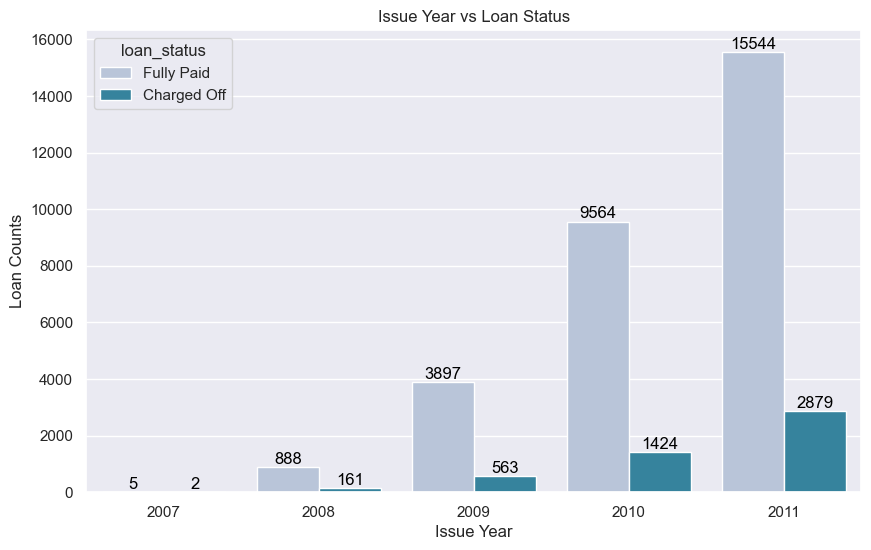

In [72]:

#Genrate graph of bivariate analysis using genrate_countplot function for loan Issue year column
generate_countplot(loan_data, 'issue_year', x_axis_label = 'Issue Year', palette_list = sns.color_palette("PuBuGn", 2), hue_column= 'loan_status', y_axis_label = 'Loan Counts' , plot_title='Issue Year vs Loan Status', rotation=0)


**Issue year Insight**

The loan defaulters or charged off applicants increasing year by year, showing positive trend

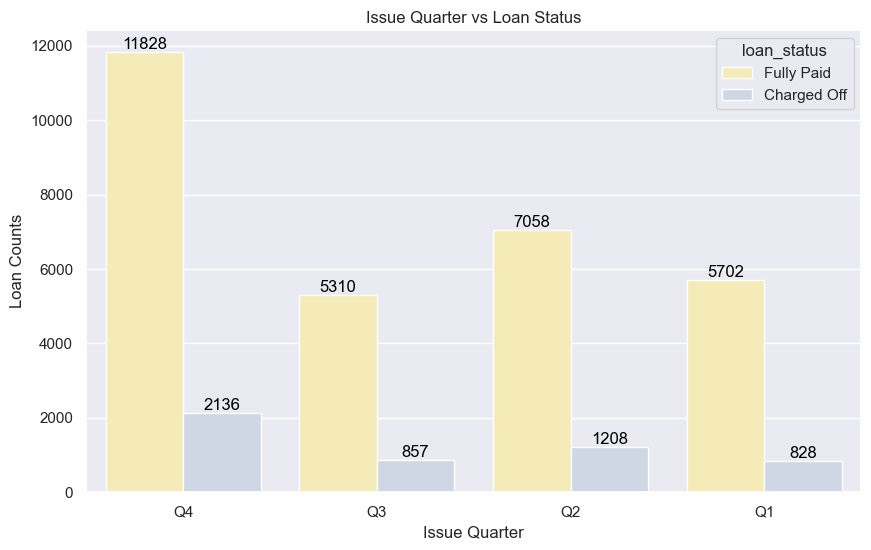

In [73]:

#Genrate graph of bivariate analysis using genrate_countplot function for loan Issue quarter column

generate_countplot(loan_data, 'issue_quarter', x_axis_label = 'Issue Quarter', palette_list = sns.color_palette("Pastel2_r", 2), hue_column= 'loan_status', y_axis_label = 'Loan Counts' , plot_title='Issue Quarter vs Loan Status', rotation=0)


In [74]:
#Calculate charged of percentage for Loan Issue quarter column
charged_off_perc = calculate_charged_off_percentage(loan_data, 'issue_quarter')
print("\ncharged percentage of issue_quarter are \n")
print(charged_off_perc)



charged percentage of issue_quarter are 

loan_status    Charged Off  Fully Paid  Charged Off %
issue_quarter                                        
Q1                     828        5702          12.68
Q2                    1208        7058          14.61
Q3                     857        5310          13.90
Q4                    2136       11828          15.30


**charged off % Insights**

Q4 shows the highest charged-off percentage (15.30%). However, it's important to note that Q4 also has the highest number of total loans. While Q4 has the highest percentage of charged-off loans, the differences between Q4 (15.30%), Q2 (14.61%), and Q3 (13.90%) aren't dramatically large. The relatively small differences in the "Charged Off %" across the quarters, coupled with the visual representation showing a larger number of loans issued in Q4, suggests that the higher percentage in Q4 might simply be due to the higher volume of loans issued during that quarter, not necessarily a significantly higher default rate. 

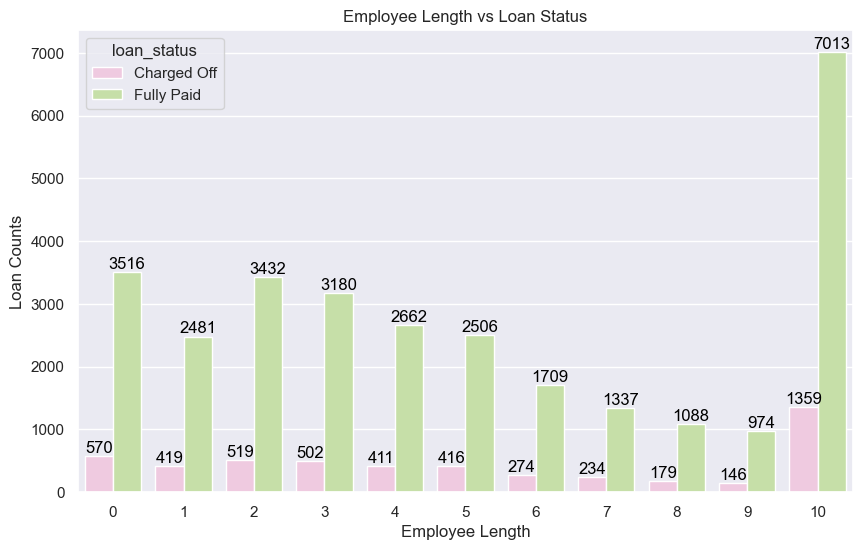

In [75]:
#Genrate graph of bivariate analysis using genrate_countplot function for employement lenghth column
generate_countplot(loan_data, 'emp_length', x_axis_label = 'Employee Length', palette_list = sns.color_palette("PiYG", 2), hue_column= 'loan_status', y_axis_label = 'Loan Counts' , plot_title='Employee Length vs Loan Status', rotation=0)


**Employement year Insight**
Most number of loan applicants are 10 or more years of experience. They also are the ones who are most likely to default

#### Graph of Unordered Categorical Data


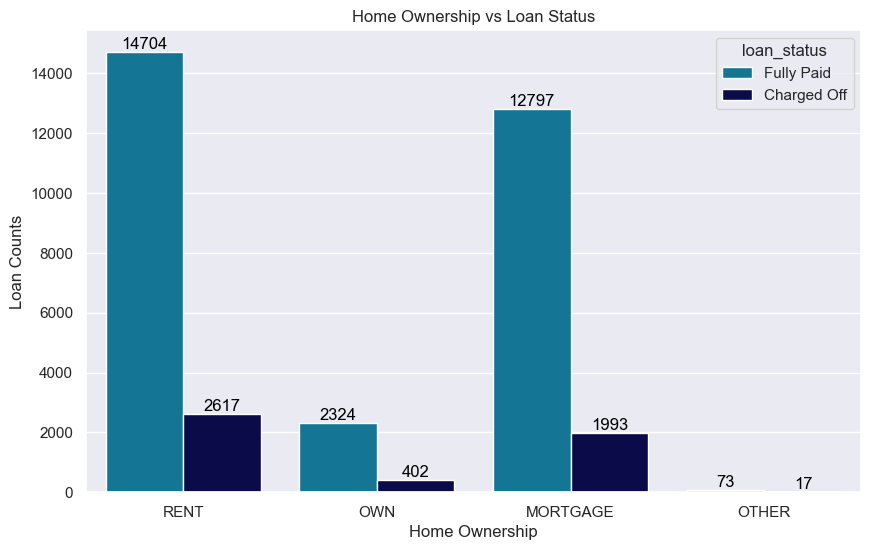

<Figure size 640x480 with 0 Axes>

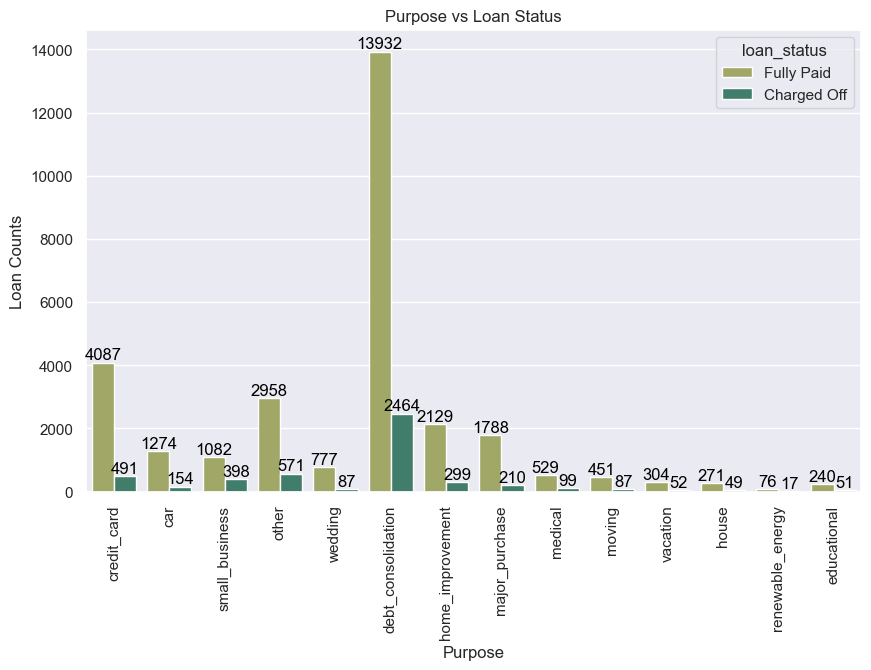

<Figure size 640x480 with 0 Axes>

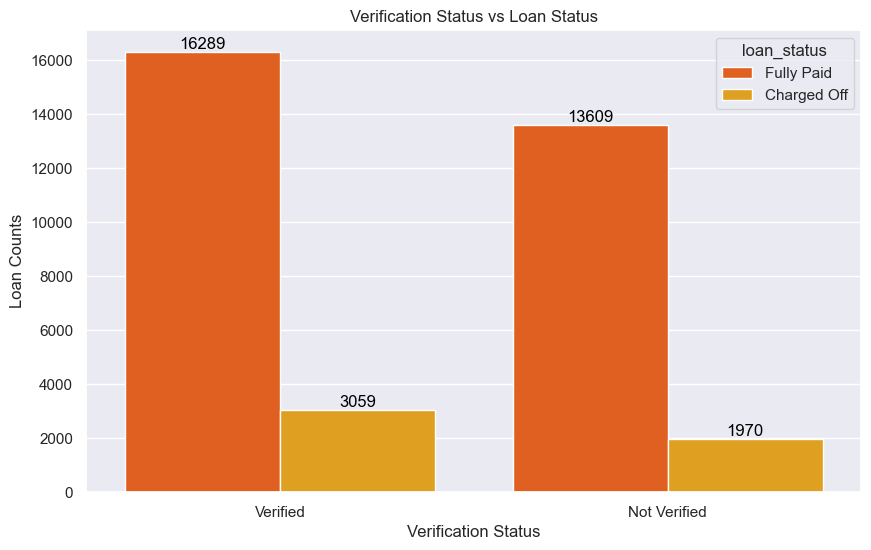

<Figure size 640x480 with 0 Axes>

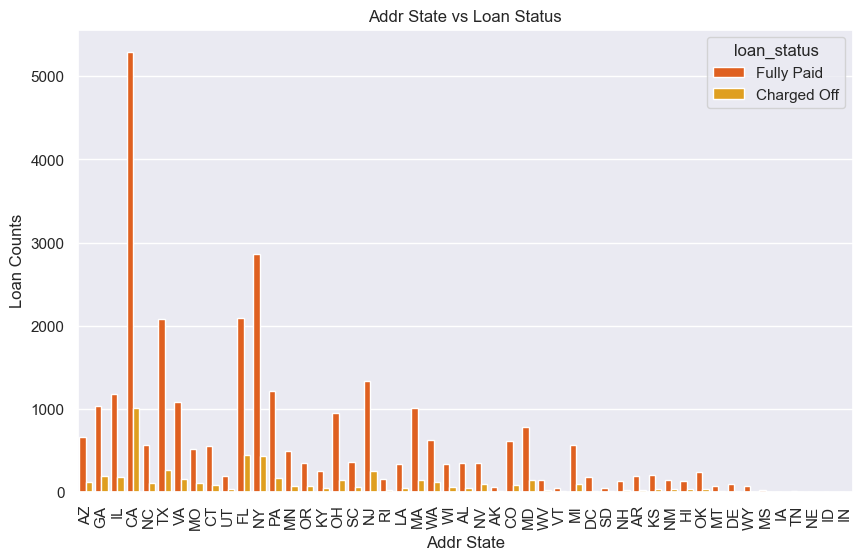

<Figure size 640x480 with 0 Axes>

In [76]:
# List of random palettes to choose from  
palettes = [  
    sns.color_palette("ocean_r", 2),  
    sns.color_palette("cividis", 2),  
    sns.color_palette("autumn", 2),  
    sns.color_palette("gist_earth_r", 2),  
]  

# List of columns to generate plots for  
columns_to_plot = ['home_ownership', 'purpose', 'verification_status', 'addr_state']  

# Columns that need a 90-degree rotation of x-axis labels  
rotation_columns = ['purpose', 'addr_state']  


# Loop through columns and generate countplots  
for column in columns_to_plot:  
    # Select a random palette  
    random_palette = random.choice(palettes)  

    #Determine rotation. More efficient than if/else statement  
    rotation = 90 if column in rotation_columns else 0  

    # Determine annotation visibility. More efficient than if/else statement  
    show_annotations = False if column == 'addr_state' else True #for addr_state, we do not want annotations  

    # Call the generate_countplot function.  Assuming this function exists and handles plotting and annotations  
    generate_countplot(  
        data_frame=loan_data,  
        column_name=column,  
        hue_column='loan_status',  
        palette_list=random_palette,  
        x_axis_label=column.replace("_", " ").title(), #Simplified title capitalization  
        y_axis_label='Loan Counts',  
        plot_title=f'{column.replace("_", " ").title()} vs Loan Status',  
        rotation=rotation,  
        show_annotations=show_annotations #Pass show_annotations directly  
    )  

    plt.tight_layout() #Avoid overlapping elements  
    plt.show() #Show the plot after each iteration


#### Quantitative Variables

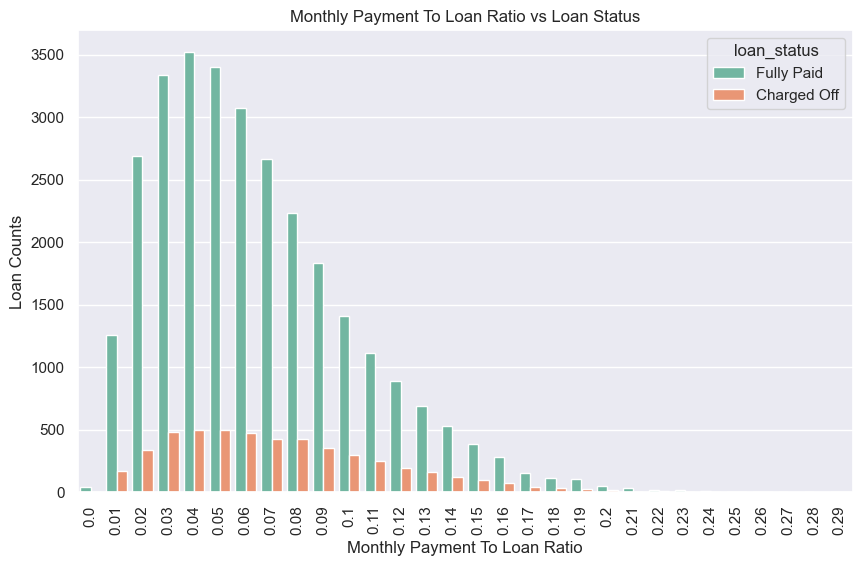

In [77]:
#Genrate graph of bivariate analysis using genrate_countplot function for payment_to_income column

generate_countplot(loan_data, 'payment_to_income', x_axis_label = 'Monthly Payment To Loan Ratio', palette_list = sns.color_palette("Set2"), hue_column= 'loan_status', y_axis_label = 'Loan Counts' , plot_title='Monthly Payment To Loan Ratio vs Loan Status', rotation=90, show_annotations=False)


#### Summary of Bivariate analysis

**1. Grade vs Loan Status**
- Grades B and C have the **highest charged-off counts** (1,317 and 1,251, respectively).
- Grades D and E also have significant defaults (1,003 and 583), whereas **Grade A shows fewer defaults (584)**.
- The highest risk is observed in **Grade G** with 33% defaults (58 out of 175 loans), but the dataset for Grade G is relatively small.

**Inference:** Borrowers with poor ratings (Grades B, C, D, and E) are at a higher risk of default. Implementing stricter approval criteria for these grades and offering smaller loans with higher interest could mitigate risk.


**2. Term Month vs Loan Status**
- Borrowers with 36-month terms have **2,961 charged-off loans out of 26,763**, indicating a lower proportionate default rate.
- **60-month terms show a significant default count of 2,068 out of 8,164 loans.**

**Inference:** Longer-term loans are riskier, as evidenced by the higher default rate. Offering more 36-month loans instead of 60-month terms, or stricter screenings for 60-month term applicants, could reduce losses.


**3. Issue Year vs Loan Status**
- In 2011, the highest number of defaults occurred (2,879 charged-off loans out of 18,423).
- Defaults in earlier years (e.g., 2007-2009) are minimal compared to the surge in 2010 and 2011.

**Inference:** Loans issued in later years (2010-2011) saw a rise in default rates. Updating risk analysis models with more recent data can help predict trends and improve screening processes.


**4. Issue Quarter vs Loan Status**
- **Q4 has the highest default count (2,136 defaults out of 13,964 loans)**, followed by Q2 (1,208 defaults out of 8,266).
- Default counts are lower in Q1 (828 defaults out of 6,530 loans).

**Inference:** Seasonality impacts defaults in Q4, potentially due to increased year-end spending. Tightening lending policies during Q4 or offering smaller loan amounts could help manage this.


**5. Employee Length vs Loan Status**
- Borrowers with 10 years of employment have the **highest charged-off count (1,359 defaults out of 8,372 loans)**.
- Borrowers with shorter employment tenures (0-2 years) show moderate defaults (e.g., 570 defaults for less than 1 year).

**Inference:** Long-tenured employees (10 years) might over-leverage their stable income, leading to higher defaults. Conducting additional scrutiny for high-loan applicants in this group could help reduce losses.


**6. Home Ownership vs Loan Status**
- Borrowers living in **rented properties show the highest charged-off count (2,617 out of 17,321 loans)**.
- Mortgage holders demonstrate lower default counts (1,993 out of 14,790 loans). Borrowers who own their homes have the lowest risk (402 defaults out of 15,119 loans).

**Inference:** Renters are at higher risk, possibly due to less stable housing. Offering smaller loans or imposing stricter screening for renters may lower default rates.


**7. Purpose vs Loan Status**
- The **“Debt Consolidation” category has the highest default count (2,464 out of 16,061 loans)**, followed by “Credit Card” (491 defaults out of 4,578 loans).
- Loans for smaller purposes like "wedding" and "home improvement" have comparatively lower defaults.

**Inference:** Borrowers applying for debt consolidation are at greater risk of default. Offering capped loan amounts and stricter repayment plans for such purposes would reduce losses.


**8. Verification Status vs Loan Status**
- **Verified accounts have higher defaults (3,059 defaults out of 19,348 loans)** compared to non-verified accounts (1,970 of 15,579 loans).

**Inference:** Verification is not a foolproof indicator of reliability. Strengthening policy measures for both verified and non-verified accounts will be necessary to lower losses.


**9. State Address vs Loan Status**
- Certain states (e.g., **California, Florida, and New York**) have high default counts compared to other states.
- States with higher living costs may correlate with higher risks of defaults.

**Inference:** Region-based risk assessment models should be employed to manage state-specific risks and adjust interest rates for high-risk states.


**10. Monthly Payment to Loan Ratio vs Loan Status**
- Borrowers with higher monthly payment-to-loan ratios (>10%) tend to have fewer defaults (e.g., defaults drop significantly beyond a 10% payment ratio).
- Defaulters are concentrated among borrowers with smaller ratios of less than 8%.

**Inference:** Borrowers repaying smaller portions of their loan amounts are more likely to default. Enforcing minimum repayment percentages could help as an early intervention strategy.


##### **Key Takeaways for Risk Mitigation**
1. **Loan Conditions:**
   - Limit high-risk long-term loans (60 months) and promote shorter terms (36 months).
   - Cap loan amounts for debt consolidation or poorer credit grades like C or D.

2. **Risk-Based Pricing and Screening:**
   - Implement higher interest rates for high-risk groups (e.g., renters, high DTI).
   - Stricter screening for state-specific risks (e.g., Florida, California, New York).

3. **Targeted Support:**
   - Offer financial counseling to borrowers in high-risk grades (C, D, E, and G).
   - Propose smaller loan amounts or flexible repayment terms for renters and employees with longer tenure (10 years).

4. **Seasonal Adjustments:**
   - Tighten approval criteria during Q4.
   - Assess borrower spending habits for year-end default risks.

By acting on these insights, the company can reduce loan defaults and minimize financial losses while refining predictive modeling for better risk assessment. 

### Segmentation Analysis  

1. `loan_amount_bucket` vs. `loan_status`  
2. `int_rate_bucket` vs. `loan_status`  
3. `annual_income_bucket` vs. `loan_status`  
4. `total_account_bucket` vs. `loan_status`  
5. `funded_amnt_bucket` vs. `loan_status`  
6. `loan_dti_bucket` vs. `loan_status`
7. `debt_burden_bucket` vs. `loan_status`
8. `revol_util_bucket` vs. `loan_status`
9. `credit_history_years_bucket` vs. `loan_status`

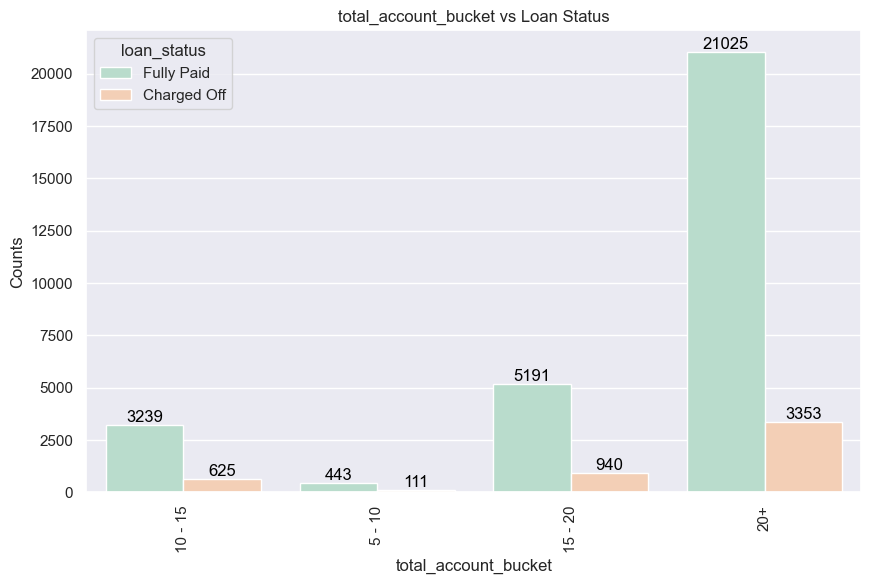

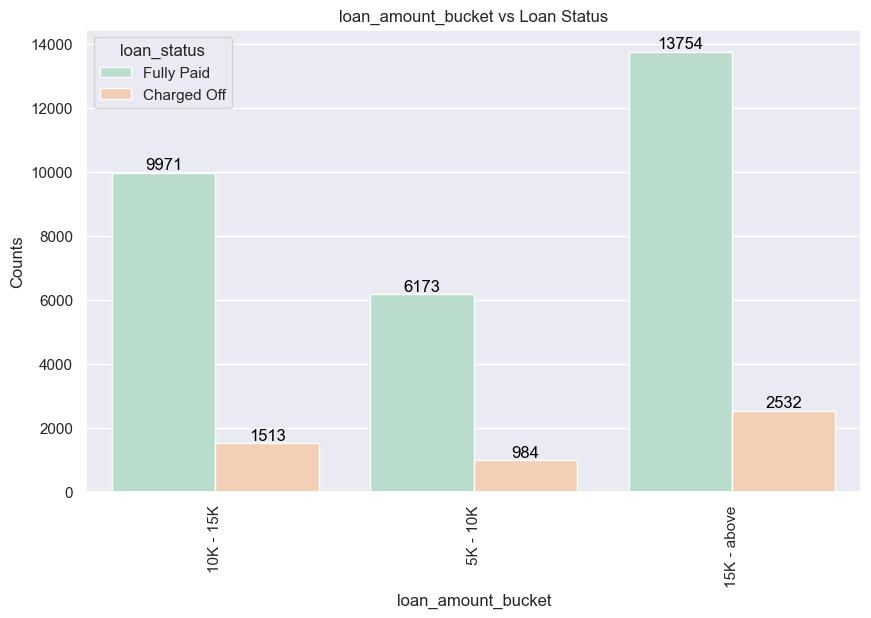

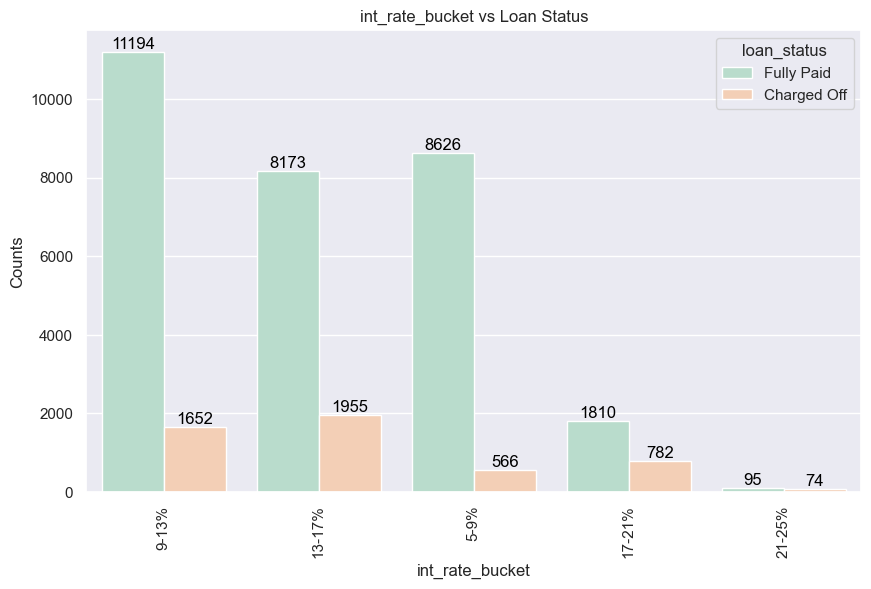

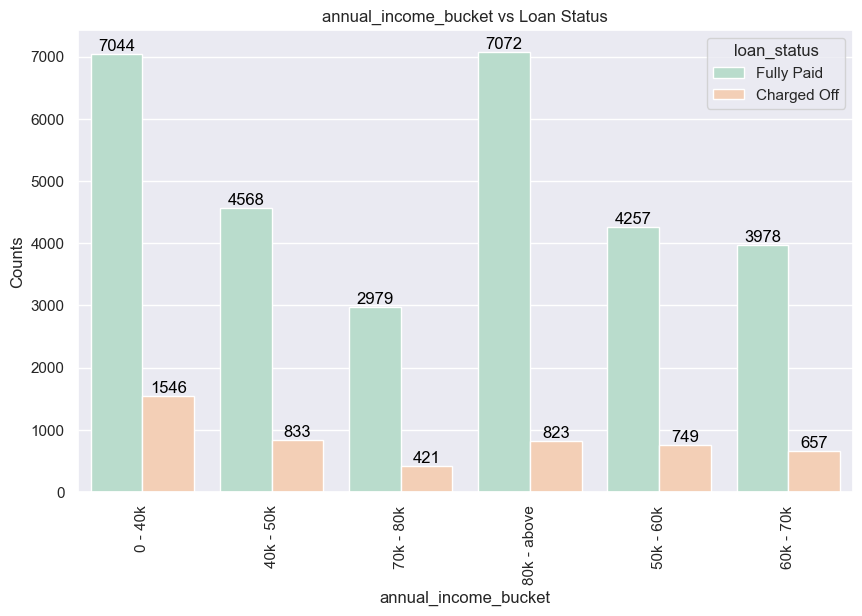

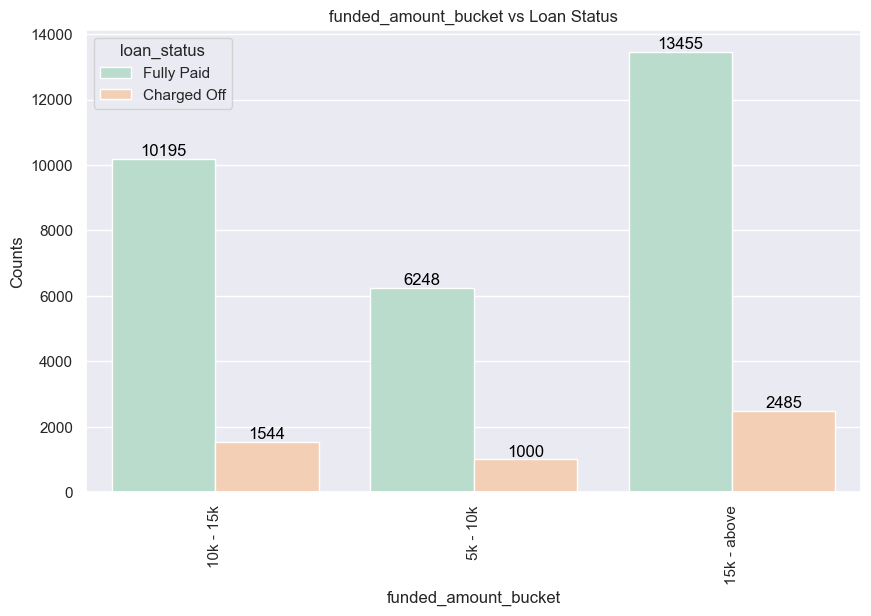

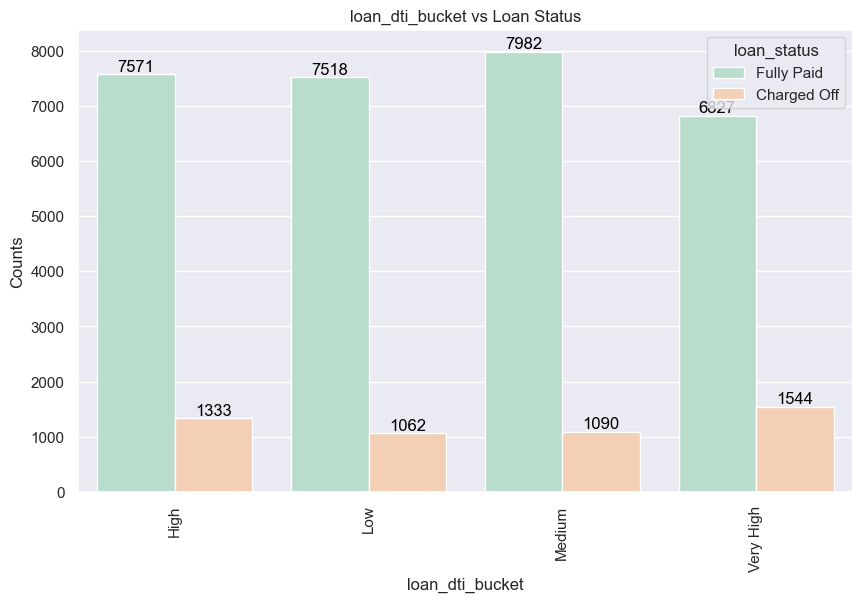

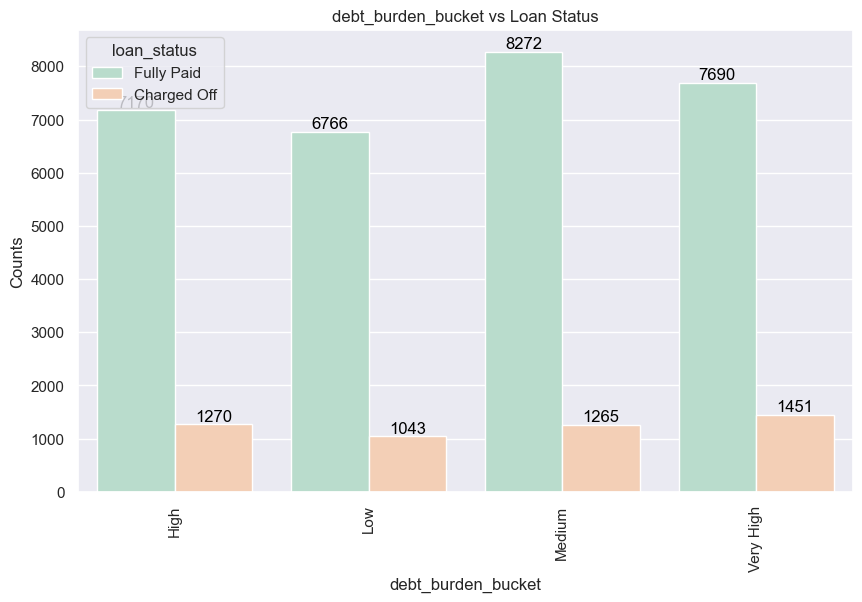

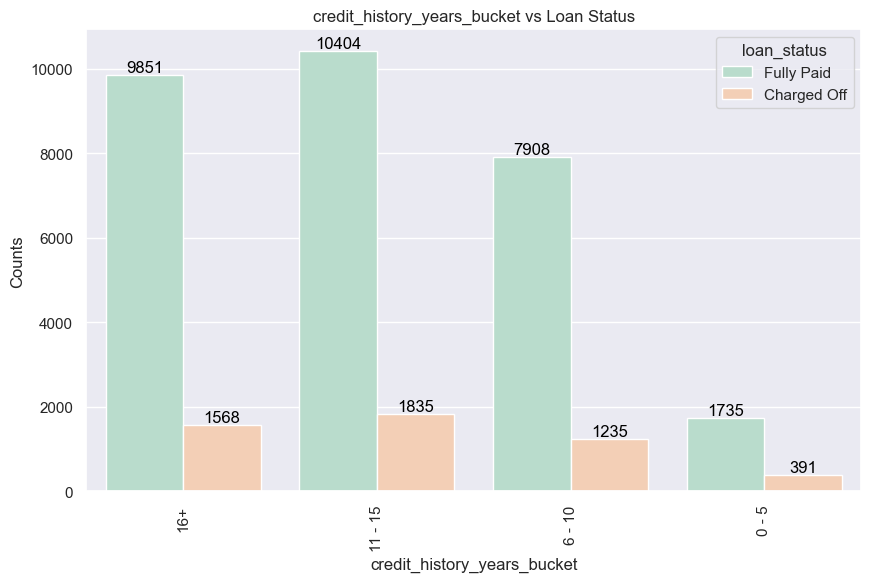

In [78]:
for col in ['total_account_bucket','loan_amount_bucket', 'int_rate_bucket', 'annual_income_bucket', 'funded_amount_bucket','loan_dti_bucket','debt_burden_bucket', 'revol_util_bucket','credit_history_years_bucket']:
    generate_countplot(
        loan_data, 
        col,
        x_axis_label = f'{col}', 
        palette_list = sns.color_palette('Pastel2'), 
        hue_column= 'loan_status',
        y_axis_label = 'Counts' ,
        plot_title=f'{col} vs Loan Status', 
        rotation=90
        )


#### Summary of segmented analysis


**1. `total_account_bucket` vs Loan Status**
- Borrowers in the **"20+" total accounts** category show the highest number of *charged-off loans* (3,353) compared to other buckets.
- The default rate in "20+" is significant despite the high count of fully paid loans (21,025).
- Borrowers with **fewer accounts (5-10, 10-15)** have considerably lower charged-off counts (443 and 625, respectively).
  
**Insight:** Borrowers with a high number of total accounts ("20+") pose a greater risk of default, potentially due to overextension of credit. Stronger credit limits or closer monitoring of borrowers with numerous accounts can help reduce risk.

**2. `loan_amount_bucket` vs Loan Status**
- Default rates increase as the loan amount increases:
  - **10K-15K:** 1,513 charged-off loans.
  - **5K-10K:** 984 charged-off loans.
  - **15K+ loans:** Higher loan amounts correlate with the highest *charged-off count* (2,532 loans).
  
**Insight:** Loans above 15K have high default risks. The company could mitigate risks with stricter eligibility criteria, additional collateral, or higher-interest rates for large loans.

**3. `int_rate_bucket` (Interest Rate Bucket) vs Loan Status**
- Charged-off loans increase with higher interest rates:
  - **5-9%**: 566 charged-off loans.
  - **13-17%**: 1,955 charged-off loans.
  - **17-21%:** Charged-off count remains significant (782).
- Borrowers paying **9-13% interest represent the highest count** of defaults (1,652 loans).

**Insight:** Borrowers in higher-interest-rate buckets default more frequently, likely due to increased repayment burdens. Lower-credit borrowers can be targeted with financial counseling or smaller, manageable loans.


**4. `annual_income_bucket` vs Loan Status**
- Borrowers with annual incomes between **0-40K show the highest defaults** (1,546 loans), significantly more than higher-income groups.
- Defaults decrease as income increases:
  - **40K-50K:** 833 charged-off loans.
  - **80K+ group:** 823 charged-off loans, showing a significant reduction.

**Insight:** Borrowers with lower income (0-40K) are most financially vulnerable. Offering smaller loan amounts and tailored repayment plans for this group can reduce defaults.


**5. `funded_amount_bucket` vs Loan Status**
- Loan amounts **15K+** have the highest *charged-off counts* (2,485 loans), affirming earlier insights from the `loan_amount_bucket`.
- Defaults decrease in smaller loan buckets:
  - **10K-15K:** 1,544 charged-off loans.
  - **5K-10K:** 1,000 charged-off loans.

**Insight:** Larger loan amounts continue to pose greater risk. Adjusting underwriting processes for borrowers applying for high loan sizes can reduce defaults.

**6. `loan_dti_bucket` (Debt-to-Income Bucket) vs Loan Status**
- Borrowers in the **"Very High" DTI bucket** (above 43%) exhibit the highest defaults:
  - **Very High:** 1,544 charged-off loans.
  - **High:** 1,333 charged-off loans.
  - **Low and Medium:** 1,062 and 1,090 charged-off loans respectively.

**Insight:** A strong correlation exists between higher DTI and default rates. A cautious lending approach for high-DTI borrowers is essential.


**7. `debt_burden_bucket` vs Loan Status**
- The **"Very High Debt Burden Bucket"** displays the highest charged-off count of 1,451 loans.
- Medium (1,265) and High (1,270) buckets show comparable counts, demonstrating elevated risk across these categories.
- Borrowers in the **low-debt-burden bucket** exhibit fewer defaults (1,043).

**Insight:** Borrowers with higher debt burdens are significantly riskier. Strengthening loan eligibility filters and monitoring debt-exceeded borrowers could help.

**8. `revol_util_bucket` (Revolving Utilization Bucket) vs Loan Status**
- Default risk increases with higher utilization:
  - **Very High:** 1,477 charged-off loans.
  - **High:** 1,489 defaults.
  - **Low utilization:** Only 854 defaults, the lowest of all buckets.

**Insight:** Higher credit utilization strongly correlates with default risk. Discourage borrowers with high utilization from further borrowing or enforce stricter repayment plans.

**9. `credit_history_years_bucket` vs Loan Status**
- Borrowers in the **"11-15 years bucket"** exhibit the **highest count of charged-off loans (1,835)**.
  - **16+ years bucket:** 1,568 charged-off.
  - Borrowers with **0-5 years credit history** show comparatively low defaults (391 loans).

**Insight:** Intermediate credit history lengths (11-15 years) show greater risk, likely due to accumulated debt over time. Borrowers with longer histories (16+ years) show slightly reduced defaults, indicating a stabilizing financial profile.

#### **Key Insights and Recommendations**

From these analyses, we observe patterns and derive actionable strategies:

1. **Loan Amounts and Interest Rates:**
   - **Large loan amounts (15K+)** and **higher interest rates (13%+)** strongly correlate with defaults. Loans with high borrowed amounts and rates should have strengthened eligibility criteria and stricter underwriting standards.

2. **Annual Income and DTI:**
   - Borrowers with lower incomes (0-40K) and **high DTI buckets (over 43%)** show elevated default risk. These populations could benefit from smaller loan offers, tighter repayment plans, or educational initiatives on financial management.

3. **Debt Burden and Credit Utilization:**
   - Borrowers in the **"High" or "Very High" debt burden and utilization buckets** frequently default. Risk assessment should prioritize these metrics to minimize excessive debt accumulation.

4. **Credit History:**
   - Intermediate credit histories (11-15 years) show heightened risk. Continuous and accumulated borrowing might explain these patterns. Offer tailored support to this group, including repayment flexibility.

5. **Portfolio Strategy:**
   - Encourage **low-DTI and low-utilization borrowers** for larger loan sizes, as they pose lower default risk.
   - Use geographical insights (total account activity buckets) for region-based risk strategies.

**Outcome for the Lending Company:**
By addressing the identified risk factors, the company can:
- Reduce loan defaults by targeting at-risk segments (e.g., high DTI, low income).
- Improve profitability by managing portfolios in favor of lower-risk borrowers while implementing policies for high-risk borrower segments. 

### Correlation Analysis  
Examine relationships between numerical variables:  
1.  `funded_amnt`
2.  `loan_amnt`
3.  `pub_rec_bankruptcies`
4.  `revol_bal`
5.  `revol_util`
6.  `debt_burden_score`
7.  `emp_length`
8.  `int_rate`
9.  `dti`
10. `annual_inc`
11. `term_months`
12. `installment`


Use a correlation heatmap to identify highly correlated features that might impact default rates.

In [79]:
# Correlation for numerical features 
suitable_numerical_cols = [ 'funded_amnt','loan_amnt', 'pub_rec_bankruptcies', 'revol_bal',   
                           'revol_util' , 'debt_burden_score','emp_length', 'int_rate', 'dti', 'annual_inc' ,'term_months', 'installment']  

correlation_data = loan_data.loc[:, suitable_numerical_cols].copy()   

#Now correlation_df contains only the selected columns, ready for analysis.

corr = correlation_data.corr()
sns.set(font_scale=1)

sns.clustermap(corr, annot=True, figsize=(10, 8), cmap="summer")

plt.show()


#### Insights on Correlation Heatmap

##### Strong Positive Correlations (Correlation coefficient > 0.7):

- **`installment`, `funded_amnt`, `loan_amnt`:** 
  These variables are highly correlated, indicating that larger loan amounts generally result in higher installments and funded amounts. This makes logical sense; larger loans typically require larger repayments.

- **`funded_amnt` and `loan_amnt`:**
  These two variables are almost perfectly correlated, suggesting that the amount funded is directly tied to the amount of the loan requested. 

- **`revol_bal` and `debt_burden_score`:** 
  A high revolving balance (like credit card debt) strongly correlates with a higher debt burden score, indicating individuals with substantial revolving debt are likely to face difficulties in repayment.

##### Moderate Positive Correlations (Correlation coefficient 0.3 - 0.7):

- **`annual_inc` and `loan_amnt`, `annual_inc` and `funded_amnt`, `annual_inc` and `installment`:**
  Higher annual incomes generally correlate with larger loan amounts and installments. While this correlation is expected, it is not very strong, implying that income may not be the sole indicator of default risk.

- **`dti` and `debt_burden_score`:**
  The Debt-to-Income (DTI) ratio and the debt burden score are moderately correlated. A higher DTI indicates a greater debt burden, which may raise the risk of default.

- **`revol_util` and `int_rate`:** 
  Higher revolving credit utilization correlates with higher interest rates, which can lead to greater payments and an increased risk of default.

- **`term_months` and `int_rate`:**
  The number of months in the loan term shows a positive correlation with the interest rate, indicating longer terms potentially carry higher rates.

##### Weak Positive Correlations (Correlation coefficient < 0.3):

- **`dti`:** 
  Shows weak correlation with most fields, indicating it's a less reliable predictor on its own.

- **`emp_length`:** 
  Similarly weak correlation with most fields, suggesting job length may not significantly influence outcomes.

- **`annual_inc` and `dti`:**
  There’s a weak to moderate negative correlation here. Generally, higher incomes are associated with lower DTIs, but the relationship isn't very strong and should be interpreted cautiously.

##### Weak or Moderate Negative Correlations:

- **`annual_inc` and `pub_rec_bankruptcies`:**
  There is a slightly negative relationship, suggesting individuals with higher incomes might have a lower incidence of bankruptcy.

- **`pub_rec_bankruptcies`:** 
  Displays negative correlations with several other variables, which is expected since a history of bankruptcies indicates a higher default risk.

- **`emp_length`:** 
  Shows a negative correlation with both `int_rate` and `revol_util`, indicating that longer employment may be associated with lower interest rates and revolving utilization.

##### Conclusion

The correlation analysis provides valuable insights for lenders looking to assess potential loan defaults based on borrower characteristics and financial behavior. Strong positive correlations highlight key areas to monitor, such as the relationships between installments, loan amounts, and funded amounts. Negative correlations can signal potential risks, such as a history of bankruptcies or high DTI ratios.

By focusing on these correlations, lenders can refine their lending criteria. This approach can lead to more informed credit decisions and potentially reduce default rates by identifying financial behaviors that pose risks. The heatmap visualization emphasizes these relationships and assists in further analysis and decision-making processes.


### Multivariate Analysis  

Explore interactions between multiple variables against charged off percentage and loan status mentionedd in the next step:  

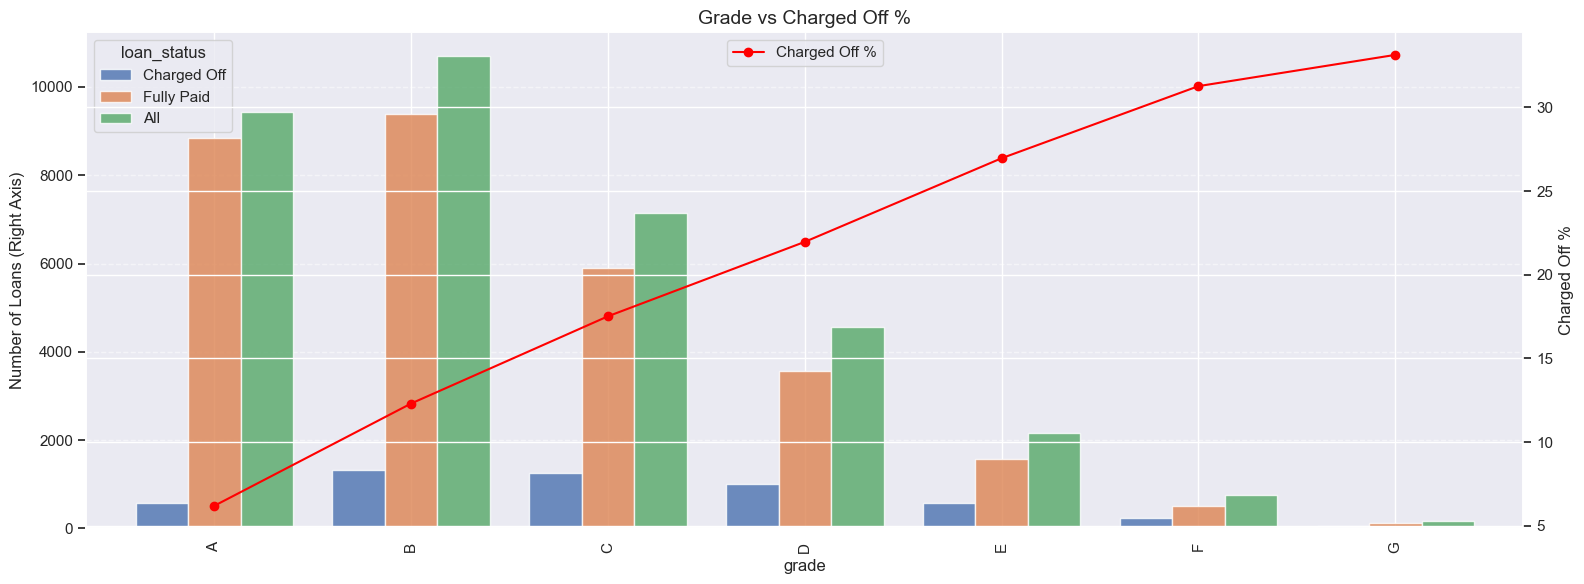

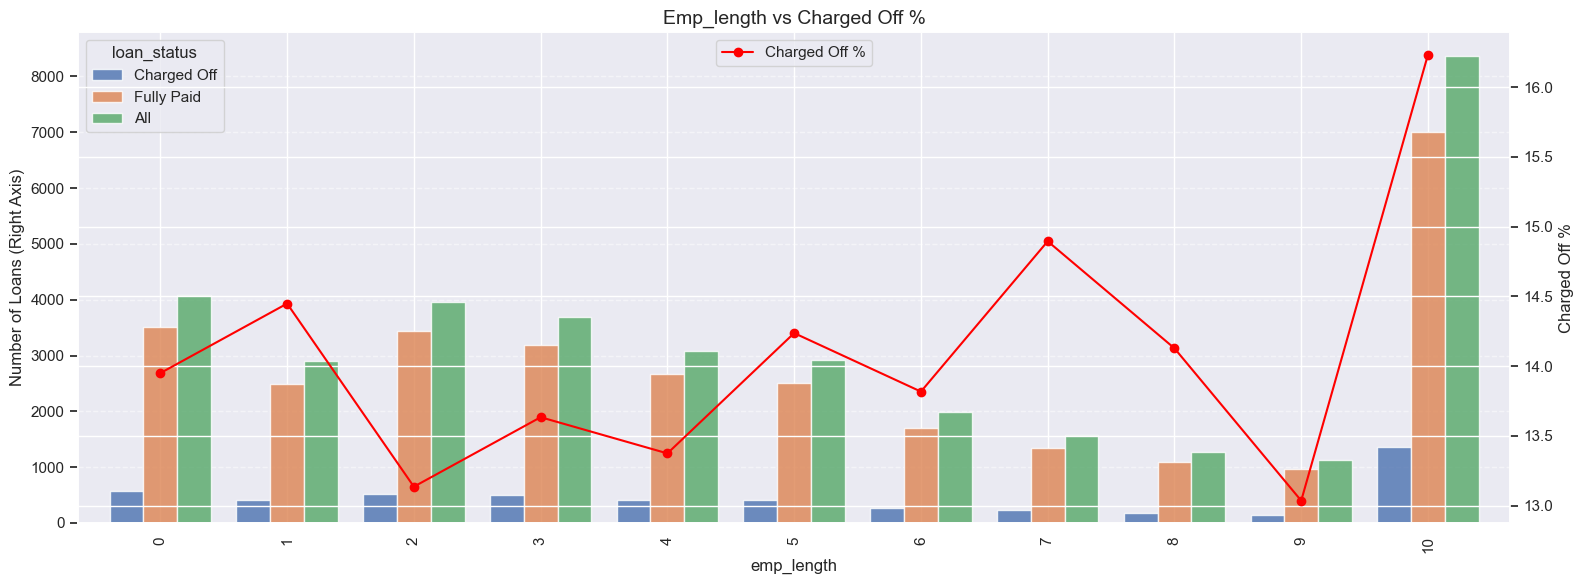

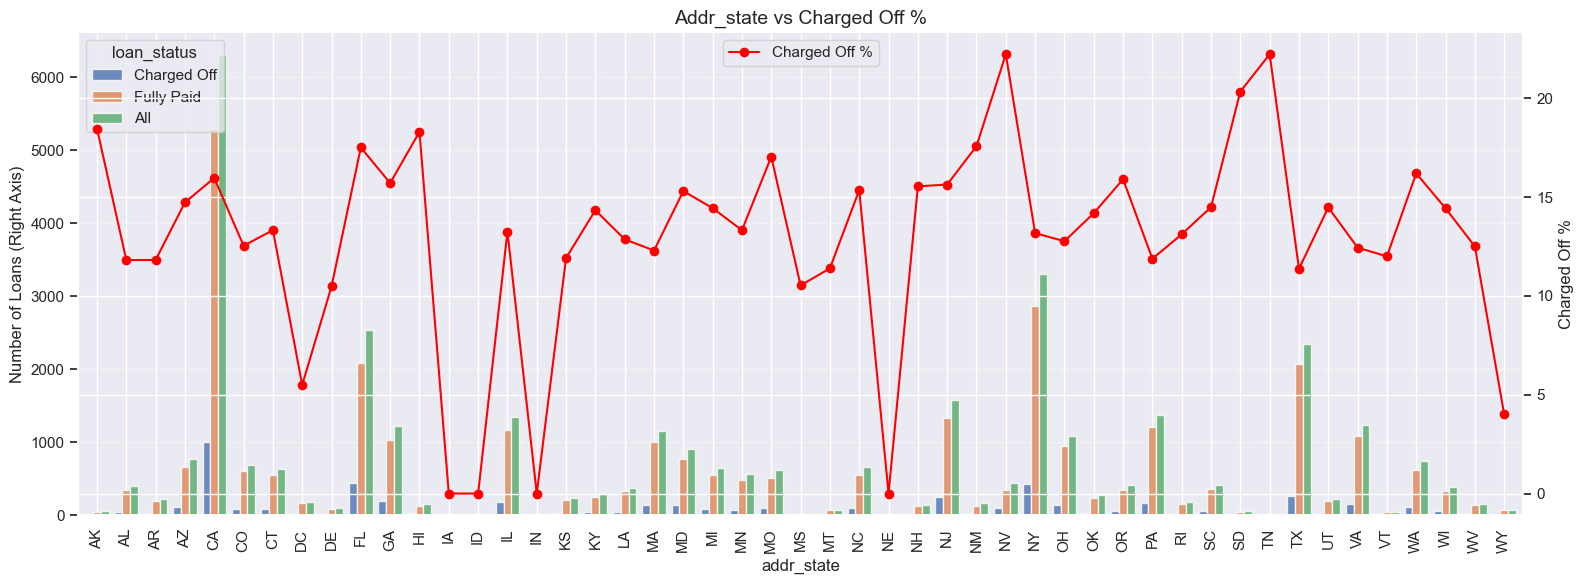

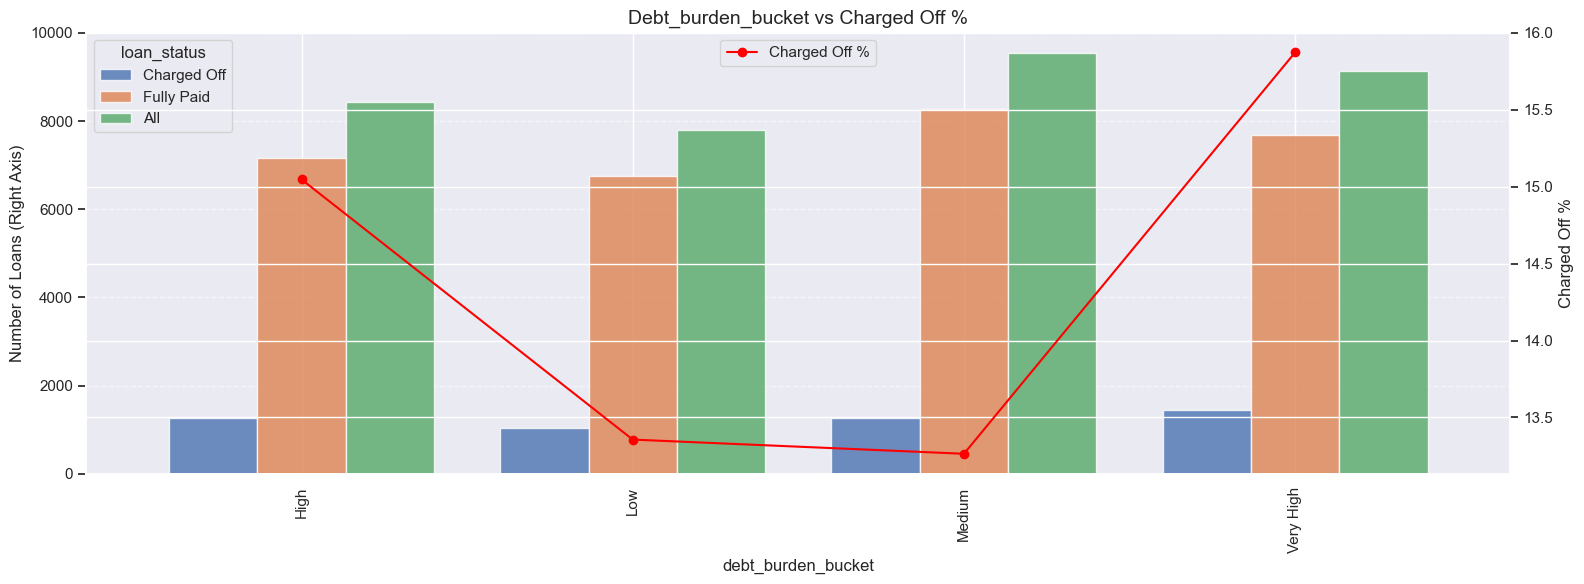

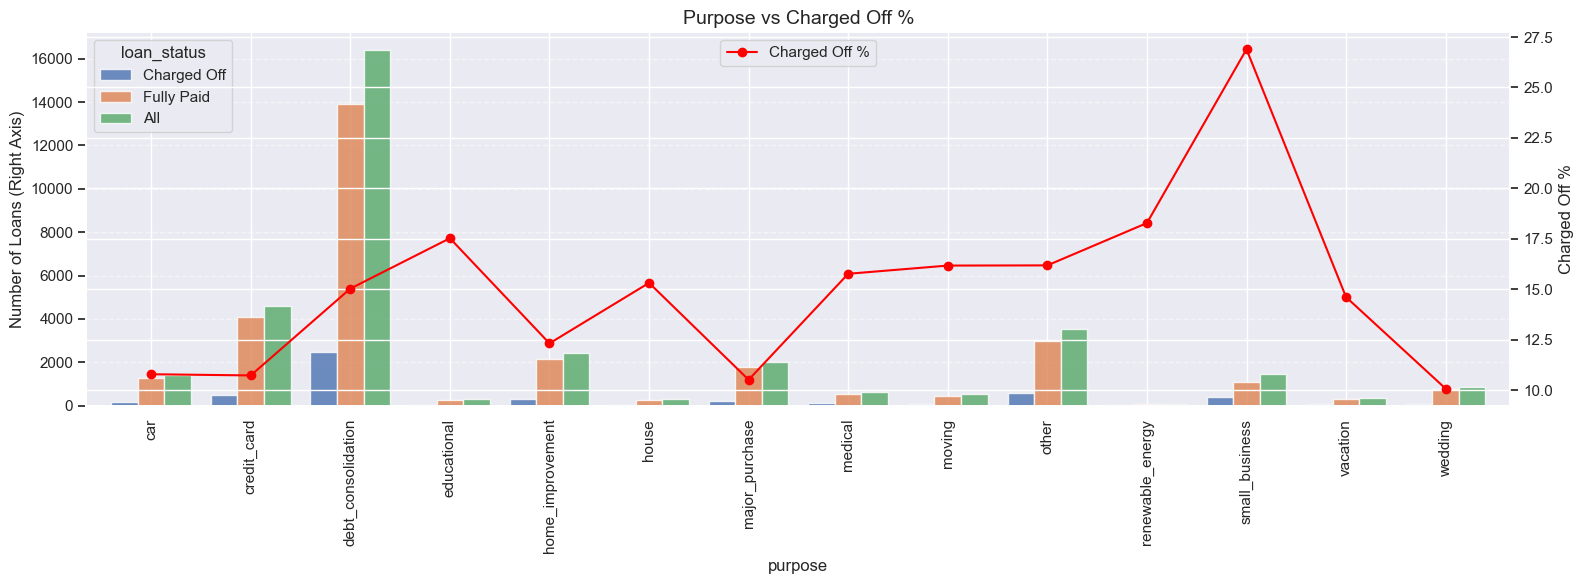

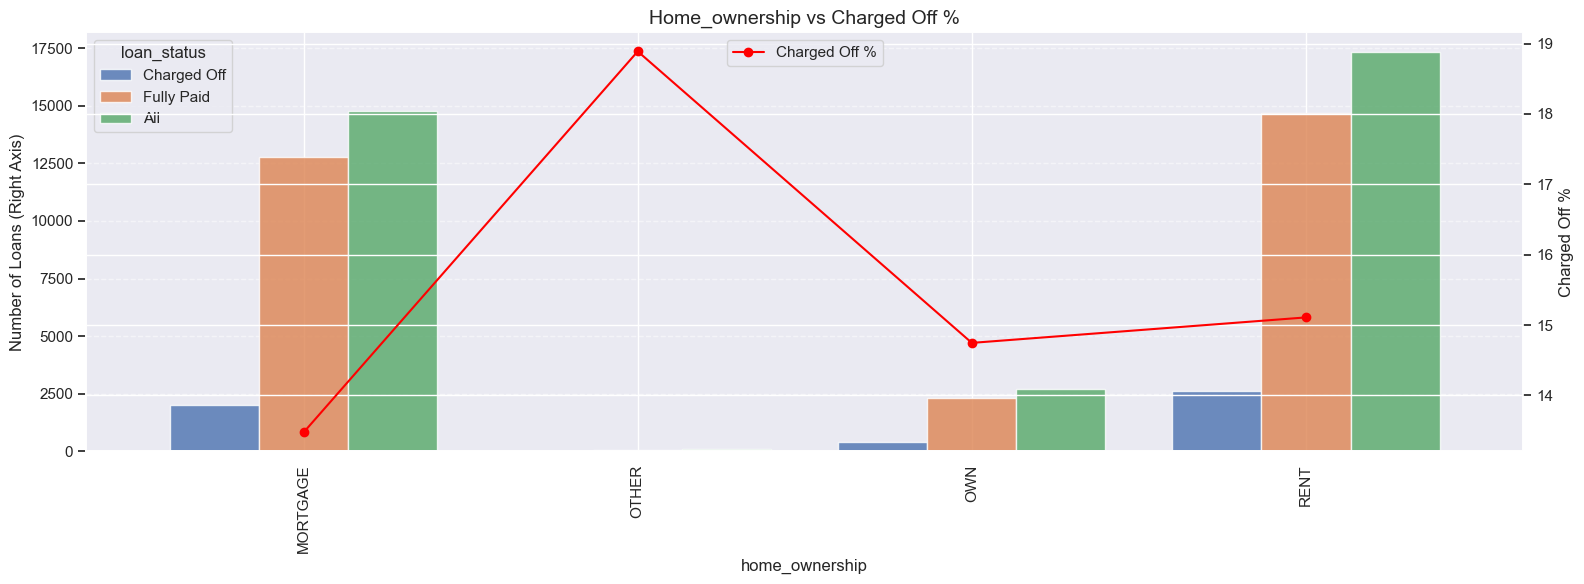

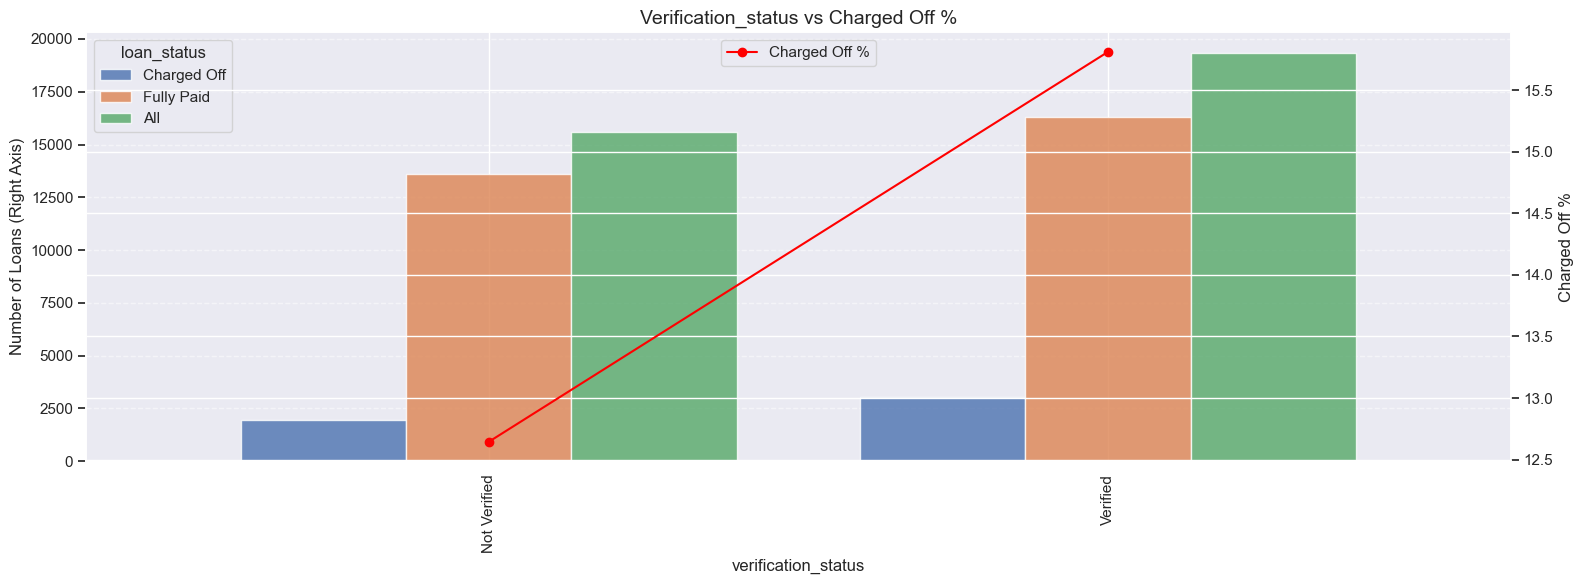

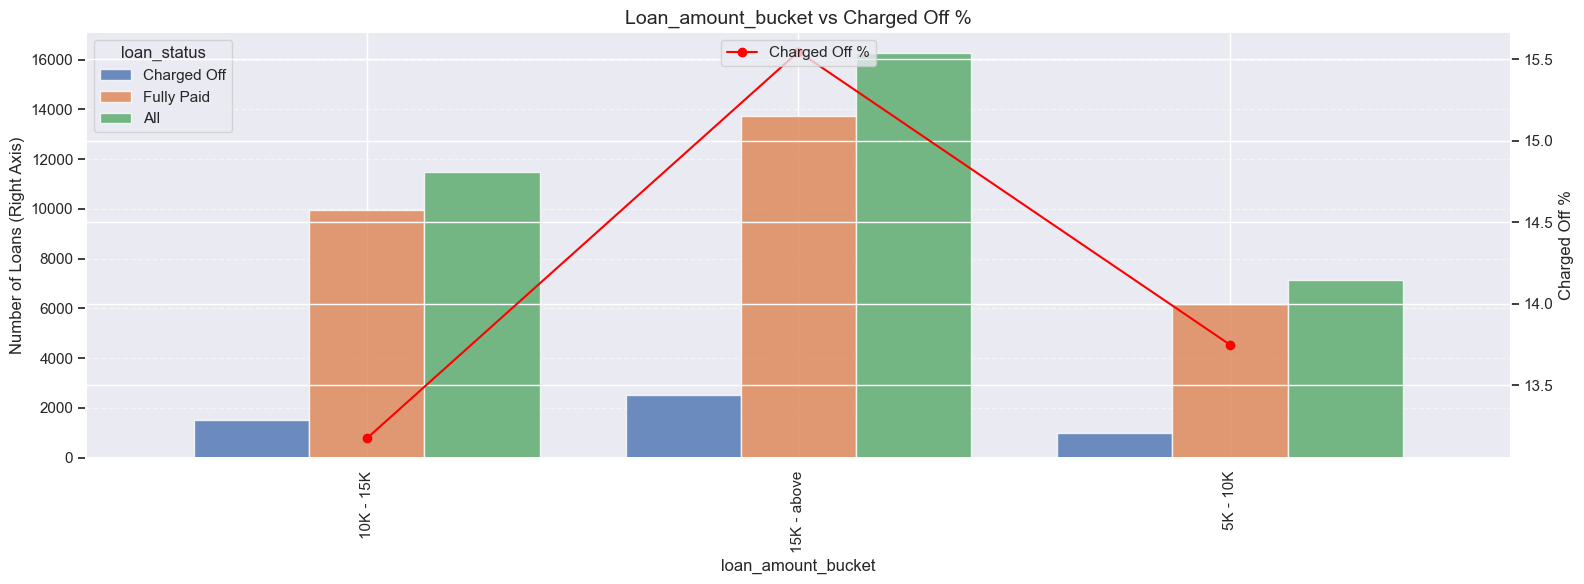

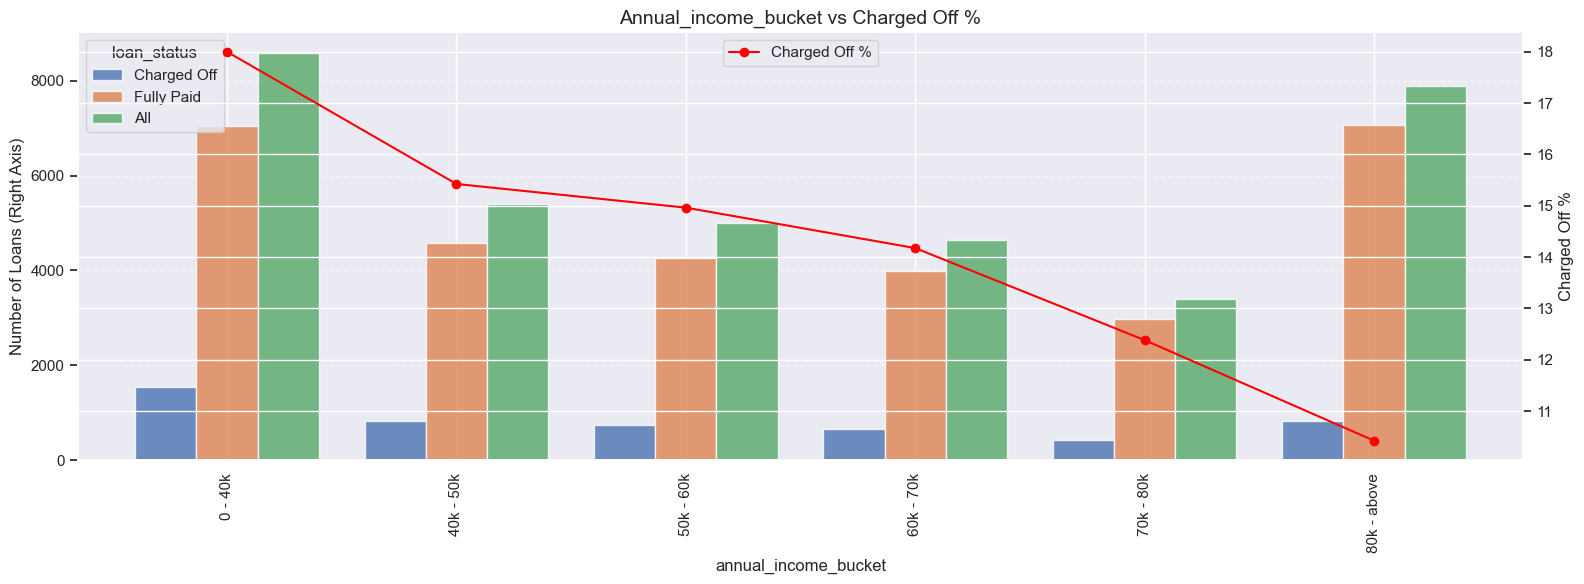

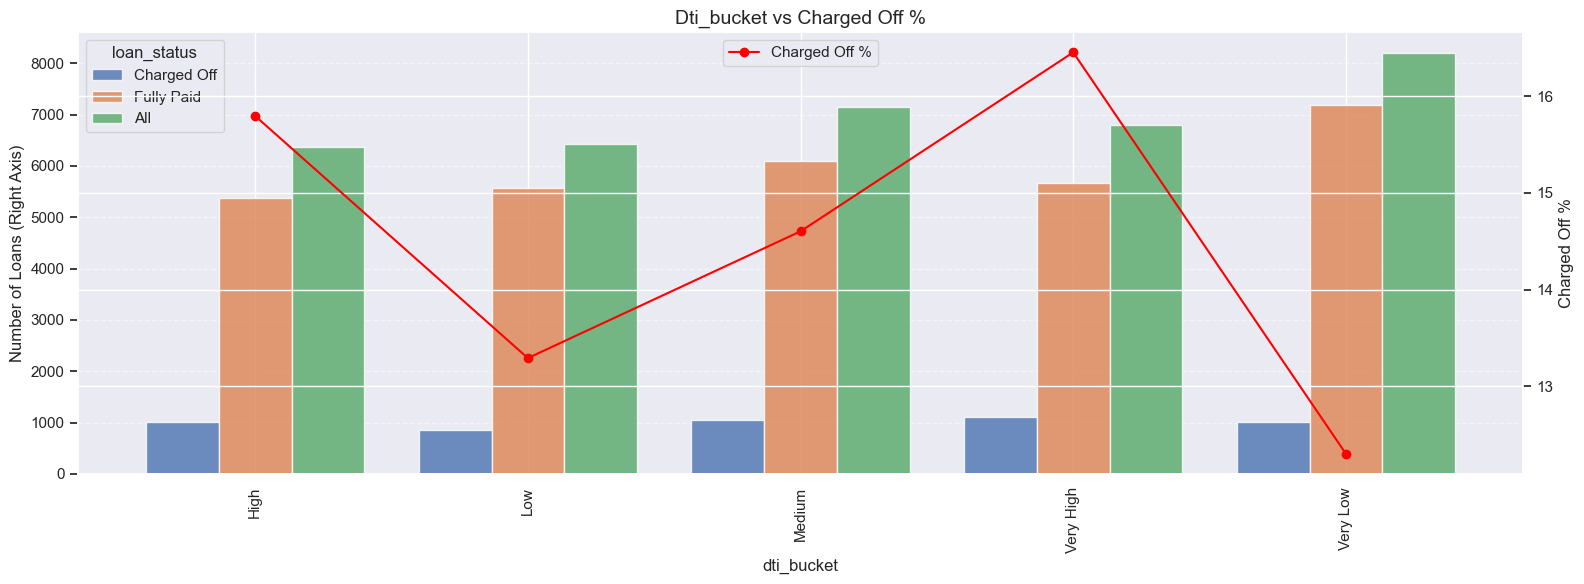

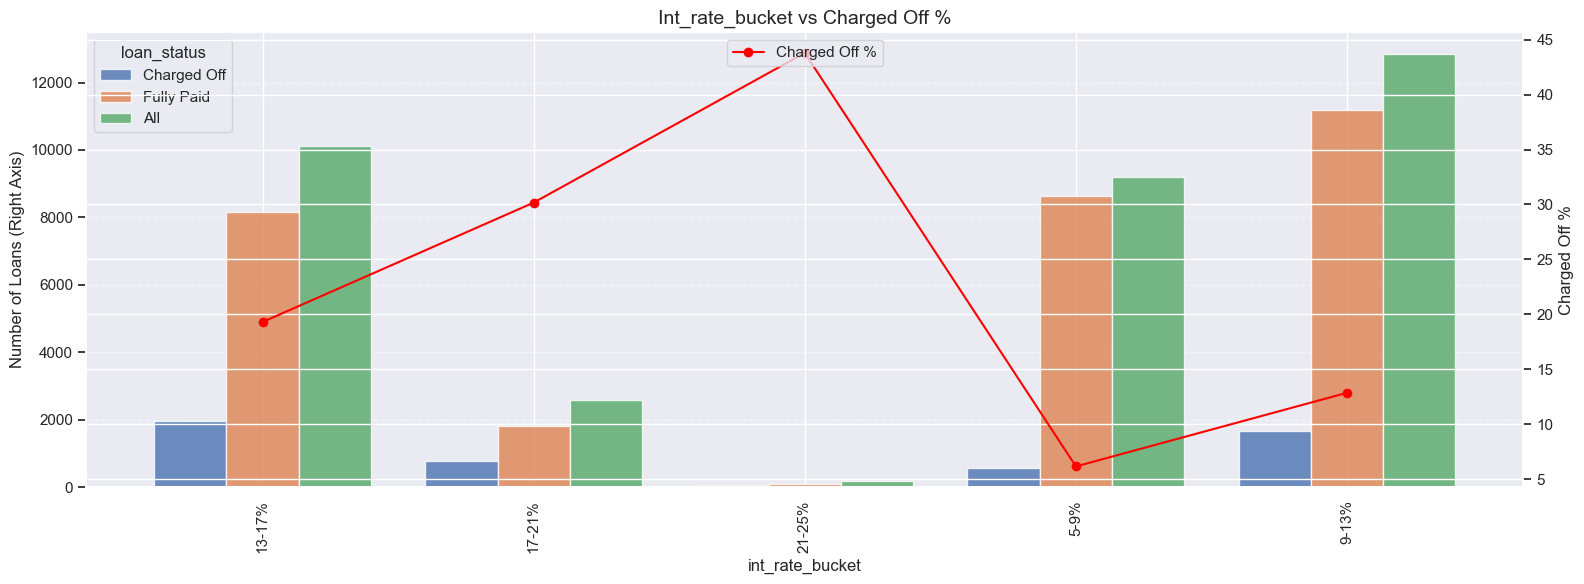

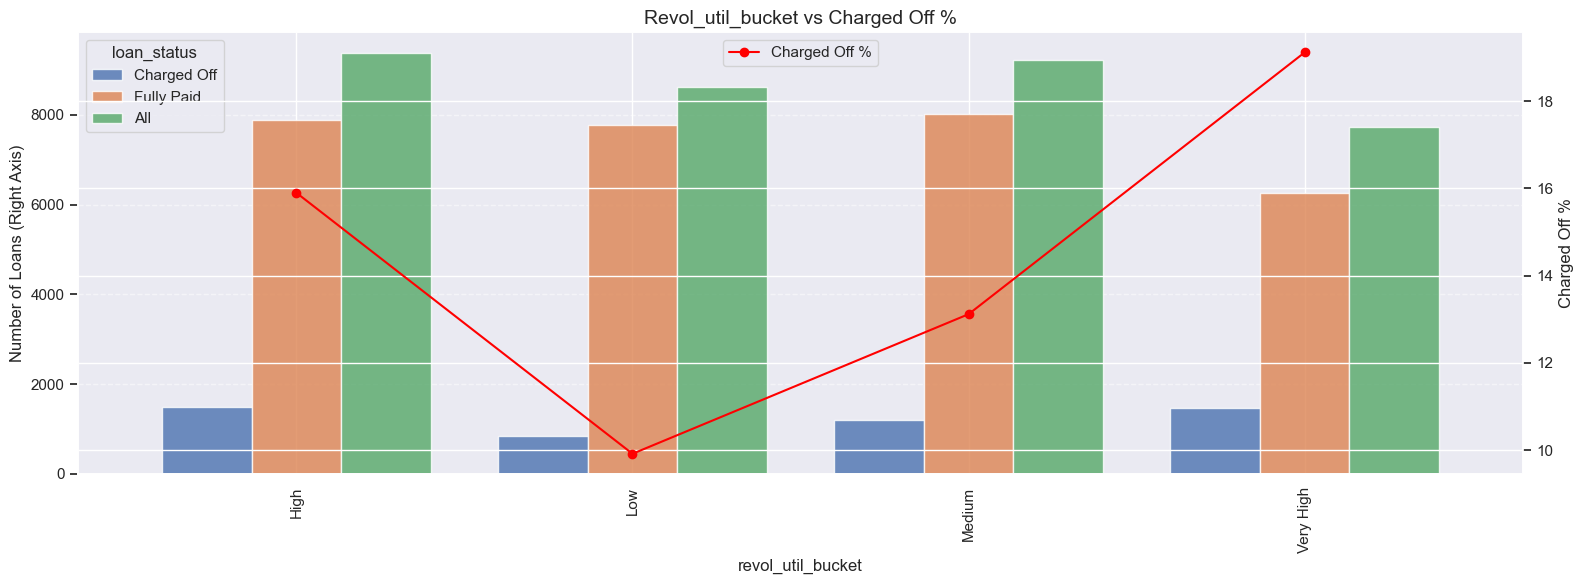

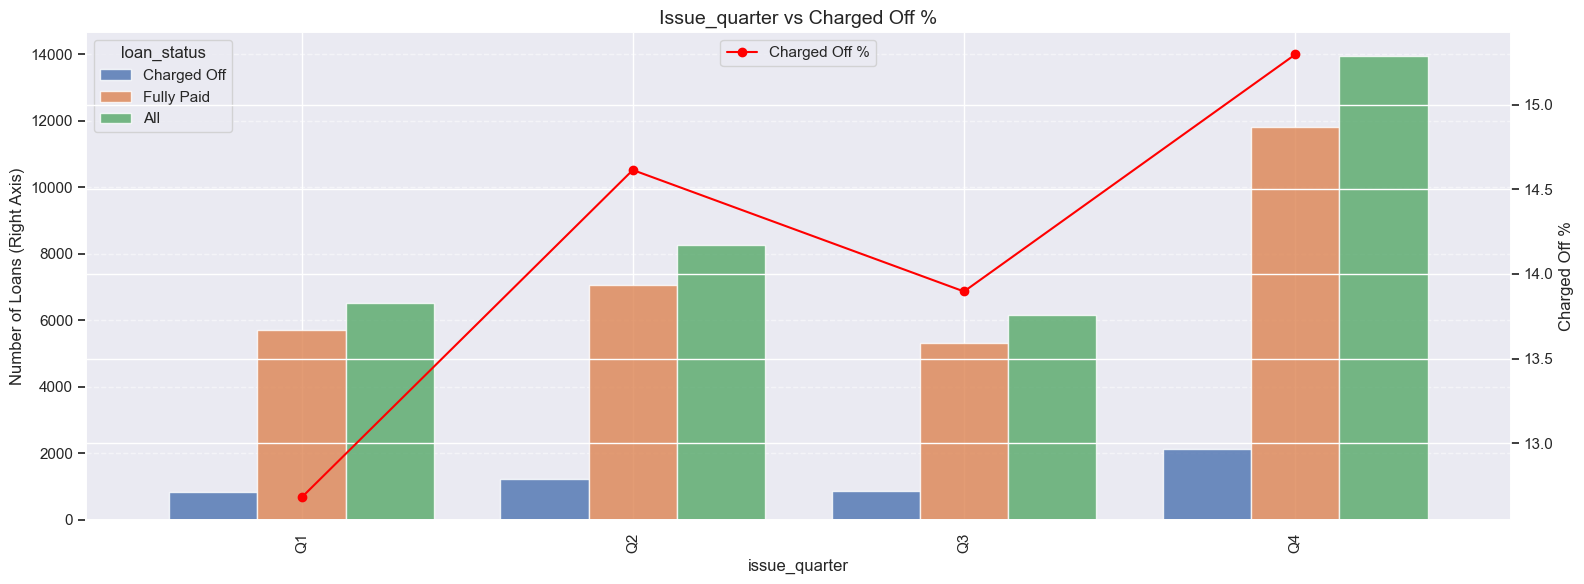

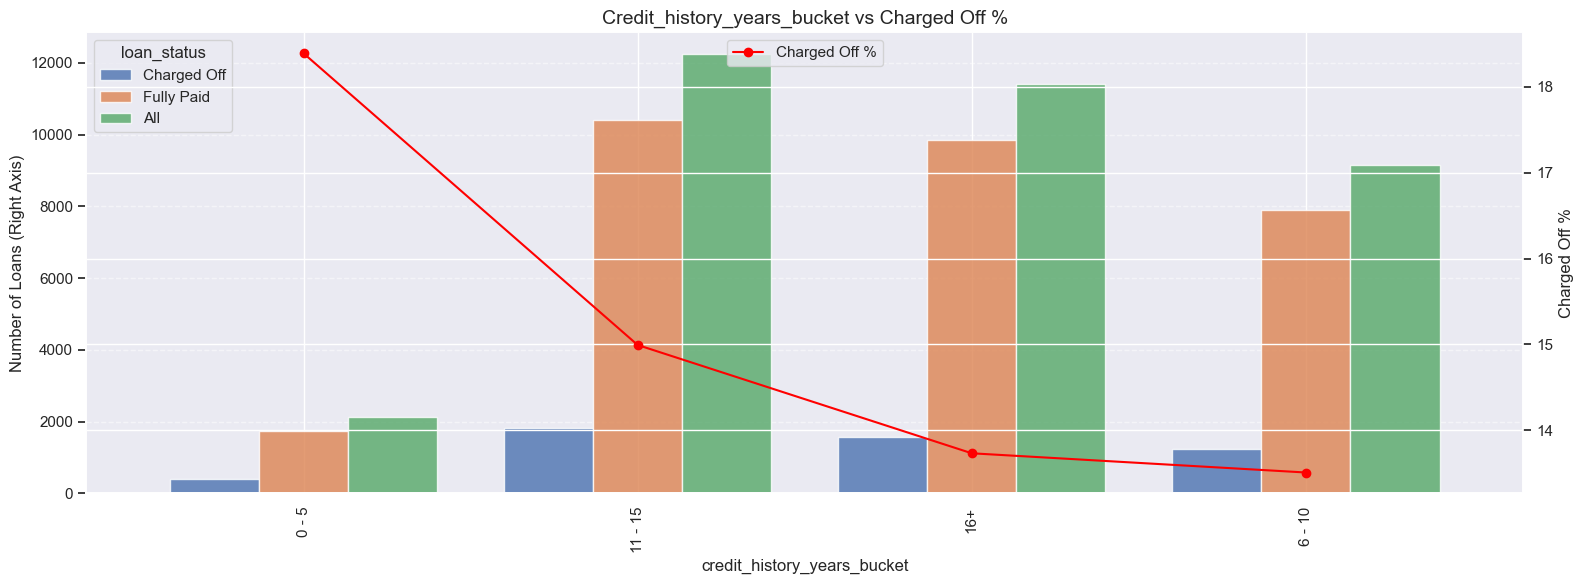

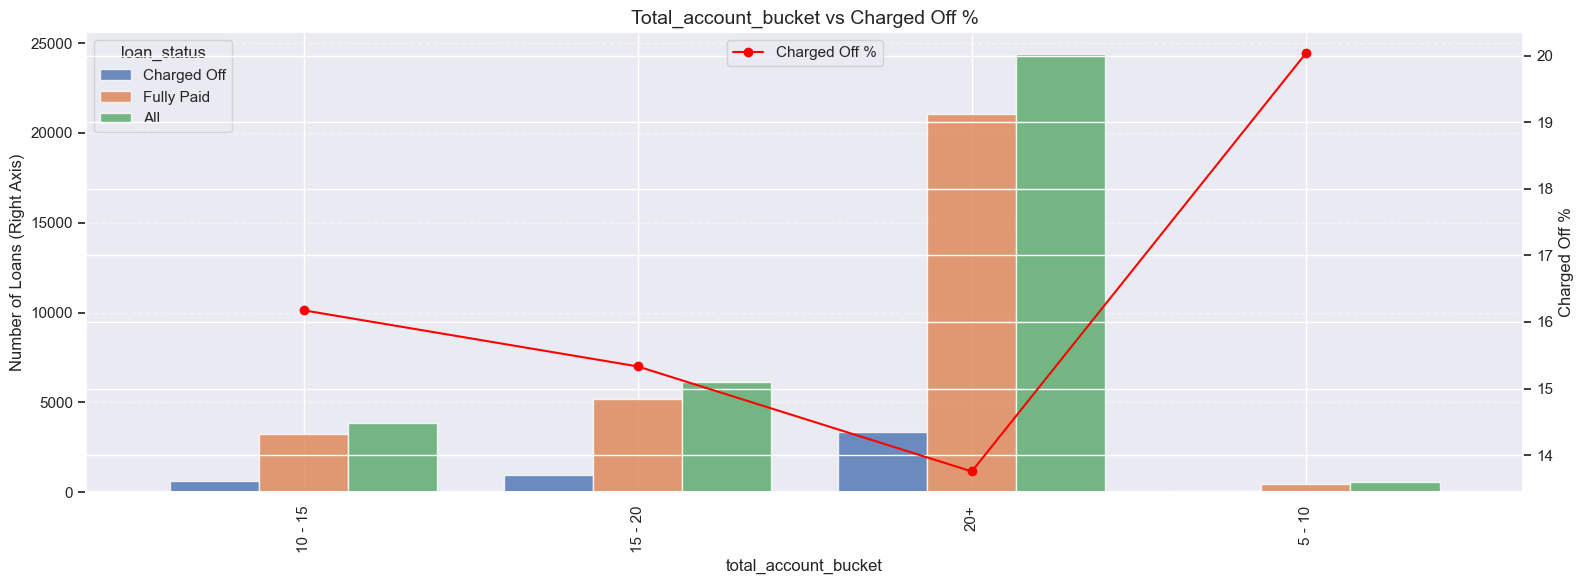

In [80]:
multivariate_columns = (  
    'grade',  
    'emp_length',  
    'addr_state',  
    'debt_burden_bucket',    
    'purpose',  
    'home_ownership',  
    'verification_status',  
    'loan_amount_bucket',  
    'annual_income_bucket',  
    'dti_bucket',  
    'int_rate_bucket',  
    'revol_util_bucket',  
    'issue_quarter',  
    'credit_history_years_bucket',
    'total_account_bucket'
)  


for column in multivariate_columns:
    
# Example usage
# Assuming loan_data is your main DataFrame
    plot_multicariate_chart(
        data=loan_data,
        x_column= column,      # Replace with your categorical variable
        hue_column='loan_status',  # Replace with your grouping column (e.g., loan_status)
        figsize=(16, 6)
    )



#### Summary of multivariate analysis

1. **Higher Default Risk for Lower Credit Grades:** Borrowers with credit grades B, C, and D exhibit a higher propensity for loan defaults than those with higher grades (A).  Lower credit grades typically reflect a history of less reliable financial management, increasing the risk of default.

2. **Unexpected Default Trend for Long-Term Employees:**  Surprisingly, employees with 10 years of employment experience show the maximum tendency toward default. This contradicts the typical assumption that longer employment history implies greater financial stability. Further investigation is needed to understand the underlying factors.  Perhaps these individuals took on more debt due to perceived financial security, or other unforeseen circumstances impacted their ability to repay.

3. **Geographic Concentration of Defaults:**  California (CA), Florida (FL), and New York (NY) show higher default rates compared to other states. This could be due to various factors such as regional economic conditions, cost of living, or differences in lending practices within these states.

4. **High Debt Burden Increases Default Risk:** The "Very High" debt_burden_bucket has the highest charged-off count. This is expected, as borrowers with high debt burdens are already financially strained and more vulnerable to unforeseen financial challenges, significantly increasing their likelihood of default.

5. **High Debt-to-Income Ratio Increases Default Risk:** The "Very High" `loan_dti_bucket` shows the highest default rate, decreasing as the ratio lowers.  This is consistent with the expected relationship—a high debt-to-income ratio indicates that a substantial portion of a borrower's income is committed to debt repayment, leaving little room for unexpected expenses or financial setbacks, thus increasing the risk of default.

6. **Debt Consolidation Loans Have High Default Rates:** Debt consolidation loans have the highest charged-off count. This could be because borrowers consolidating existing debts may already be struggling financially, leading to increased vulnerability to default on the new loan.

7. **Renters Show Higher Default Rates:** Borrowers living in rented houses exhibit a higher tendency to default.  This may be because renters generally have less stable housing situations and might face higher financial volatility compared to homeowners, making them more susceptible to default.

8. **Verification Status Not a Strong Default Predictor:** While verified accounts have a higher charged-off count than non-verified ones, this difference isn't necessarily conclusive.  Verification alone is not a sufficient indicator of default risk; it's crucial to consider other factors.  A stricter policy should target risk factors beyond verification status, including credit scores, debt burden, and income.

9. **Large Loan Amounts Increase Default Risk:** The `loan_amount` bucket with 15K+ has the most charged-off counts. Larger loan amounts generally entail higher repayment obligations, thus placing greater financial strain on borrowers and increasing the chance of default.

10. **Low Income Increases Default Risk:** The annual income bucket 0-40K has the most charged-off counts, indicating a higher likelihood of default for borrowers with lower incomes.  Lower income often limits financial flexibility and makes it more challenging to manage unforeseen financial events, which can trigger defaults.

11. **High Interest Rates Increase Default Risk:**  The 13-17% `int_rate` range has the highest number of charged-off counts.  Higher interest rates result in larger monthly payments and increased overall loan cost, making it harder for borrowers to repay, particularly those with lower incomes or high debt levels.

12. **High Credit Utilization Increases Default Risk:** High `revol_util` values show the highest number of charged-off counts, indicating that borrowers utilizing a significant portion of their available credit are at higher risk of default.  High credit utilization suggests a potential lack of financial control and increased vulnerability to unexpected financial stress.

13. **Seasonal Effect on Defaults:** Q4 (fourth quarter) shows the highest charged-off count, possibly due to increased holiday spending placing financial pressure on borrowers and increasing the likelihood of default.

14. **Intermediate Credit History and Default:**  Surprisingly, the 11-15 years credit history group shows the highest default rate. Further analysis is needed to understand this trend.  It could be that these borrowers might have experienced financial difficulties during their intermediate years that impacted their ability to repay.

**Charged-Off Percentage Information:**

1.  **Grade:** Charged-off percentages increase as credit grades decrease (from A to G).  Grade G has the highest charged-off percentage, although the data sample size is small.  This shows a clear linear relationship: lower grades indicate higher risk.

2.  **Employment Length:** The relationship between employment length and charged-off percentage is non-linear and inconclusive.  It increases and decreases until 7 years, then drops at 9 years before spiking at 10 years. This pattern doesn't offer clear insights into loan default prediction.

3.  **Address State:** Charged-off percentages vary significantly across states, indicating geographical differences in default risk.  Further investigation is needed to pinpoint the reasons for these variations (e.g., economic conditions, lending practices).

4.  **Debt Burden Bucket:** The "Very High" debt burden bucket has the highest charged-off percentage, followed by "High," "Low," and "Medium."  The difference between "Low" and "Medium" is minimal.  This reinforces the expected correlation between high debt and default risk.

5.  **Loan Purpose:**  "Debt consolidation" and "other" purposes show high charged-off percentages, with "small business" having the highest. "Car," "credit card," "major purchase," "home improvement," and "wedding" purposes have lower charged-off percentages. This highlights the financial strain associated with specific loan purposes.

6.  **Home Ownership:**  "Other" home ownership status has the highest charged-off percentage, followed by "Rent," "Own," and "Mortgage" (lowest). This suggests that borrowers with less stable housing situations are more prone to default.

7.  **Verification Status:** Verified accounts have a higher charged-off percentage than non-verified accounts. While this suggests that verification is not a foolproof indicator of creditworthiness, it might be a factor to consider in addition to other parameters.  A tighter policy might involve stricter criteria beyond simple verification.

8.  **Loan Amount Bucket:** The 15K+ loan amount bucket has the highest charged-off percentage.  Higher loan amounts increase financial burden and consequently, default risk.

9. **Annual Income Bucket:** The 0-40K annual income bucket has the highest charged-off percentage, with percentages decreasing as annual income increases. Lower income correlates with increased financial vulnerability and higher default risk.

10. **Debt-to-Income (DTI) Bucket:**  The charged-off percentage exhibits a clear linear relationship with DTI, decreasing from "Very High" to "Low."  This is consistent with the concept that higher debt burdens increase the chances of loan defaults.

11. **Interest Rate Bucket:** Higher interest rate buckets show higher charged-off percentages. Higher interest rates increase monthly payments and the overall cost of borrowing, placing increased financial pressure on borrowers.

12. **Revolving Utilization Bucket:**  Revolving utilization ("`revol_util`") shows a linear relationship with charged-off percentages. The "Very High" bucket has the highest percentage, again demonstrating a pattern of higher credit usage corresponding to increased default risk.

13. **Issue Quarter:** Q4 has the highest charged-off percentage, possibly due to increased holiday spending and associated financial strain.  Q1 has the lowest. Seasonal factors might affect borrowers' ability to make payments, influencing default rates.

14. **Credit History Years Bucket:** The 0-5 years credit history bucket has the highest charged-off percentage, decreasing as credit history lengthens. Shorter credit histories often indicate less established financial behavior and therefore, higher risk.


**Summary and Insights:**

The analysis highlights several key factors influencing loan defaults.  Lower credit grades, higher debt burdens (both overall and relative to income), larger loan amounts, lower annual incomes, higher interest rates, higher credit utilization, and specific loan purposes (debt consolidation and small business loans) all show strong correlations with higher charged-off percentages.  Certain geographical locations and shorter credit histories also demonstrate higher risk.  This information helps to build a predictive model for loan defaults and can be used to:

*   **Refine underwriting criteria:** Focus on applicants with better credit grades, lower DTI ratios, lower debt burdens, and manageable loan amounts relative to income.
*   **Develop targeted strategies:** Offer financial literacy programs to borrowers in high-risk categories (e.g., low income, high DTI).
*   **Adjust pricing and loan terms:**  Consider higher interest rates for higher-risk loan profiles.
*   **Improve risk assessment:** Combine multiple factors into a comprehensive risk score.


This analysis emphasizes the importance of using a holistic approach that considers multiple factors when evaluating loan applications, reducing default risk and improving lending outcomes.  This understanding allows you to set more informed lending strategies.
 
